In [1]:
import pandas as pd
import numpy as np
import os
from zipfile import ZipFile
import joblib
import matplotlib.pyplot as plt
import statsmodels as ss
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [ ]:
#import zipfiles that contain multiple files
# def import_zipfiles_to_df(path):
#     """
#     import multiple zipfiles and combine into one dataframe
#     path = where the file located
#     """
#     path = path
#     zip_file = ZipFile(path)
#     files = zip_file.infolist()
#     files.pop(0) #remove first item (folder name)

#     #create first dataframe to append later
#     file1 = files.pop(0)
#     df= pd.read_csv(zip_file.open(file1.filename),dtype = 'object') 

#     #add block column = file name
#     name = file1.filename.split('/')[1]
#     name = name.split('.')[0]
#     df['block'] = name

#     for file in files:
# #         print(file.filename)
#         df_1= pd.read_csv(zip_file.open(file.filename), dtype = 'object')
#         name = file.filename.split('/')[1]
#         name = name.split('.')[0]
#         df_1['block'] = name
#         df = pd.concat([df, df_1])
#     return df

In [ ]:
# import data
# folder_path = '/Users/vsu/Metis/04_Metis_Projects/05_Project05/Data/smart-meters-in-london'

# for file in os.listdir(folder_path):
#     if str(file).endswith(('csv', 'zip')):
        
#         file_name = str(file).split('.')[0] + '_df'
#         path = folder_path + '/' + file
        
#         if str(file).split('.')[-1]!='csv': #.zip and .gz files
#             locals()[file_name] = import_zipfiles_to_df(path)

#         else: #.csv files
#             locals()[file_name]= pd.read_csv(path, dtype= 'object' )

In [9]:
#pcike function
def pickleFile(filetopickle, file_path):
        
    joblib.dump(filetopickle, file_path)
 
    return print('File is picked at below path: \n', file_path)

In [2]:
#load pickle file
def loadpickle(file_path):
    
    return joblib.load(file_path)  

In [ ]:
%whos

In [ ]:
# #pickle add dataframes
# pickleFile(acorn_details_df, './Pickle/acorn_details.pickle')
# pickleFile(daily_dataset_df, './Pickle/daily_dataset.pickle')
# pickleFile(halfhourly_dataset_df, './Pickle/halfhourly_dataset.pickle')
# pickleFile(hhblock_dataset_df, './Pickle/hhblock_dataset.pickle')
# pickleFile(informations_households_df, './Pickle/informations_households.pickle')
# pickleFile(uk_bank_holidays_df, './Pickle/uk_bank_holidays.pickle')
# pickleFile(weather_daily_darksky_df, './Pickle/weather_daily_darksky.pickle')
# pickleFile(weather_hourly_darksky_df, './Pickle/weather_hourly_darksky.pickle')

In [3]:
#load pick files
# acorn_details_df = loadpickle('./Pickle/acorn_details.pickle')
# daily_dataset_df = loadpickle('./Pickle/daily_dataset.pickle')
# halfhourly_dataset_df = loadpickle('./Pickle/halfhourly_dataset.pickle')
# hhblock_dataset_df = loadpickle('./Pickle/hhblock_dataset.pickle')
# informations_households_df = loadpickle('./Pickle/informations_households.pickle')
# uk_bank_holidays_df = loadpickle('./Pickle/uk_bank_holidays.pickle')
# weather_daily_darksky_df = loadpickle('./Pickle/weather_daily_darksky.pickle')
# weather_hourly_darksky_df = loadpickle('./Pickle/weather_hourly_darksky.pickle')
# weather_daily = loadpickle('./Pickle/weather.pickle')
energy_weather = loadpickle('./Pickle/energy_weather.pickle')

In [ ]:
# convert datatype function
# convert datatype (from object to float)
def ConvertDtype(df, dtype):
    return df.iloc[:,:1].join(df.iloc[:,1:].astype(dtype))


# Intializing Datasets - Breakdown to 3 groups
__Affluent, Comfortable and Adversity__

In [12]:
energy_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506318 entries, 0 to 3506317
Data columns (total 18 columns):
LCLid             object
day               datetime64[ns]
Acorn             object
Acorn_grouped     object
block             object
day_length        float64
energy_median     float64
energy_mean       float64
energy_max        float64
energy_count      float64
energy_std        float64
energy_sum        float64
energy_min        float64
temperatureMax    float64
temperatureMin    float64
dewPoint          float64
humidity          float64
uvIndex           float64
dtypes: datetime64[ns](1), float64(13), object(4)
memory usage: 668.3+ MB


In [6]:
energy_weather.columns

Index(['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min', 'block',
       'stdorToU', 'Acorn', 'Acorn_grouped', 'temperatureMax',
       'temperatureMin', 'dewPoint', 'precipType', 'humidity', 'uvIndex',
       'day_length'],
      dtype='object')

In [352]:
#convert datatype
energy_weather = energy_weather[['LCLid','day','Acorn','Acorn_grouped','block','day_length']].join(
    energy_weather[['energy_median', 'energy_mean', 'energy_max','energy_count', 
                 'energy_std', 'energy_sum', 'energy_min','temperatureMax','temperatureMin', 
                    'dewPoint', 'humidity', 'uvIndex']].astype(float))
energy_weather.tail(5)

LCLid        day    Acorn Acorn_grouped     block  day_length  \
3506313  MAC000199 2011-12-02  ACORN-L     Adversity  block_83    8.168889   
3506314  MAC000171 2011-12-02  ACORN-O     Adversity  block_89    8.168889   
3506315  MAC000213 2011-12-02  ACORN-O     Adversity  block_90    8.168889   
3506316  MAC000231 2011-12-02  ACORN-Q     Adversity  block_99    8.168889   
3506317  MAC000233 2011-12-02  ACORN-Q     Adversity  block_99    8.168889   

         energy_median  energy_mean  energy_max  energy_count  energy_std  \
3506313         0.1165     0.168229       0.927          48.0    0.172193   
3506314         0.0120     0.015292       0.165          48.0    0.024034   
3506315         0.0705     0.137563       0.564          48.0    0.135742   
3506316         0.0515     0.108812       0.646          48.0    0.166731   
3506317         0.0630     0.072667       0.213          48.0    0.046755   

         energy_sum  energy_min  temperatureMax  temperatureMin  dewPoint  \
3506313       8.075       0.045            8.07            2.56      3.69   
3506314       0.734       0.000            8.07            2.56      3.69   
3506315       6.603       0.020            8.07            2.56      3.69   
3506316       5.223       0.000            8.07            2.56      3.69   
3506317       3.488       0.000            8.07            2.56      3.69   

         humidity  uvIndex  
3506313      0.87      1.0  
3506314      0.87      1.0  
3506315      0.87      1.0  
3506316      0.87      1.0  
3506317      0.87      1.0

In [11]:
pickleFile(energy_weather, './Pickle/energy_weather.pickle')

File is picked at below path: 
 ./Pickle/energy_weather.pickle


In [21]:
from collections import Counter
Counter(energy_weather.Acorn_grouped)

Counter({'Affluent': 1406250,
         'ACORN-': 778,
         'Adversity': 1133902,
         'ACORN-U': 29515,
         'Comfortable': 935873})

In [127]:
# mean of per household in a neighbor
acorn_energy = energy_weather.groupby(['day','Acorn', 'Acorn_grouped']).agg(['mean']).reset_index()

In [128]:
print('Afflenet:', acorn_energy[acorn_energy.Acorn_grouped=='Affluent'].Acorn.unique())
print('Comfortable:', acorn_energy[acorn_energy.Acorn_grouped=='Comfortable'].Acorn.unique())
print('Adversity:', acorn_energy[acorn_energy.Acorn_grouped=='Adversity'].Acorn.unique())

Afflenet: ['ACORN-D' 'ACORN-E' 'ACORN-A' 'ACORN-C' 'ACORN-B']
Comfortable: ['ACORN-F' 'ACORN-G' 'ACORN-H' 'ACORN-J' 'ACORN-I']
Adversity: ['ACORN-L' 'ACORN-Q' 'ACORN-O' 'ACORN-K' 'ACORN-P' 'ACORN-N' 'ACORN-M']


In [129]:
acorn_energy = acorn_energy.set_index('day')

In [130]:
Acorn_grouped_ls = list(acorn_energy.Acorn_grouped.unique())
# Acorn_ls

In [131]:
Acorn_grouped_ls.remove('ACORN-')
Acorn_grouped_ls.remove('ACORN-U')

In [132]:
# Acorn_grouped_ls.sort()

In [133]:
#how many household in each Acorn group
print('Total household:', len(energy_weather.LCLid.unique()))
for group in Acorn_grouped_ls:   
    print(group, ' household unit: ',len(energy_weather[energy_weather.Acorn_grouped== group].LCLid.unique()))


Total household: 5566
Affluent  household unit:  2192
Comfortable  household unit:  1507
Adversity  household unit:  1816


In [134]:
#check days match
for acorn in Acorn_grouped_ls:
    time_delta = acorn_energy[acorn_energy.Acorn_grouped == acorn].index.max()- \
    acorn_energy[acorn_energy.Acorn_grouped == acorn].index.min()
    udays = len(acorn_energy[acorn_energy.Acorn_grouped == acorn].index.unique())    
    print(acorn)
    print('Time Delta: ', time_delta)
    print('unique Days', udays, '\n') 

Affluent
Time Delta:  828 days 00:00:00
unique Days 827 

Comfortable
Time Delta:  828 days 00:00:00
unique Days 827 

Adversity
Time Delta:  828 days 00:00:00
unique Days 827 



In [117]:
acorn_energy[acorn_energy.Acorn_grouped == 'Affluent'].groupby('day').mean().resample('W').sum()

day_length energy_median energy_mean energy_max energy_count  \
                 mean          mean        mean       mean         mean   
day                                                                       
2011-11-27  42.173056      1.277877    1.631304   4.940705   202.183761   
2011-12-04  57.438889      1.236674    1.788881   6.964455   314.309467   
2011-12-11  55.995556      1.491271    2.055531   7.491079   313.102314   
2011-12-18  55.095278      2.217577    2.791795   8.962016   323.805789   
2011-12-25  54.793333      1.932022    2.410516   8.136034   325.829625   
...               ...           ...         ...        ...          ...   
2014-02-02  63.394167      1.741530    2.267907   7.853411   335.353213   
2014-02-09  66.165278      1.666262    2.185825   7.673639   335.294500   
2014-02-16  69.115278      1.669246    2.192490   7.645081   335.527177   
2014-02-23  72.191667      1.539121    2.060848   7.393718   335.522997   
2014-03-02  53.495833      1.068190    1.377809   4.423851   192.867130   

           energy_std  energy_sum energy_min temperatureMax temperatureMin  \
                 mean        mean       mean           mean           mean   
day                                                                          
2011-11-27   1.103130   63.674914   0.507102          62.82          31.31   
2011-12-04   1.545910   79.080354   0.445881          78.67          35.47   
2011-12-11   1.643337   89.925430   0.560939          58.04          19.05   
2011-12-18   1.987428  127.023927   0.782520          51.31          17.33   
2011-12-25   1.738786  111.701733   0.726680          70.82          35.95   
...               ...         ...        ...            ...            ...   
2014-02-02   1.706456  108.610828   0.652697          56.32          26.90   
2014-02-09   1.654989  104.753565   0.637481          63.44          36.31   
2014-02-16   1.655462  105.122931   0.640497          64.39          25.16   
2014-02-23   1.577381   98.684405   0.619792          77.15          39.25   
2014-03-02   0.891117   54.596348   0.585017          54.61          26.31   

           dewPoint humidity uvIndex  
               mean     mean    mean  
day                                   
2011-11-27    34.81     4.14     5.0  
2011-12-04    40.27     5.76     7.0  
2011-12-11    15.30     5.49     7.0  
2011-12-18    14.06     5.73     7.0  
2011-12-25    40.53     6.04     4.0  
...             ...      ...     ...  
2014-02-02    20.90     5.82     7.0  
2014-02-09    23.54     5.35     7.0  
2014-02-16    14.96     5.29     8.0  
2014-02-23    34.74     5.60     8.0  
2014-03-02    20.02     3.85     7.0  

[119 rows x 13 columns]

In [118]:
#weekly upsampling
def rangeplot(interval, column, title):
    colors = plt.get_cmap('tab20')(np.linspace(0,1, 20)) #20 colors
    plt.figure(figsize=(20,10))
    for idx, (acorn, color) in enumerate(zip(Acorn_grouped_ls, colors)):
        
        df = acorn_energy[acorn_energy.Acorn_grouped == acorn].groupby('day').mean().resample(interval).sum()
        plt.plot(df[column], label = acorn, color = color)
        

#     plt.ylabel('kWh/week')
    plt.title(title, fontsize = '20')
    plt.legend(ncol=6);


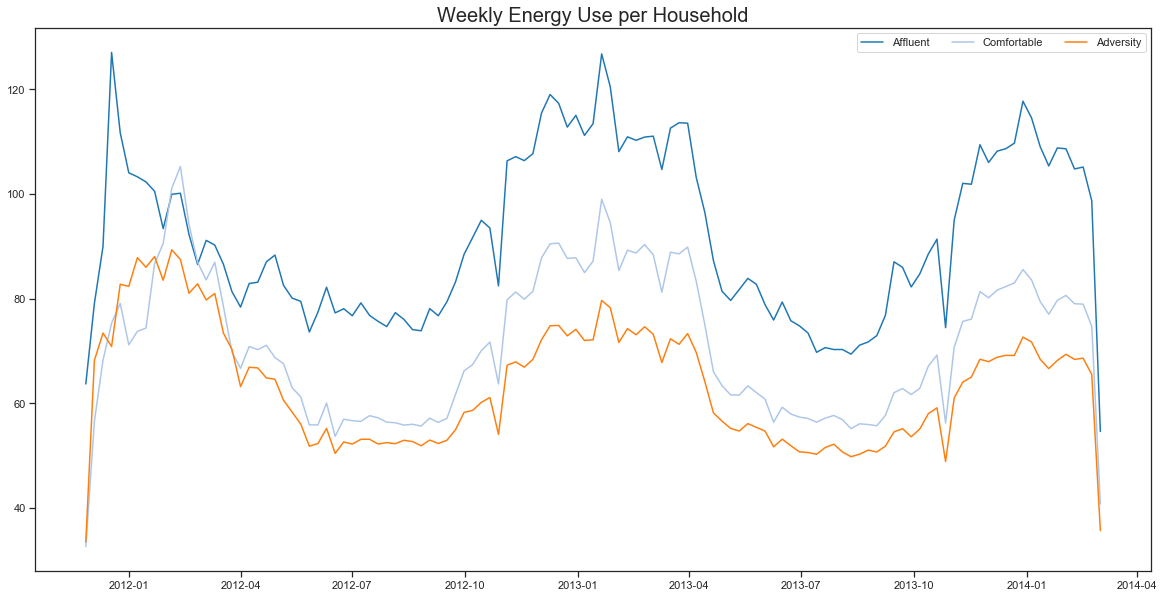

In [119]:
rangeplot(interval = 'W',column = 'energy_sum',title = 'Weekly Energy Use per Household')

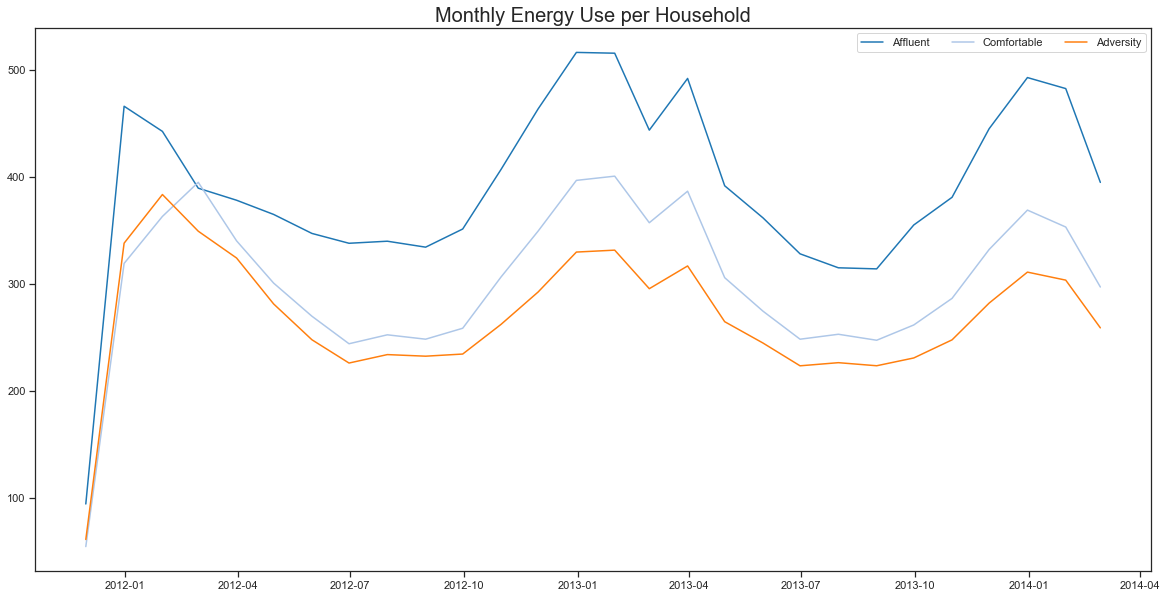

In [120]:
rangeplot(interval = 'M',column = 'energy_sum',title = 'Monthly Energy Use per Household')

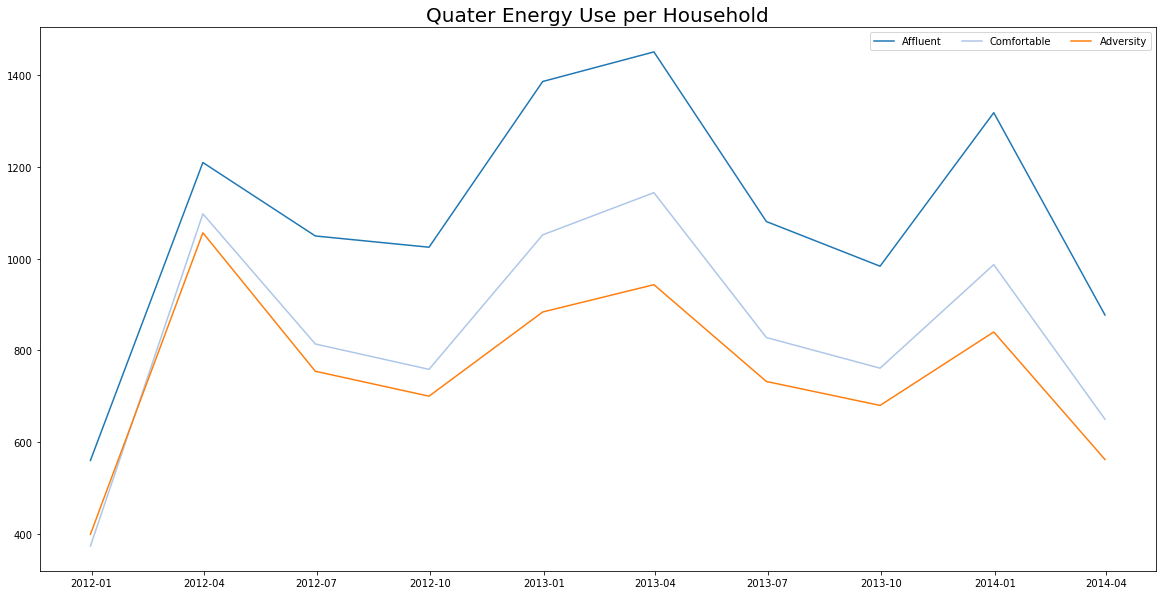

In [76]:
rangeplot(interval = 'Q',column = 'energy_sum',title = 'Quater Energy Use per Household')

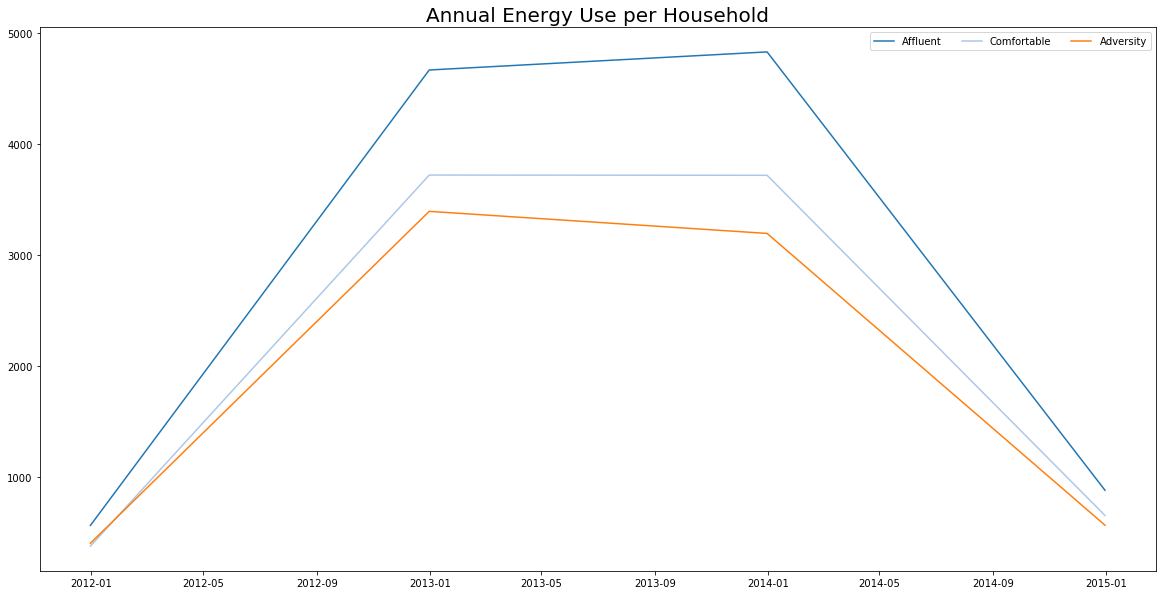

In [77]:
rangeplot(interval = 'A',column = 'energy_sum',title = 'Annual Energy Use per Household')

In [78]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
data = acorn_energy[acorn_energy.Acorn_grouped == 'Affluent'].groupby('day').mean().resample('M').sum()
# data = acorn_energy[acorn_energy.Acorn=='ACORN-A'].resample('M').mean()

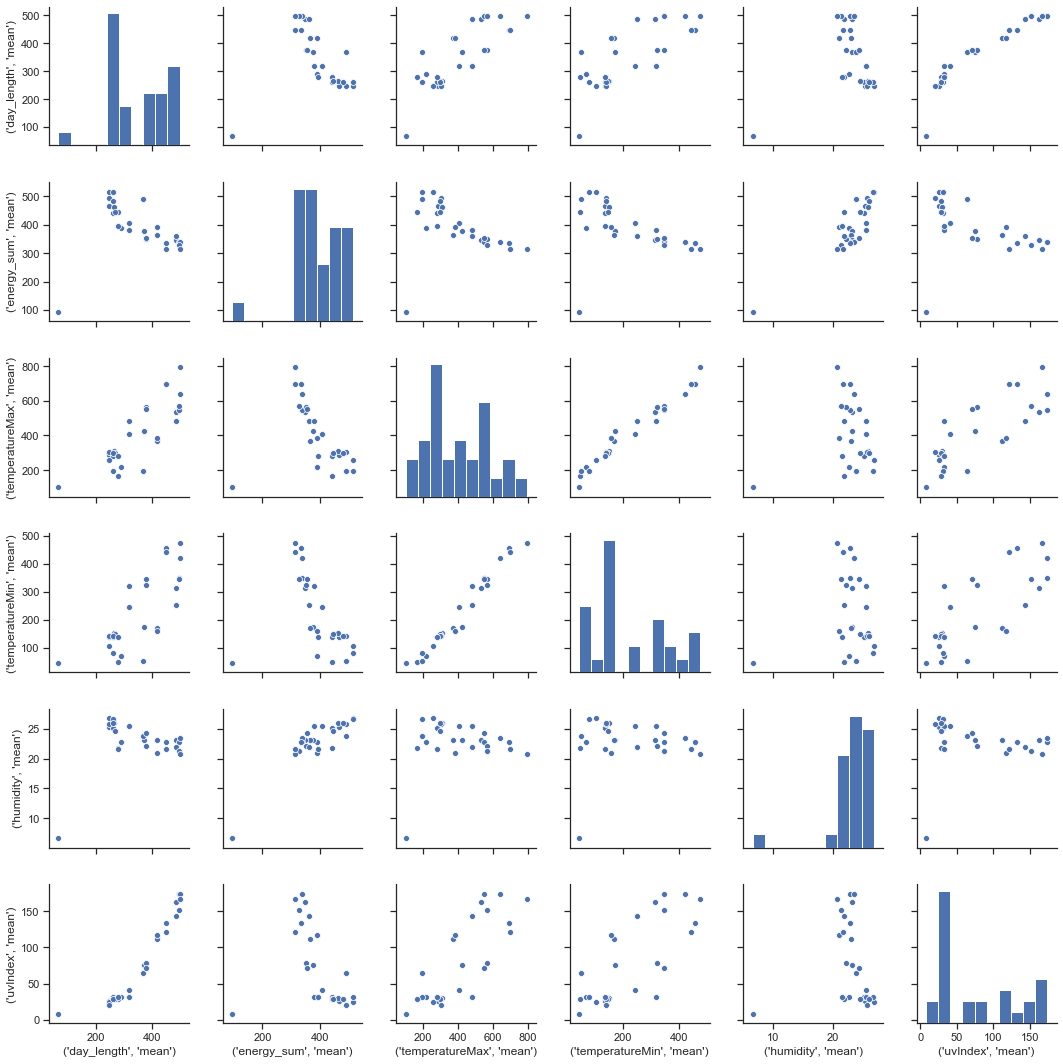

In [79]:
cmp_ls =['day_length', 'energy_sum','temperatureMax','temperatureMin', 'humidity','uvIndex']
sns.pairplot(data[cmp_ls])

__Conclusion: Energy use is correlated to temperature, uvIndx, humidity and day length__

## Seasonal Decompose Stats Model


In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = [14, 4]

In [84]:
acorn_aff = acorn_energy[acorn_energy.Acorn_grouped == 'Affluent'].groupby('day').mean()

In [85]:
# model multiplicative
data = acorn_aff.energy_sum.resample('W').sum() 
result = seasonal_decompose(data, model='multiplicative')
# result = seasonal_decompose(data, model='addictive')

In [86]:
print('std:', result.observed.std())
print('mean:', result.observed.mean())

std: mean    15.988211
dtype: float64
mean: mean    91.918051
dtype: float64


In [87]:
(result.trend.max() - result.trend.min())/(result.observed.max()-result.observed.min())

mean    0.103789
dtype: float64

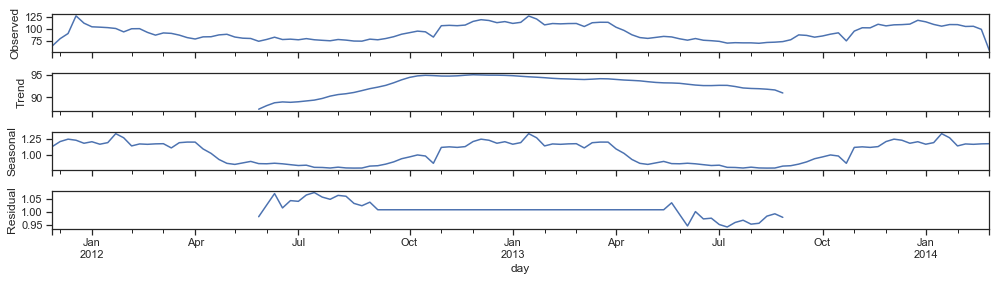

In [88]:

fig = result.plot();
plt.show()

In [353]:
# model multiplicative
data = acorn_aff.energy_sum.resample('W').sum() 
# result = seasonal_decompose(data, model='multiplicative')
result = seasonal_decompose(data, model='addictive')

In [381]:
# plt.title


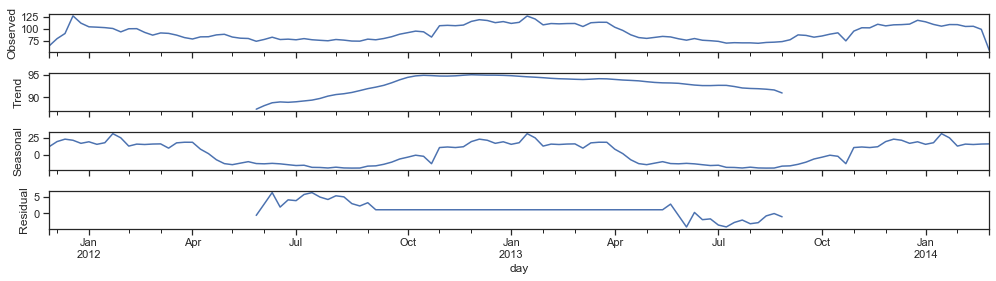

In [380]:

fig = result.plot();

plt.show()

In [383]:
def decompose(df,acorn):

    result = seasonal_decompose(df, model='multiplicative')
    trend_variance = (result.trend.max() - result.trend.min())/(result.observed.max()-result.observed.min()) 
    print('trend variance:' ,trend_variance)
    
    ax1 = plt.subplot(4,1,1)
    ax1.title.set_text('observed')
    ax1.plot(result.observed)

    ax2 = plt.subplot(4,1,2)
    ax2.title.set_text('Trend')
    ax2.plot(result.trend)

    ax3 = plt.subplot(4,1,3)
    ax3.title.set_text('Seasonal')
    ax3.plot(result.seasonal)

    ax4 = plt.subplot(4,1,4)
    ax4.title.set_text('Residual')
    ax4.plot(result.resid)
    plt.tight_layout()
    
    plt.savefig('./Figs/Decompose_'+acorn+'.SVG')
#     fig = result.plot();   
    plt.show()

## ADF TEST - 
to check stationary before feeding in SARIMAX

In [136]:
acorn_energy = acorn_energy.groupby(['Acorn_grouped', 'day']).mean().reset_index()

In [139]:
acorn_energy_day = acorn_energy.set_index('day')

In [105]:
# acorn_energy.to_csv(path_or_buf= 'acorn_energy.csv')

In [140]:
# to check stationary
def AdfTest(df):
    adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(df['mean'])
#     print('Acorn A: Monthly Mean')
    print("ADF: ", adf)
    print("p-value:", pvalue)
#     print('nobs:', nobs)  
    return adf

In [141]:
# check ADF for all neighbors
for acorn in Acorn_grouped_ls:
    
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped ==acorn].energy_sum.resample('W').sum() 
    print('\n',acorn)
    AdfTest(df)
    


 Affluent
ADF:  -2.5737773649302595
p-value: 0.09853896507430782

 Comfortable
ADF:  -2.8480681609255774
p-value: 0.05172882883870527

 Adversity
ADF:  -2.848580092060794
p-value: 0.05166250829870821


## RUN PACF and ACF test

In [142]:
# define helper plot function for visualization
def plots(data, lags=None):    
    data.plot()
    smt.graphics.plot_acf(data, lags=lags)
    smt.graphics.plot_pacf(data, lags=lags)
    sns.despine()
    plt.tight_layout()

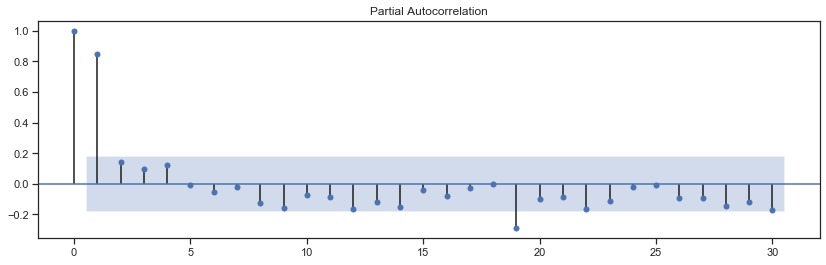

In [399]:
df = acorn_energy_day[acorn_energy_day.Acorn_grouped =='Affluent'].energy_sum.resample('W').sum() 
smt.graphics.plot_pacf(data, lags=30)
plt.savefig('./Figs/W_aff_PACF.SVG')


 Affluent


/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)



 Comfortable

 Adversity


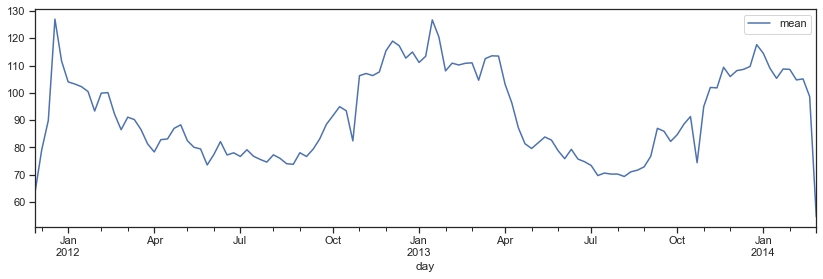

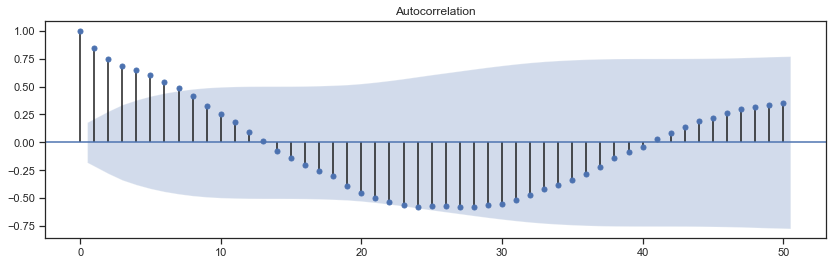

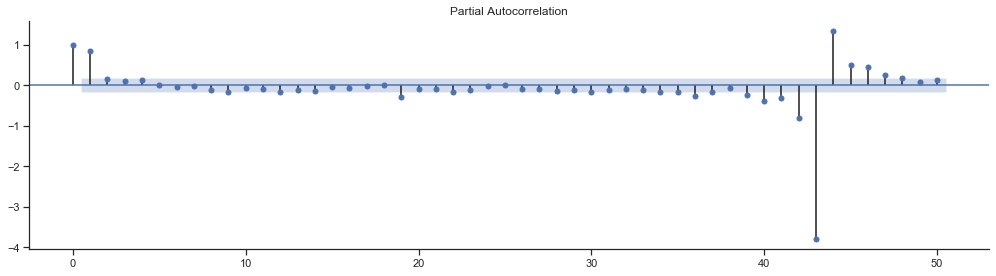

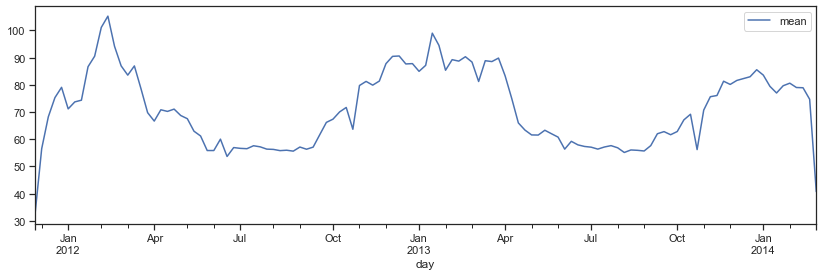

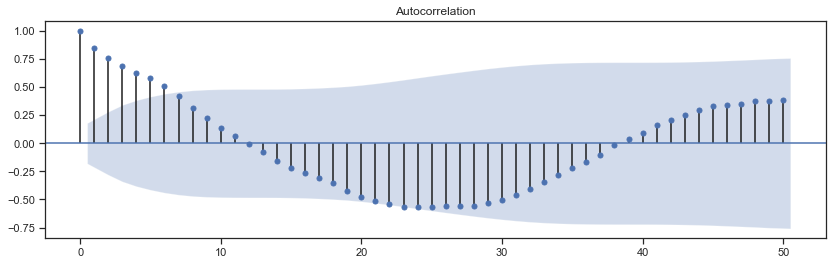

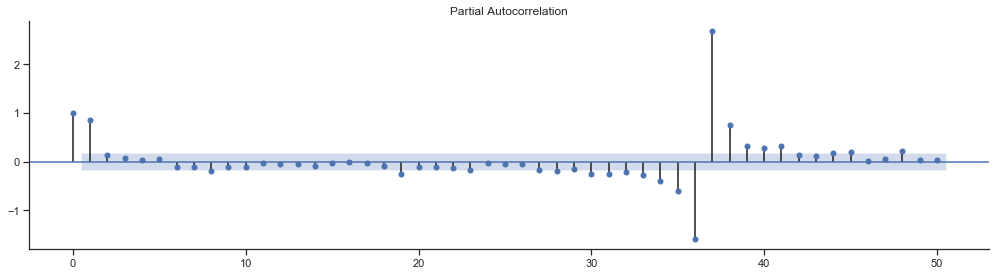

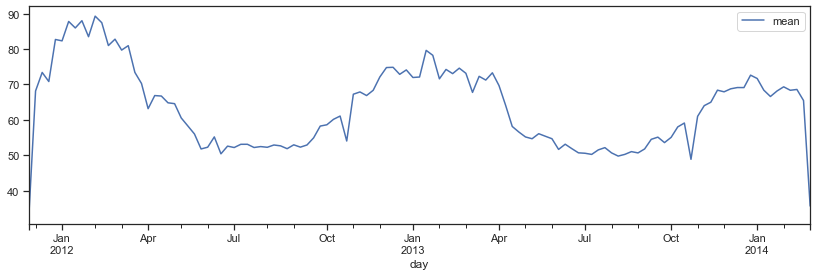

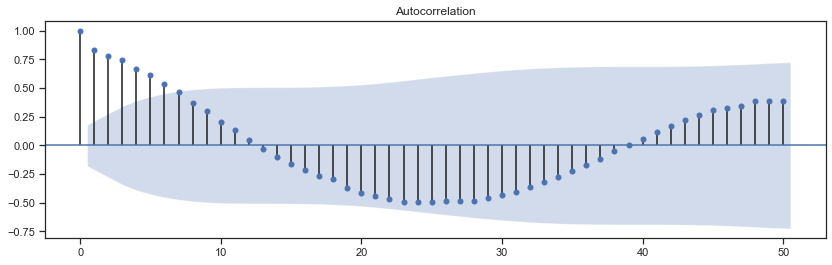

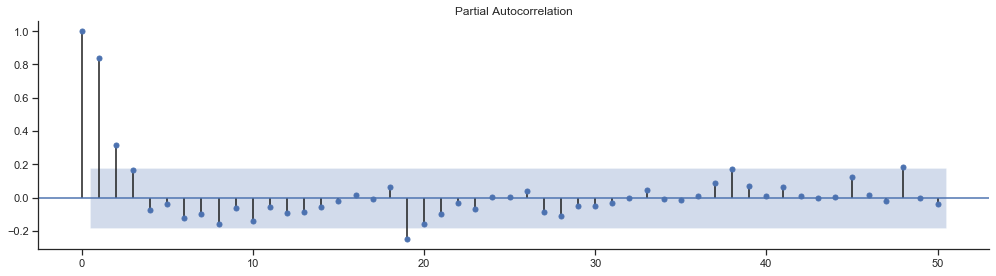

In [143]:
# Weekly
for acorn in Acorn_grouped_ls:
    
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped ==acorn].energy_sum.resample('W').sum() 
    print('\n',acorn)
    plots(df, lags = 50)

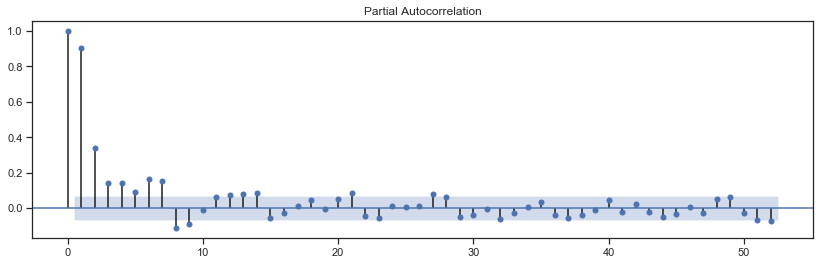

In [404]:
df = acorn_energy_day[acorn_energy_day.Acorn_grouped =='Affluent'].energy_sum
smt.graphics.plot_pacf(df, lags=52)
plt.savefig('./Figs/D_aff_PACF.SVG')


 Affluent

 Comfortable

 Adversity


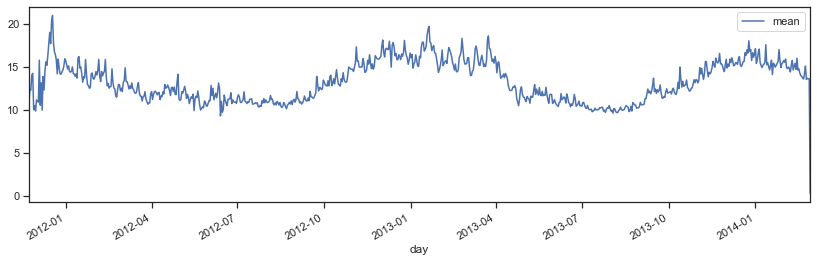

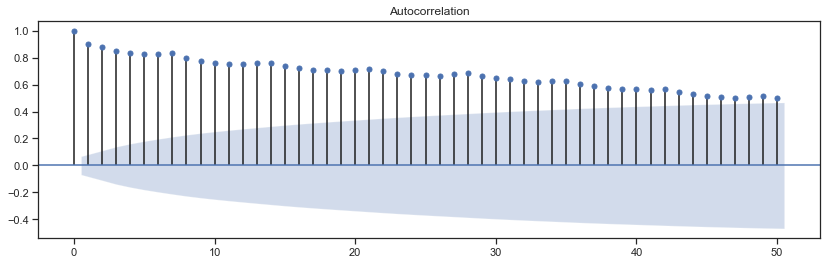

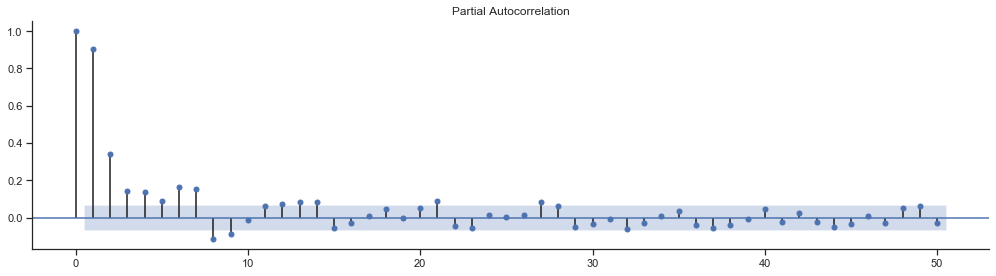

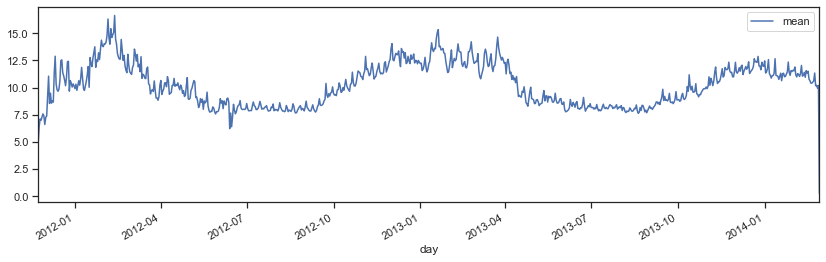

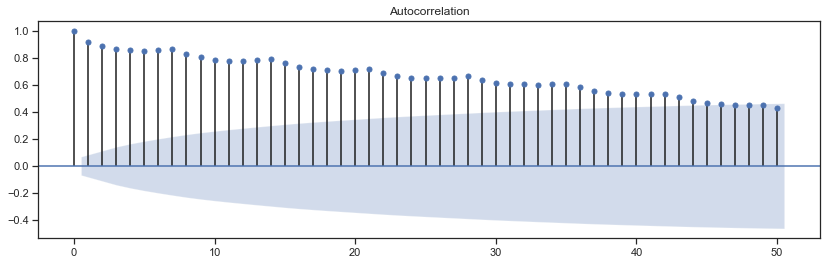

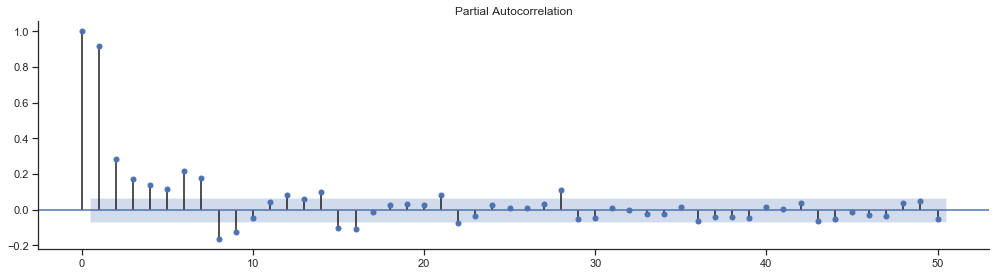

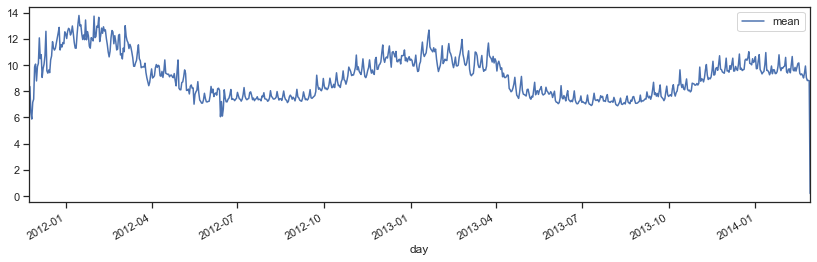

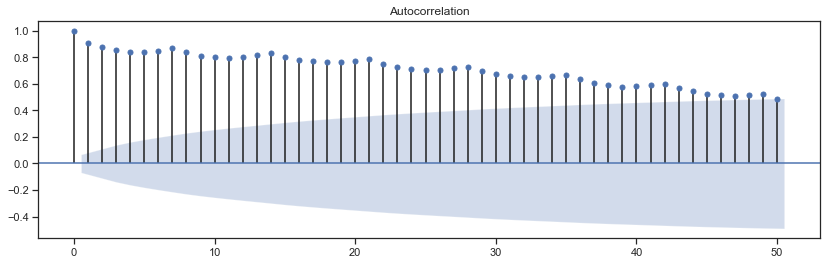

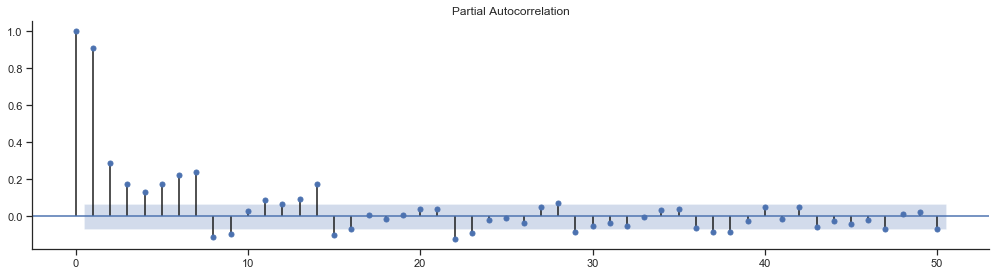

In [401]:
# Daily
for acorn in Acorn_grouped_ls:
    
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped ==acorn].energy_sum
    print('\n',acorn)
    plots(df, lags = 50)

In [ ]:
data = acorn_A.energy_sum.diff().resample('W').sum()
plots(data, lags = 50)

In [ ]:
# #only use 2012 May to 2014 FEB per household

# acorn_A_perHouse = acorn_A.loc['2012-05-01':'2014-02-28']
data = acorn_A.energy_sum.resample('W').sum()
# data.diff()
plots(data, lags = 50)

## SARIMAX
Smooth with log transform

In [148]:
data = acorn_energy_day[acorn_energy_day.Acorn_grouped =='Affluent'].resample('W').sum()

trainPer = 0.86

train_end = int(len(data)*trainPer)
train = data.iloc[:train_end,] 
test = data.iloc[train_end-1:,]

exog_ls = ['day_length'] 


sar = sm.tsa.statespace.SARIMAX(np.log(train['energy_sum']), 
                                exog = train[exog_ls],
                                order=(0,1,1), 
                                seasonal_order=(0,0,0,52), 
                              trend = [0,0,0,0]).fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                   mean   No. Observations:                  102
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 123.589
Date:                Mon, 09 Dec 2019   AIC                           -241.179
Time:                        21:20:18   BIC                           -233.333
Sample:                    11-27-2011   HQIC                          -238.003
                         - 11-03-2013                                         
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
day_length_mean     0.0102      0.002      6.449      0.000       0.007       0.013
ma.L1               0.3043      0.065      4.656      0.000       0.176       0.432
sigma2              0.0051      0.000     11.184      0.000       0.004       0.006
===================================================================================
Ljung-Box (Q):                       82.27   Jarque-Bera (JB):                63.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             0.78
Prob(H) (two-sided):                  0.11   Kurtosis:                         6.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

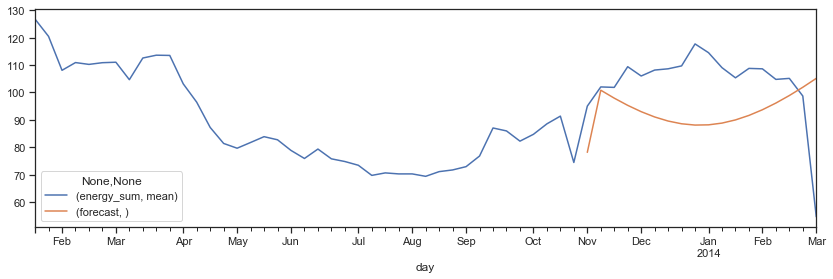

In [149]:
# plot predictions

data['forecast'] = np.exp(sar.predict(exog = test[exog_ls], start = train_end-1, end =len(data), dynamic=False)  )
data[60:][['energy_sum', 'forecast']].plot();

In [150]:
target = 'energy_sum'

data['forecast_test'] = np.exp(sar.predict(exog = test[exog_ls],start =train_end-1, end =len(data), dynamic=False))

data['forecast_train'] = np.exp(sar.predict(exog = train[exog_ls],dynamic=False))

forecast = data['forecast_test'].iloc[train_end-1:,].values
actual = data[target].iloc[train_end-1:,].values.reshape(forecast.shape)
mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
print('Mean Absolute Percentage Error: ', mape)
print( trainPer, ":", mape)

Mean Absolute Percentage Error:  0.17858359130565604
0.86 : 0.17858359130565604


Text(0.5, 1.0, '0.86')

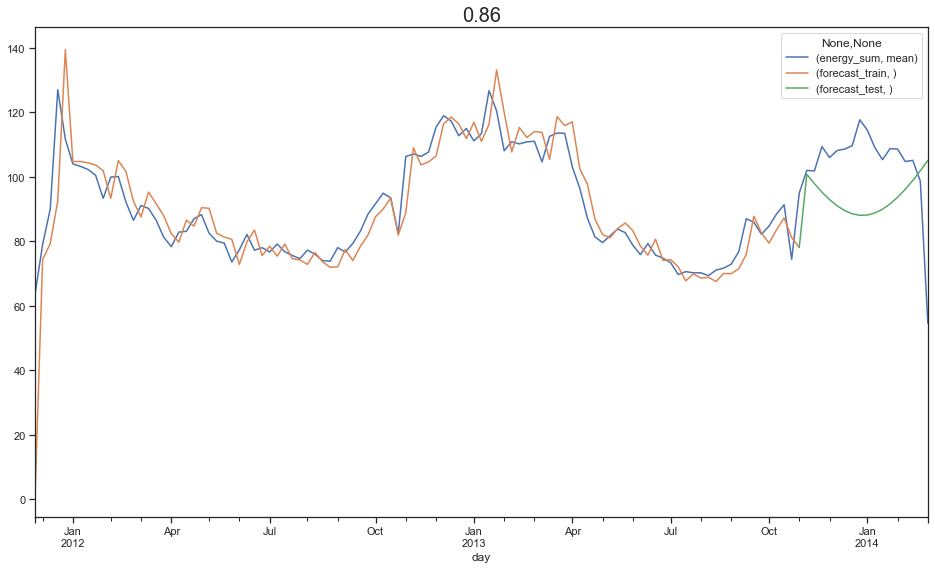

In [151]:
#plot
data[[target, 'forecast_train', 'forecast_test']].plot(figsize=(16,9));
plt.title(trainPer, fontsize = 20)

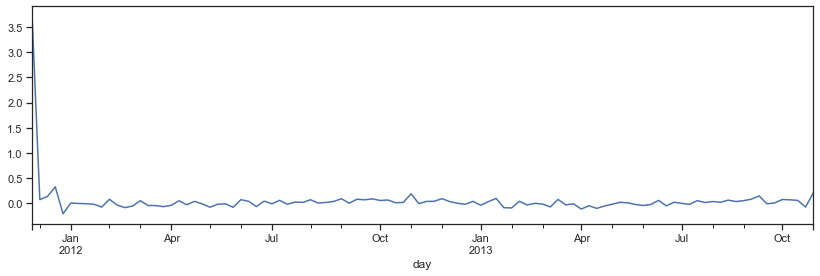

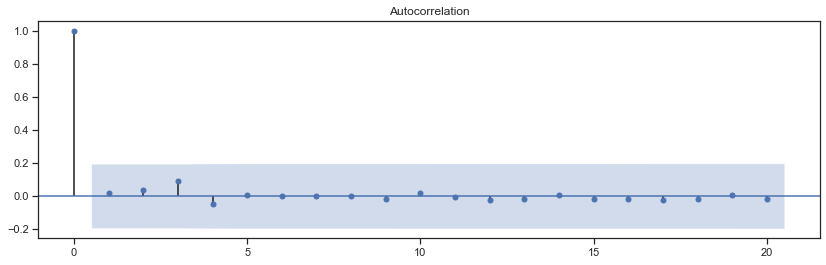

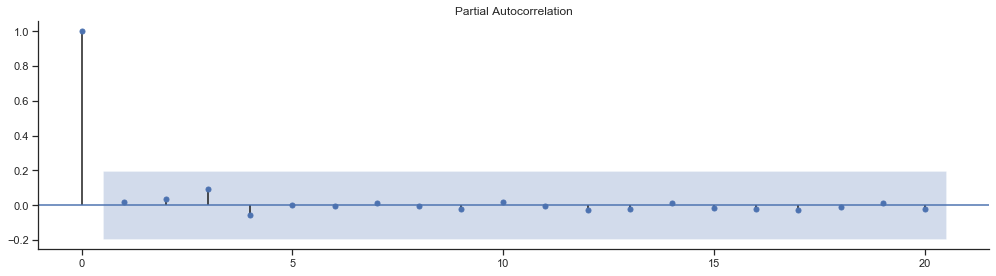

In [152]:
# plot resids
plots(sar.resid, lags=20);


## Auto Arima

In [ ]:
# !pip install --upgrade pip

In [ ]:
# !pip install pmdarima

In [163]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

In [ ]:
# df = acorn_A.resample('W').sum()
df = acorn_energy[acorn_energy.Acorn=='ACORN-D'].resample('W').sum() 
# exog_ls = ['temperatureMax','humidity','temperatureMin','day_length','uvIndex'] 
exog_ls = ['temperatureMax','humidity','temperatureMin','day_length']

model = auto_arima(np.log(df['energy_sum']), exogenous=df[exog_ls],
                   start_p=0, start_q=0,test='adf',max_p=5,max_q=5,d=None,
                   m=52,seasonal=True,start_P=0, start_Q = 0, D=None,
                   max_P = 2,max_D = 1,max_Q = 2, trace=True, scoring='mse', error_action='ignore', 
                   suppress_warnings=True, stepwise=True, trend= 'n')

print(model.summary())

In [280]:
def SarimaxFunc(data, target, trainPer, ARMAorder, Seaorder, trend ,exog_ls = False):

    train_end = int(len(data)*trainPer)
    
    train = data.iloc[:train_end,] 
    test = data.iloc[train_end-1:,]
    if exog_ls==False:
        
        sar = sm.tsa.statespace.SARIMAX((train[target]), 
                                    order=ARMAorder, 
                                    seasonal_order=Seaorder, 
                                    trend=trend).fit()
    
        #forecast
        
        fcast = sar.get_forecast(len(test))
        data['forecast_train'] = sar.predict(dynamic=False)
        
        data['forecast_test'] = (sar.predict(start =train_end-1, end =len(data), dynamic= False))
#         data['forecast_train'] = (sar.predict(dynamic=False))
    else:

        
        sar = sm.tsa.statespace.SARIMAX((train[target]), 
                                        order=ARMAorder, 
                                        seasonal_order=Seaorder, 
                                        trend=trend, exog= train[exog_ls].values).fit()
        #forecast
        fcast = sar.get_forecast(len(test), exog = test[exog_ls].values)

        
        data['forecast_test'] = (sar.predict(start =train_end-1, end =len(data), 
                                           exog = test[exog_ls].values, dynamic=False))

        data['forecast_train'] = (sar.predict(exog= train[exog_ls].values, dynamic=False))
    
    #plot
    data[[target, 'forecast_train', 'forecast_test']].iloc[10:,].plot(figsize=(16,9));
    title = acorn +" "+str(trainPer)
    
#     print(test.index[0])
    plt.vlines(test.index[0], data[target].loc[test.index[0]]+20, 
               data[target].loc[test.index[0]]-20, linestyle='--', color='r', label='Start of forecast');
#     print(fcast.conf_int())
    plt.fill_between(test.index, fcast.conf_int().iloc[:,0],fcast.conf_int().iloc[:,1], alpha= 0.25)
    plt.title(title, fontsize = 20)
    plt.show()
    
    #calculate MAPE
    forecast = data['forecast_test'].iloc[train_end-1:,].values
    actual = data[target].iloc[train_end-1:,].values.reshape(forecast.shape)
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
    print('Mean Absolute Percentage Error: ', mape)
 
    return data, mape

In [153]:
#adding seasonal difference
def train_predict_D(df, exog_ls, target, seaD):
    
#     train_end = int(len(df)*trainPer)
#     train = df.iloc[:train_end,] 
#     test = df.iloc[train_end-1:,]

    model = auto_arima(np.log(df[target]), exogenous=df[exog_ls],
                       start_p=0, start_q=0,test='adf',max_p=5,max_q=3,d=None,
                       m=52,seasonal=True,start_P=0, start_Q = 0, D=seaD, 
                       max_P = 1,max_D = 1,max_Q = 1, trace=True, scoring='mse', error_action='ignore', 
                       suppress_warnings=True, stepwise=True)

#     print(model.summary())
    mape_score = dict()
    for Per in np.arange(0.6,0.94, 0.01):
        
        train_end = int(len(df)*Per)
        train = df.iloc[:train_end,] 
        test = df.iloc[train_end-1:,]
        
        try:    
            model.fit(np.log(train[target]),exogenous= train[exog_ls])
            future_forecast = np.exp(model.predict(n_periods=len(test[target]),exogenous= test[exog_ls]))
            actual = test[target].values.reshape(future_forecast.shape)
            mape = np.mean(np.abs(future_forecast - actual)/np.abs(actual))
            mape_score[Per]=mape
        except:
             print('')
#     print(mape_score)


    trainPer = min(mape_score, key=mape_score.get)
#     trainPer = 0.88
#     print(trainPer)
    ARMAorder = model.order
    Seaorder = model.seasonal_order
    trend = model.trend

    yhat, mape = SarimaxFunc(data = df, target= target, trainPer= trainPer , ARMAorder = ARMAorder, 
                                 Seaorder = Seaorder, trend=trend, exog_ls= exog_ls)
    return  model, mape

In [216]:
#adding trend parameter
def train_predict_D_trend(df, exog_ls, target, seaD, trend):
    
#     train_end = int(len(df)*trainPer)
#     train = df.iloc[:train_end,] 
#     test = df.iloc[train_end-1:,]

    model = auto_arima(np.log(df[target]), exogenous=df[exog_ls],
                       start_p=0, start_q=0,test='adf',max_p=5,max_q=3,d=None,
                       m=52,seasonal=True,start_P=0, start_Q = 0, D=seaD, 
                       max_P = 1,max_D = 1,max_Q = 1, trace=True, scoring='mse', error_action='ignore', 
                       suppress_warnings=True, stepwise=True, trend = trend)

#     print(model.summary())
    mape_score = dict()
    for Per in np.arange(0.6,0.94, 0.01):
        
        train_end = int(len(df)*Per)
        train = df.iloc[:train_end,] 
        test = df.iloc[train_end-1:,]
        
        try:    
            model.fit(np.log(train[target]),exogenous= train[exog_ls])
            future_forecast = np.exp(model.predict(n_periods=len(test[target]),exogenous= test[exog_ls]))
            actual = test[target].values.reshape(future_forecast.shape)
            mape = np.mean(np.abs(future_forecast - actual)/np.abs(actual))
            mape_score[Per]=mape
        except:
             print('')
#     print(mape_score)


    trainPer = min(mape_score, key=mape_score.get)
#     trainPer = 0.88
#     print(trainPer)
    ARMAorder = model.order
    Seaorder = model.seasonal_order
    trend = model.trend

    yhat, mape = SarimaxFunc(data = df, target= target, trainPer= trainPer , ARMAorder = ARMAorder, 
                                 Seaorder = Seaorder, trend=trend, exog_ls= exog_ls)
    return  model, mape

In [274]:
#adding seasonal sample size
def train_predict_D_trend_m(df, target, seaD, trend, m, exog_ls = False):
    
#     train_end = int(len(df)*trainPer)
#     train = df.iloc[:train_end,] 
#     test = df.iloc[train_end-1:,]

    if exog_ls:
        
        model = auto_arima(np.log(df[target]), exogenous=df[exog_ls],
                           start_p=0, start_q=0,test='adf',max_p=50,max_q=50,d=None,
                           m=m,seasonal=False,start_P=0, start_Q = 0, D=seaD, 
                           max_P = 2,max_D = 1,max_Q = 2, trace=True, scoring='mse', error_action='ignore', 
                           suppress_warnings=True, stepwise=True, trend = trend)
    else:
        #no exog
        model = auto_arima(np.log(df[target]),
                       start_p=0, start_q=0,test='adf',max_p=50,max_q=50,d=None,
                       m=m,seasonal=False,start_P=0, start_Q = 0, D=seaD, 
                       max_P = 2,max_D = 1,max_Q = 2, trace=True, scoring='mse', error_action='ignore', 
                       suppress_warnings=True, stepwise=True, trend = trend)

#     print(model.summary())
    mape_score = dict()
    for Per in np.arange(0.6,0.94, 0.01):
        
        train_end = int(len(df)*Per)
        train = df.iloc[:train_end,] 
        test = df.iloc[train_end-1:,]
        
        if exog_ls:
              
            try:    
                model.fit(np.log(train[target]),exogenous= train[exog_ls])
                future_forecast = np.exp(model.predict(n_periods=len(test[target]),exogenous= test[exog_ls]))
                actual = test[target].values.reshape(future_forecast.shape)
                mape = np.mean(np.abs(future_forecast - actual)/np.abs(actual))
                mape_score[Per]=mape
            except:
                 print('')
        else:
            #no exog
            try:    
                model.fit(np.log(train[target]))
                future_forecast = np.exp(model.predict(n_periods=len(test[target])))
                actual = test[target].values.reshape(future_forecast.shape)
                mape = np.mean(np.abs(future_forecast - actual)/np.abs(actual))
                mape_score[Per]=mape
            except:
                 print('')
        
#     print(mape_score)


    trainPer = min(mape_score, key=mape_score.get)
#     trainPer = 0.88
#     print(trainPer)
    ARMAorder = model.order
    Seaorder = model.seasonal_order
    trend = model.trend

    yhat, mape = SarimaxFunc(data = df, target= target, trainPer= trainPer , ARMAorder = ARMAorder, 
                                 Seaorder = Seaorder, trend=trend, exog_ls= exog_ls)
    return  model, mape, yhat

## Looping thur 3 groups

In [161]:
from collections import defaultdict

In [ ]:
# total forecast
# acorn energy use per day * houeshold unit

In [170]:
def basic_plot(df, title):
    df['energy_sum'].plot(title = 'Energy_graph');
    df['energy_sum'].hist();

Affluent
Comfortable
Adversity


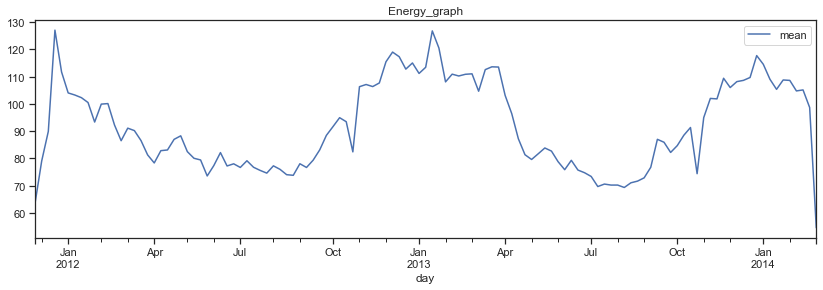

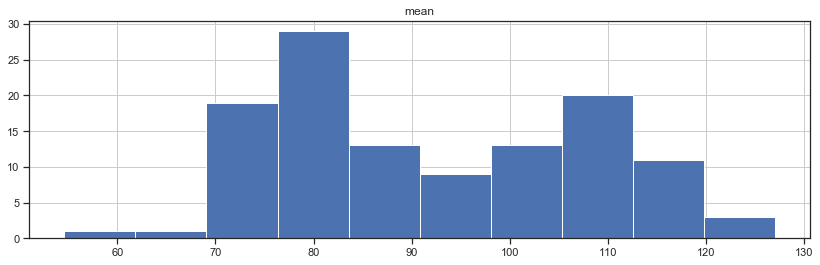

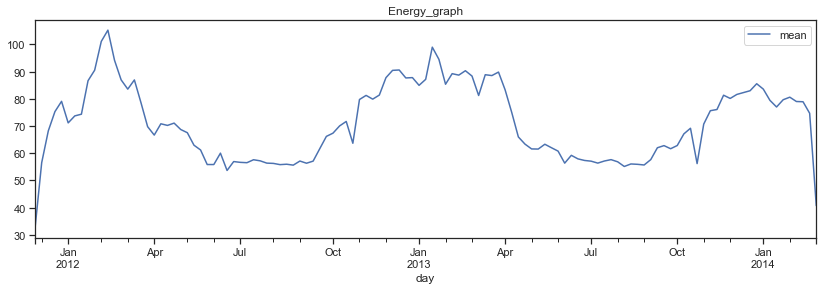

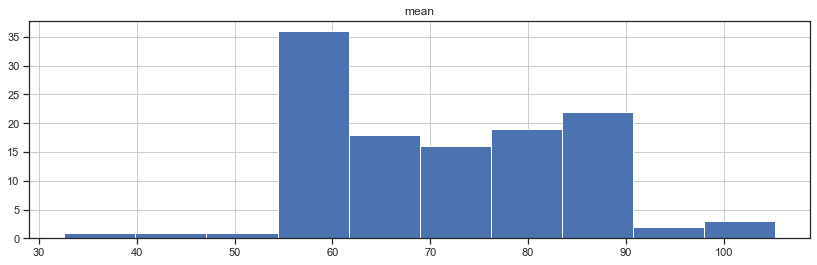

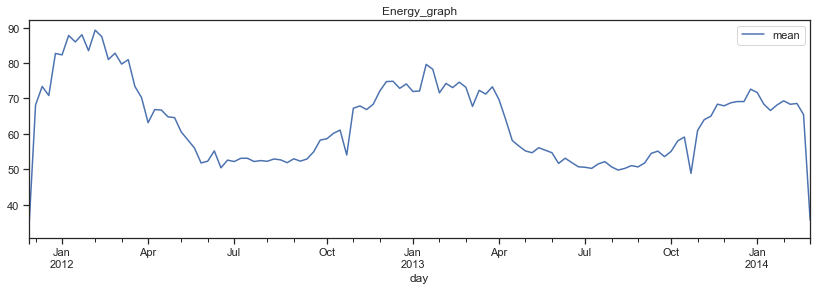

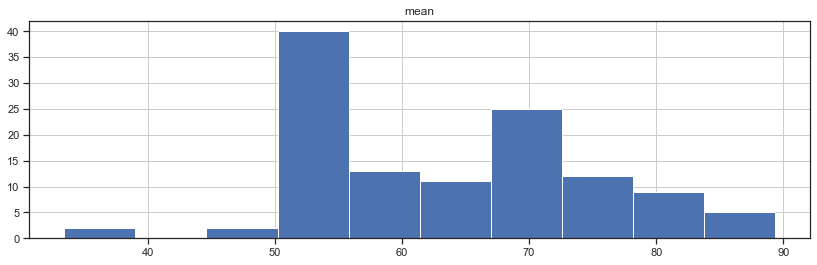

In [172]:
for acorn in Acorn_grouped_ls:
    print(acorn)
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].resample('W').sum()
    basic_plot(df)

In [182]:
def plotMeanVariance(df):
    # mean and variance
    plt.figure()
    plt.subplot(211)
    #rolling mean 
    plt.plot(df['energy_sum'].rolling(4).mean(), label = 'Mean Per Month')
    plt.plot(df['energy_sum'].rolling(12).mean(), label = 'Mean Per Quater')
    plt.title('Rolling Mean per Houshold')
#     plt.ylabel('kWh/week')
    plt.legend();

    #rolling variance
    plt.subplot(212)
    plt.plot(df['energy_sum'].loc['2012-04-01':'2014-03-01',].rolling(4).var(), label = 'Variance Per Month')
    plt.plot(df['energy_sum'].loc['2012-04-01':'2014-03-01',].rolling(12).var(), label = 'Variance Per Quater')
    plt.title('Rolling Variance per Houshold')
#     plt.ylabel('kWh/week')
    plt.legend();
    plt.tight_layout()
    

Affluent
Comfortable
Adversity


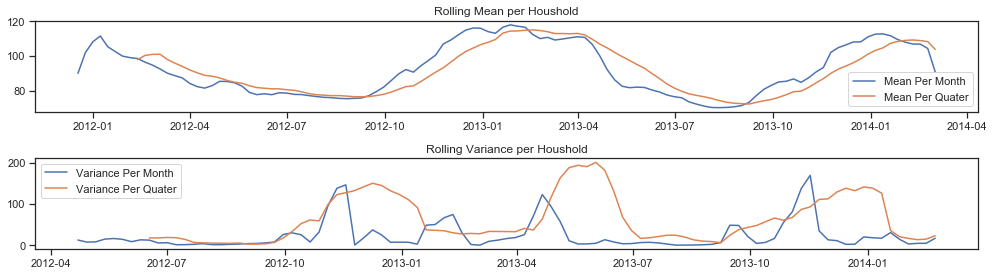

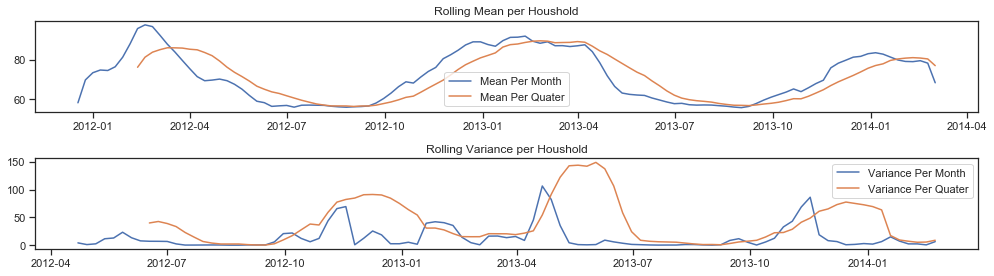

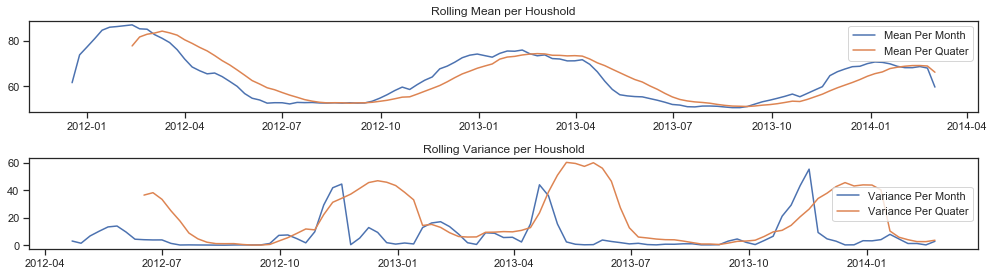

In [183]:
for acorn in Acorn_grouped_ls:
    print(acorn)
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].resample('W').sum()
    plotMeanVariance(df)

### Run Decompose Test
Check Trends and Seasonality


 Affluent
ADF:  -2.5737773649302595
p-value: 0.09853896507430782
trend variance: mean    0.103789
dtype: float64


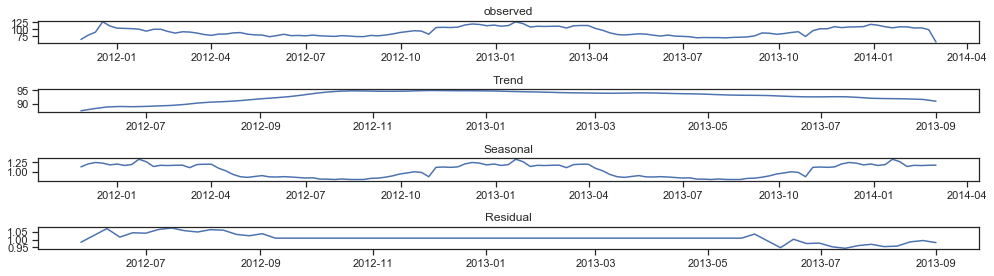


 Comfortable
ADF:  -2.8480681609255774
p-value: 0.05172882883870527
trend variance: mean    0.052582
dtype: float64


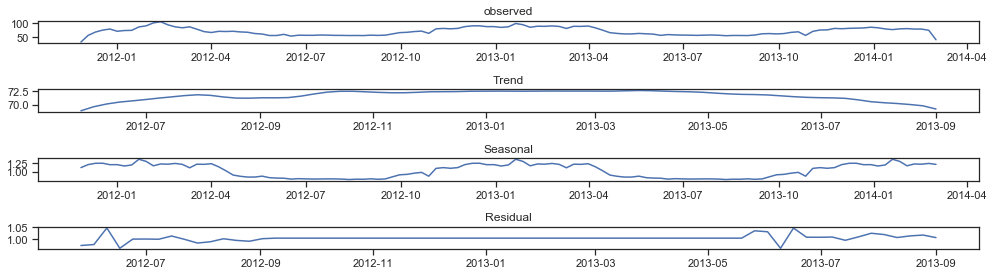


 Adversity
ADF:  -2.848580092060794
p-value: 0.05166250829870821
trend variance: mean    0.093041
dtype: float64


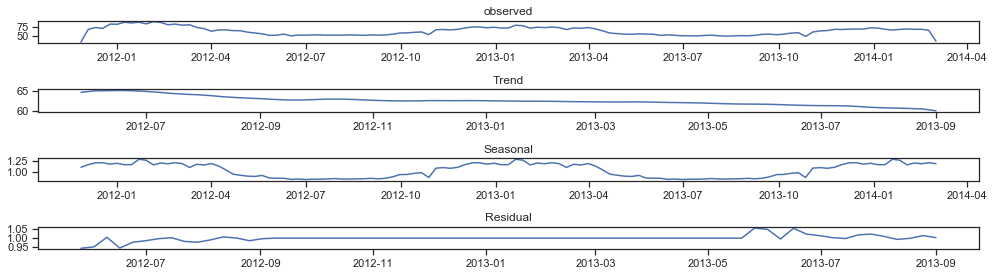

In [385]:
# weekly decompose test
Acorn_grouped_ls = ['Affluent','Comfortable','Adversity']
for acorn in Acorn_grouped_ls:
    
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].energy_sum.resample('W').sum()
    print('\n',acorn)
    AdfTest(df)
    decompose(df, acorn)

## Model

Affluent
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-294.868, BIC=-278.244, Fit time=0.159 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=-303.496, BIC=-281.331, Fit time=3.368 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-296.759, BIC=-282.905, Fit time=0.100 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-307.284, BIC=-287.889, Fit time=0.196 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-310.302, BIC=-288.136, Fit time=0.236 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=-308.991, BIC=-284.054, Fit time=3.993 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 1, 52)

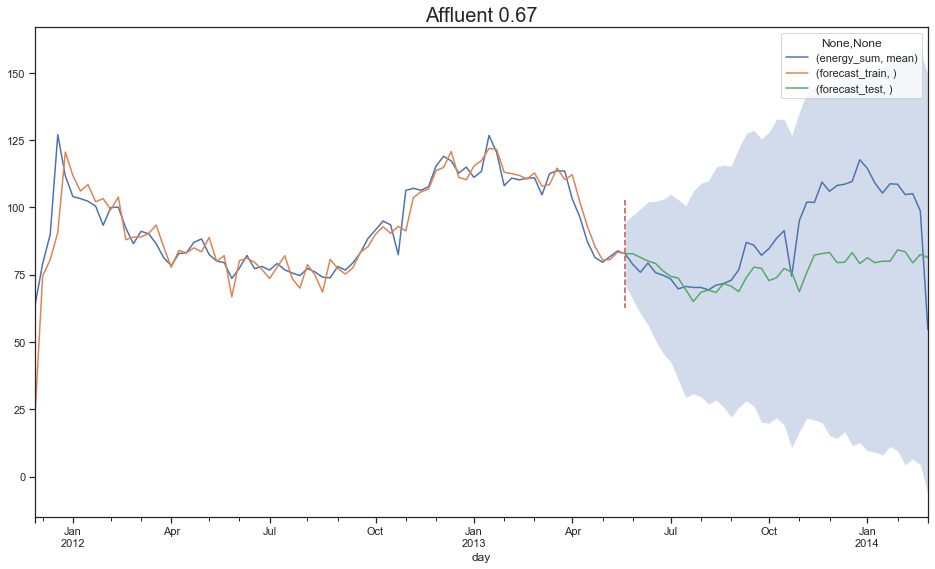

Mean Absolute Percentage Error:  0.14693994168030125
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-153.368, BIC=-140.230, Fit time=2.716 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=-150.560, BIC=-133.043, Fit time=8.961 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-155.079, BIC=-144.131, Fit time=3.321 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=-151.413, BIC=-136.085, Fit time=3.111 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-152.538, BIC=-137.211, Fit time=2.925 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=-156.337, BIC=-141.009, Fit time=3.887 seconds
Fit ARIMA: 

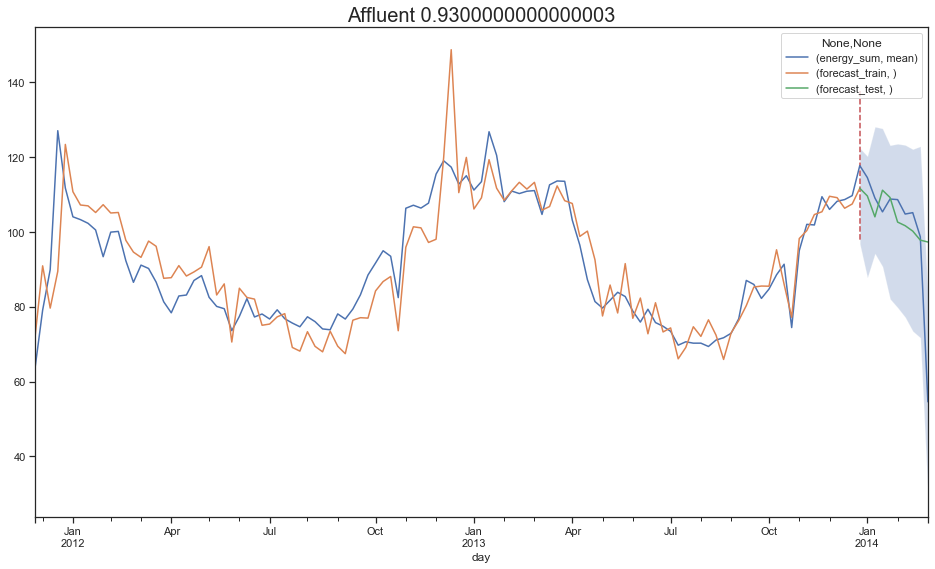

Mean Absolute Percentage Error:  0.11222545733275893
Comfortable
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-190.859, BIC=-174.185, Fit time=0.194 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=-23.076, BIC=-0.843, Fit time=2.522 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-21.053, BIC=-7.157, Fit time=0.130 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=-188.796, BIC=-169.342, Fit time=3.321 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-228.832, BIC=-209.378, Fit time=0.222 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=

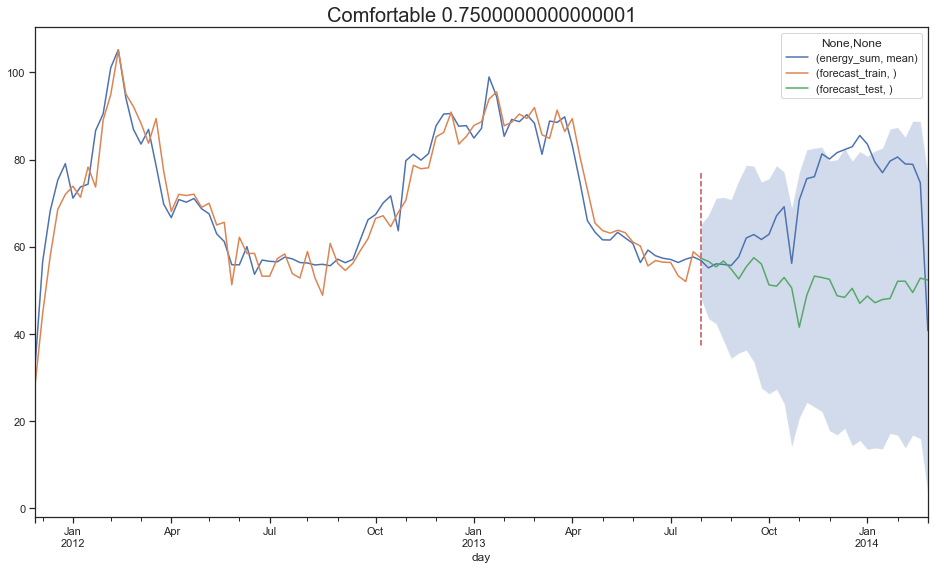

Mean Absolute Percentage Error:  0.2538353677636901
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-182.780, BIC=-169.642, Fit time=2.284 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=-181.077, BIC=-163.560, Fit time=12.748 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-183.707, BIC=-172.759, Fit time=3.419 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=-180.834, BIC=-165.506, Fit time=7.702 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-182.983, BIC=-167.655, Fit time=1.293 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=-182.299, BIC=-166.971, Fit time=2.588 seconds
Fit ARIMA: 

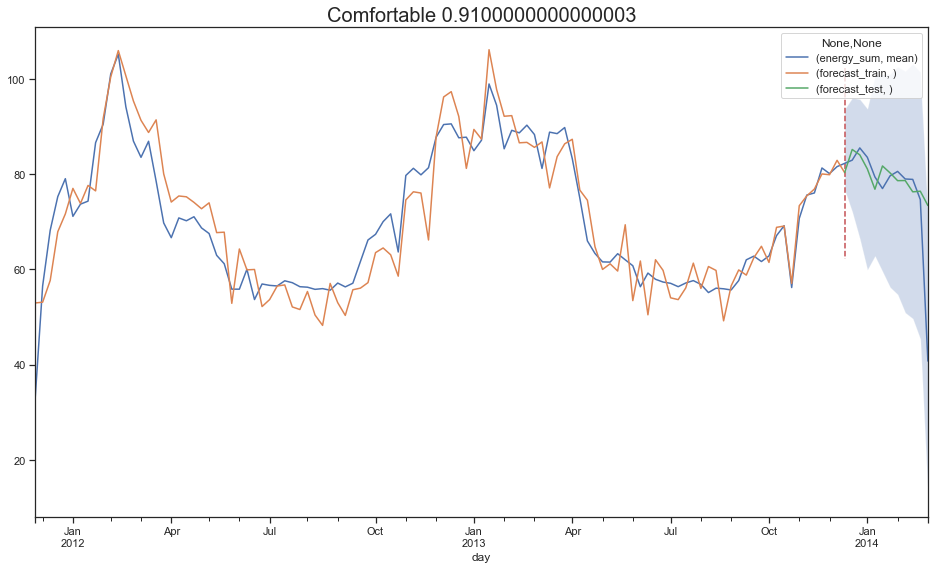

Mean Absolute Percentage Error:  0.09052880359041919
Adversity
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-188.461, BIC=-171.786, Fit time=0.144 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=-225.449, BIC=-203.216, Fit time=4.701 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-18.587, BIC=-4.691, Fit time=0.177 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-227.671, BIC=-208.217, Fit time=0.231 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-233.408, BIC=-211.175, Fit time=0.271 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=-229.180, BIC=-204.168, Fit time=4.838 seconds
Fit 

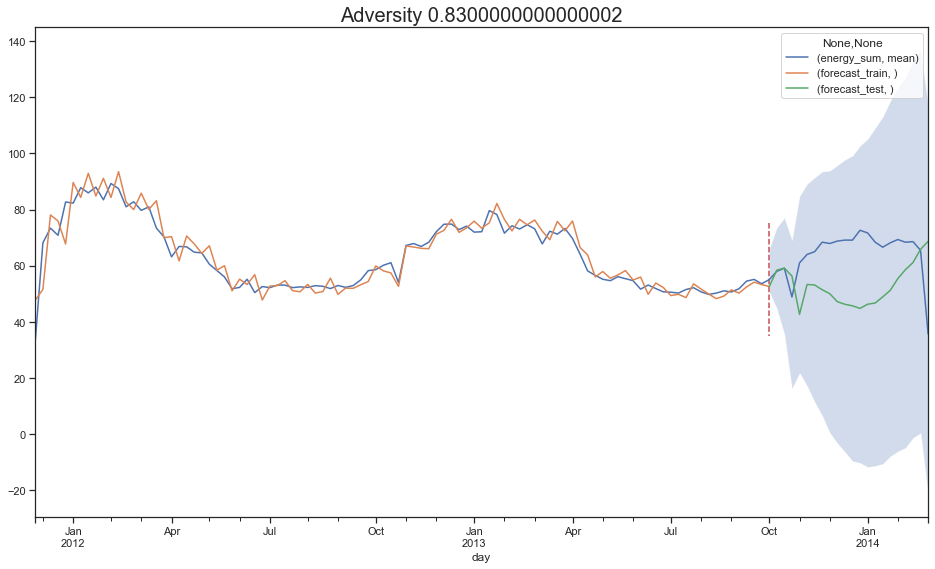

Mean Absolute Percentage Error:  0.24098538696474492
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-184.293, BIC=-171.155, Fit time=1.310 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=-186.811, BIC=-169.293, Fit time=7.745 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-186.261, BIC=-175.313, Fit time=3.274 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-189.048, BIC=-173.720, Fit time=3.221 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-187.512, BIC=-169.995, Fit time=2.606 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=-187.253, BIC=-169.736, Fit time=3.582 seconds
Fit ARIMA: 

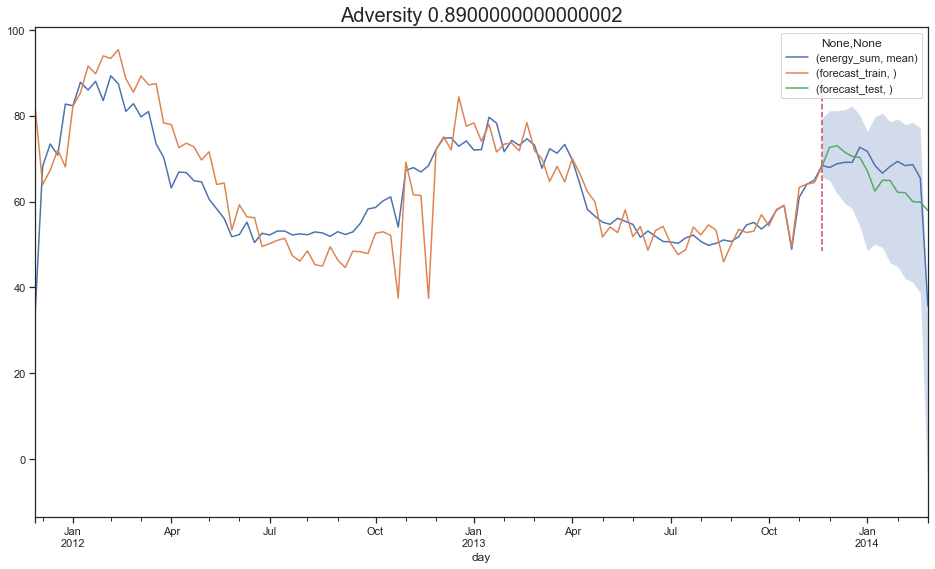

Mean Absolute Percentage Error:  0.09836186259142939


In [164]:
model_dict0 = defaultdict(tuple)
model_dict1 = defaultdict(tuple)
for acorn in Acorn_grouped_ls:
    print(acorn)
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].resample('W').sum()
    exog_ls = ['temperatureMax','humidity','temperatureMin','day_length']
    target = 'energy_sum'
    # trainPer = 0.88
    model_D0, mape_D0 = train_predict_D(df, exog_ls, target, seaD=0)
    model_dict0[acorn] = model_D0, mape_D0
    
    model_D1, mape_D1 = train_predict_D(df, exog_ls, target, seaD=1)
    model_dict1[acorn] = model_D1, mape_D1

In [184]:
model_dict0

defaultdict(tuple,
            {'Affluent': (ARIMA(maxiter=50, method='lbfgs', order=(3, 1, 0), out_of_sample_size=0,
                    scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 52),
                    start_params=None, suppress_warnings=True, trend=None,
                    with_intercept=True),
              0.14693994168030125),
             'Comfortable': (ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
                    scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 52),
                    start_params=None, suppress_warnings=True, trend=None,
                    with_intercept=True), 0.2538353677636901),
             'Adversity': (ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 0), out_of_sample_size=0,
                    scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 52),
                    start_params=None, suppress_warnings=True, trend=None,
                    with_intercept=True), 0.24098538696474492)

In [185]:
model_dict1

defaultdict(tuple,
            {'Affluent': (ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 0), out_of_sample_size=0,
                    scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 52),
                    start_params=None, suppress_warnings=True, trend=None,
                    with_intercept=True),
              0.11222545733275893),
             'Comfortable': (ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
                    scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 52),
                    start_params=None, suppress_warnings=True, trend=None,
                    with_intercept=False), 0.09052880359041919),
             'Adversity': (ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
                    scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 52),
                    start_params=None, suppress_warnings=True, trend=None,
                    with_intercept=True), 0.0983618625914293

Affluent
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-221.428, BIC=-206.988, Fit time=0.073 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=-261.042, BIC=-241.788, Fit time=2.511 seconds
Near non-invertible roots for order (1, 1, 0)(1, 0, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-223.360, BIC=-211.326, Fit time=0.080 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=-234.951, BIC=-218.104, Fit time=1.633 seconds
Near non-invertible roots for order (0, 1, 0)(1, 0, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 

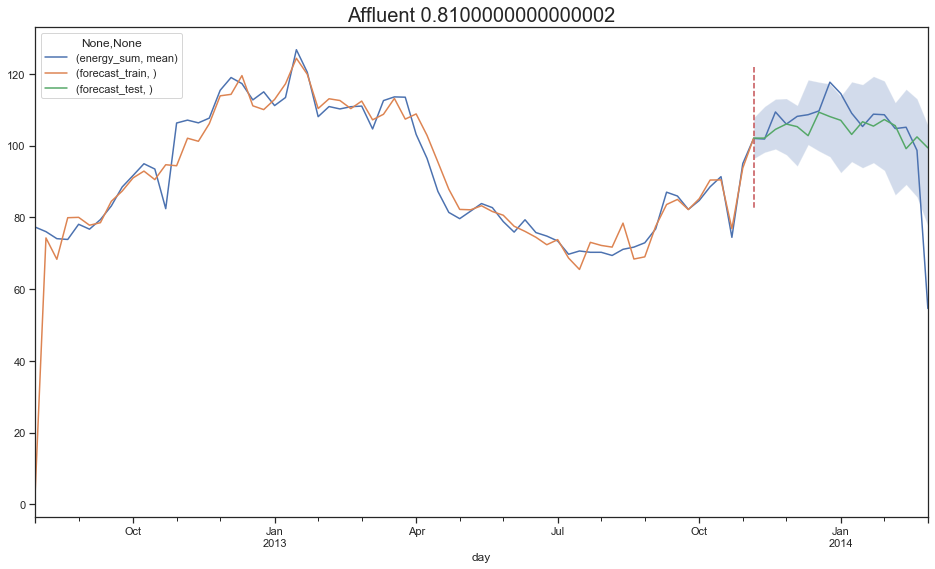

Mean Absolute Percentage Error:  0.07713240750666832
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 0, 52); AIC=-81.755, BIC=-73.551, Fit time=1.580 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 0, 52); AIC=-83.746, BIC=-76.910, Fit time=2.270 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 1, 0, 52); AIC=-85.784, BIC=-76.213, Fit time=0.754 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 1, 1, 5

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/statespace/mlemodel.py:2877: RuntimeWarning: invalid value encountered in sqrt
  se_mean = np.sqrt(self.var_pred_mean)
/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/statespace/mlemodel.py:2877: RuntimeWarning: invalid value encountered in sqrt
  se_mean = np.sqrt(self.var_pred_mean)


/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


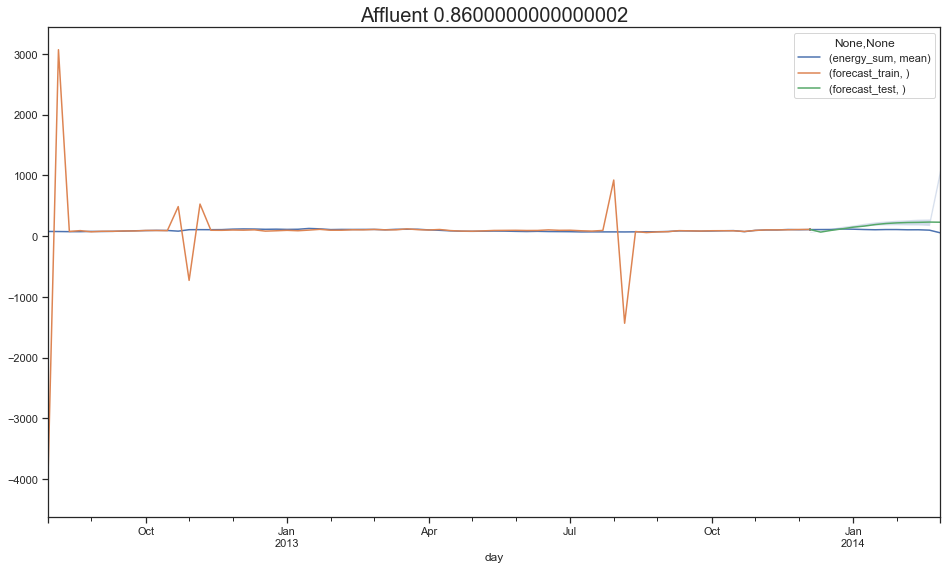

Mean Absolute Percentage Error:  0.8429863834622757
Comfortable
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-214.454, BIC=-200.014, Fit time=0.066 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=-264.061, BIC=-244.807, Fit time=3.047 seconds
Near non-invertible roots for order (1, 1, 0)(1, 0, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-216.362, BIC=-204.329, Fit time=0.122 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=-227.221, BIC=-210.374, Fit time=2.195 seconds
Near non-invertible roots for order (0, 1, 0)(1, 0, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan se

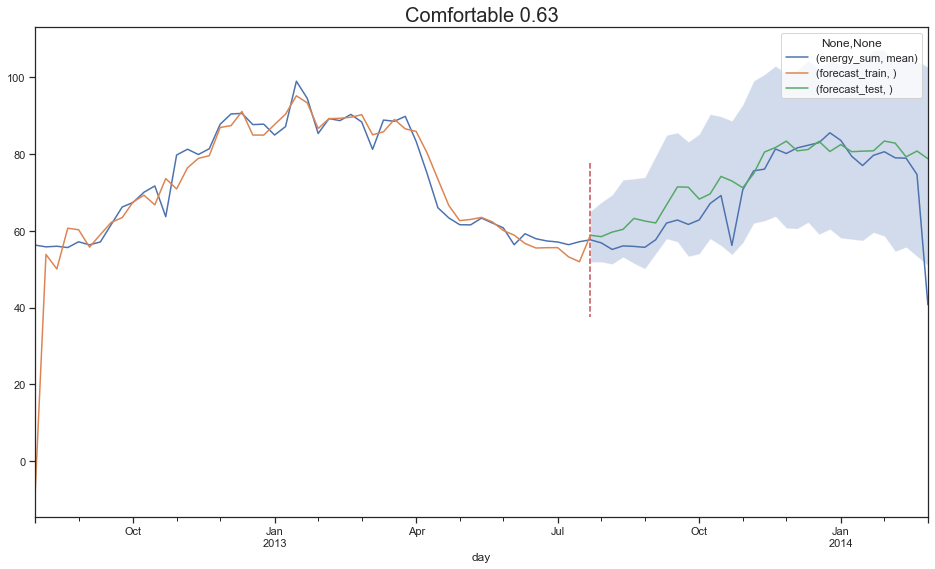

Mean Absolute Percentage Error:  0.08754578028335216
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 0, 52); AIC=-83.533, BIC=-75.330, Fit time=1.560 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 0, 52); AIC=-85.526, BIC=-78.689, Fit time=2.192 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 1, 0, 52); AIC=-84.812, BIC=-75.241, Fit time=1.234 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 0, 52); AIC=-87.670, BIC=-78.099, Fit time=1.773 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/statespace/mlemodel.py:2877: RuntimeWarning: invalid value encountered in sqrt
  se_mean = np.sqrt(self.var_pred_mean)
/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/statespace/mlemodel.py:2877: RuntimeWarning: invalid value encountered in sqrt
  se_mean = np.sqrt(self.var_pred_mean)


/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


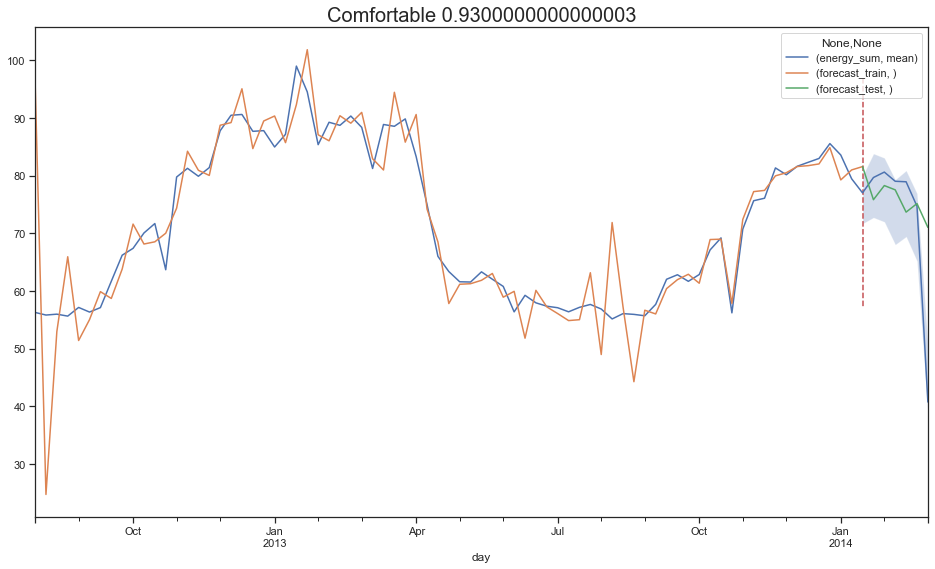

Mean Absolute Percentage Error:  0.13873228979831917
Adversity
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-220.722, BIC=-206.281, Fit time=0.055 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=-282.538, BIC=-263.284, Fit time=2.978 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-222.636, BIC=-210.603, Fit time=0.071 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-287.567, BIC=-270.720, Fit time=0.236 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-285.440, BIC=-266.186, Fit time=0.228 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 52); AIC=-293.104, BIC=-273.851, Fit time=0.303 seconds
F

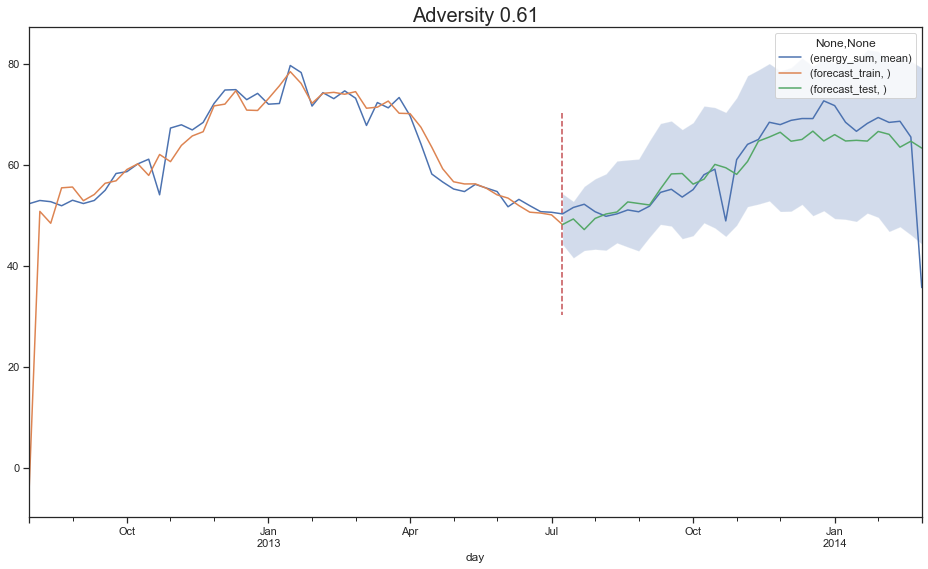

Mean Absolute Percentage Error:  0.06763002050390056
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 0, 52); AIC=-84.617, BIC=-76.413, Fit time=1.791 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 0, 52); AIC=-86.614, BIC=-79.778, Fit time=4.072 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 1, 0, 52); AIC=-86.325, BIC=-76.754, Fit time=2.775 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 0, 52); AIC=-90.894, BIC=-81.323, Fit time=4.315 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/statespace/mlemodel.py:2877: RuntimeWarning: invalid value encountered in sqrt
  se_mean = np.sqrt(self.var_pred_mean)
/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/statespace/mlemodel.py:2877: RuntimeWarning: invalid value encountered in sqrt
  se_mean = np.sqrt(self.var_pred_mean)


/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


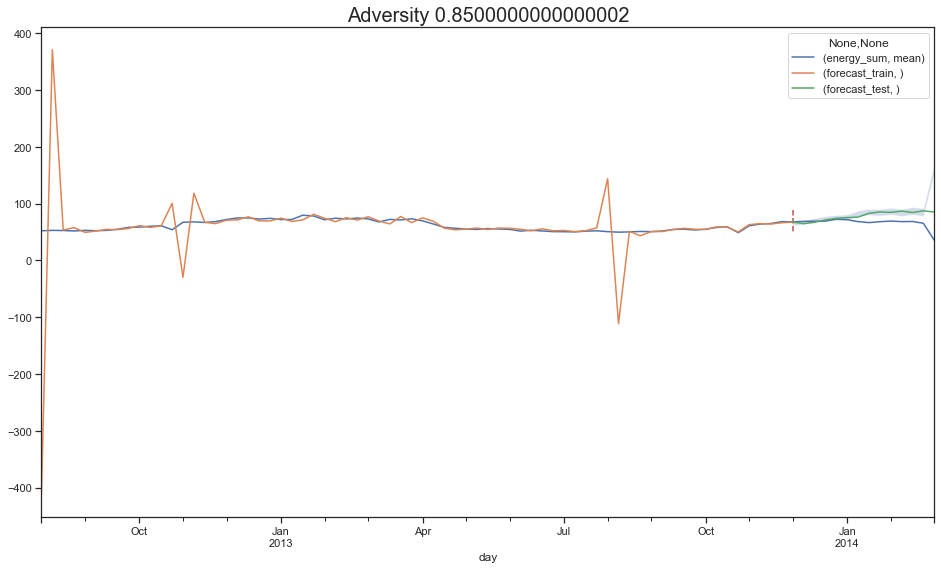

Mean Absolute Percentage Error:  0.2324981479421071


In [194]:
## Remodel, start from 2012-08

model_dict0 = defaultdict(tuple)
model_dict1 = defaultdict(tuple)
for acorn in Acorn_grouped_ls:
    print(acorn)
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].resample('W').sum().loc['2012-08':]
    exog_ls = ['temperatureMax','humidity','temperatureMin','day_length']
    target = 'energy_sum'
    # trainPer = 0.88
    model_D0, mape_D0 = train_predict_D(df, exog_ls, target, seaD=0)
    model_dict0[acorn] = model_D0, mape_D0
    
    model_D1, mape_D1 = train_predict_D(df, exog_ls, target, seaD=1)
    model_dict1[acorn] = model_D1, mape_D1

## Check exog P-value for one test (Comfortable)

Adversity
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-214.454, BIC=-200.014, Fit time=0.094 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=-264.061, BIC=-244.807, Fit time=4.291 seconds
Near non-invertible roots for order (1, 1, 0)(1, 0, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-216.362, BIC=-204.329, Fit time=0.179 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=-227.221, BIC=-210.374, Fit time=3.142 seconds
Near non-invertible roots for order (0, 1, 0)(1, 0, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0,

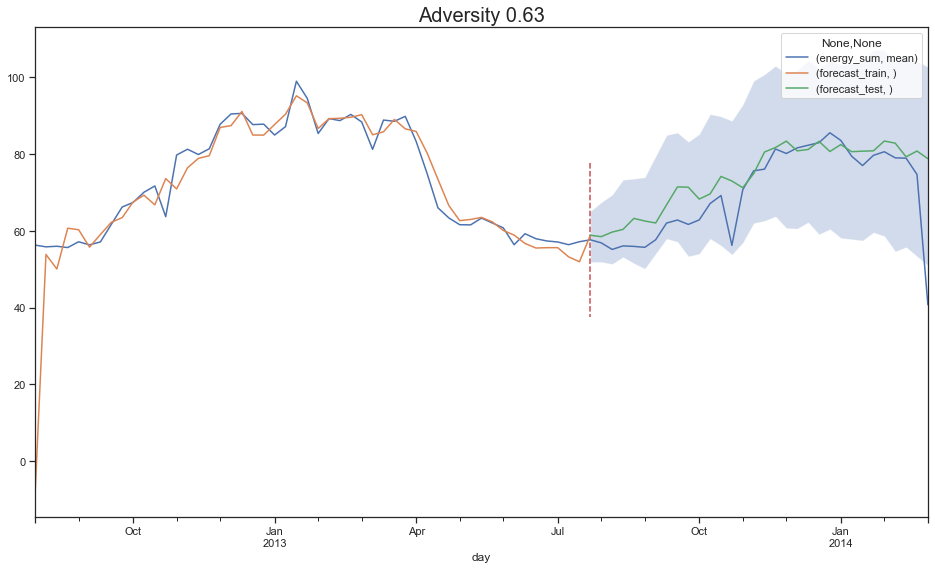

Mean Absolute Percentage Error:  0.08754578028335216
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   77
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 125.702
Date:                Tue, 10 Dec 2019   AIC                           -235.404
Time:                        05:24:28   BIC                           -216.759
Sample:                    08-05-2012   HQIC                          -227.953
                         - 01-19-2014                                         
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               0.0052      6.483      0.001      0.999     -12.701      12.712
temperatureMax_mean    -0.0004      0.001     -0.61

In [195]:
## check summary - from 2012-08
model_dict0 = defaultdict(tuple)


print(acorn)
df = acorn_energy_day[acorn_energy_day.Acorn_grouped == 'Comfortable'].resample('W').sum().loc['2012-08':]
exog_ls = ['temperatureMax','humidity','temperatureMin','day_length']
target = 'energy_sum'
# trainPer = 0.88
model_D0, mape_D0 = train_predict_D(df, exog_ls, target, seaD=0)
print(model_D0.summary())
model_dict0[acorn] = model_D0, mape_D0



Adversity
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-182.780, BIC=-169.642, Fit time=2.755 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=-181.077, BIC=-163.560, Fit time=17.925 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-183.707, BIC=-172.759, Fit time=3.663 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=-180.834, BIC=-165.506, Fit time=10.517 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-182.983, BIC=-167.655, Fit time=1.777 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=-182.299, BIC=-166.971, Fit time=3.878 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 

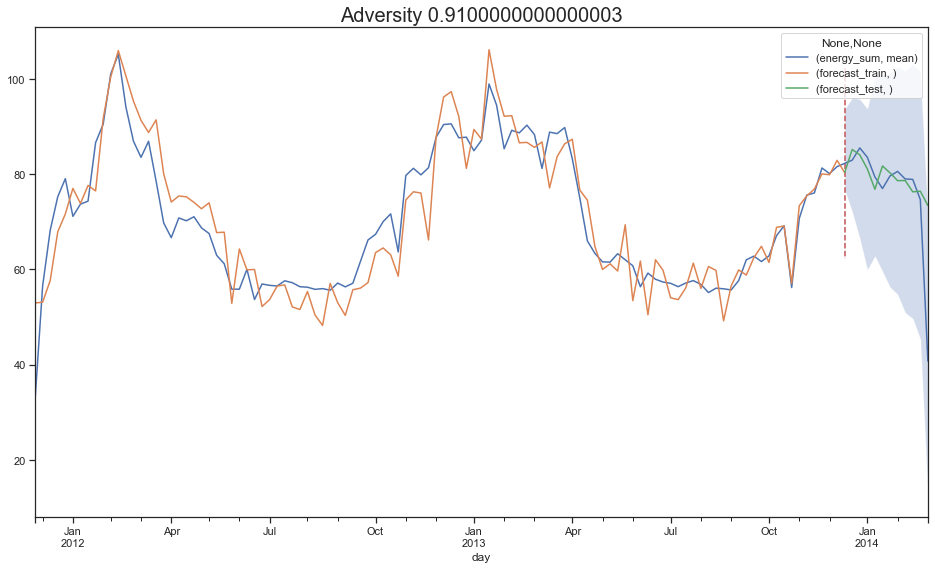

Mean Absolute Percentage Error:  0.09052880359041919
                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  110
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 52)   Log Likelihood                  81.555
Date:                            Tue, 10 Dec 2019   AIC                           -153.111
Time:                                    05:31:51   BIC                           -142.895
Sample:                                11-27-2011   HQIC                          -149.141
                                     - 12-29-2013                                         
Covariance Type:                              opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
temperatureMax_mean    -0.0013      0.001  

In [198]:
#check summary - whole data
model_dict1 = defaultdict(tuple)


print(acorn)
df = acorn_energy_day[acorn_energy_day.Acorn_grouped == 'Comfortable'].resample('W').sum()
exog_ls = ['temperatureMax','humidity','temperatureMin','day_length']
target = 'energy_sum'
# trainPer = 0.88
model_D1, mape_D1 = train_predict_D(df, exog_ls, target, seaD=1)
print(model_D1.summary())
model_dict1[acorn] = model_D1, mape_D1

## Update exog_ls

In [201]:
acorn_energy_day['TempDelta'] = acorn_energy_day['temperatureMax']-acorn_energy_day['temperatureMin']

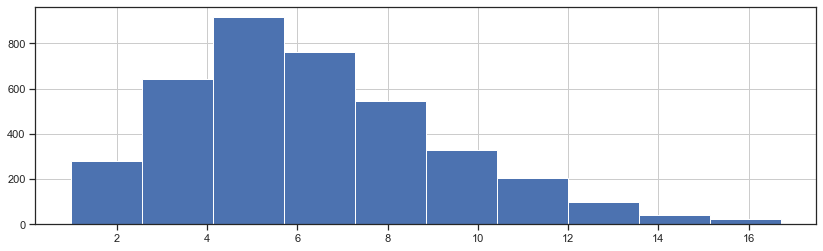

In [211]:
acorn_energy_day['TempDelta'].hist();

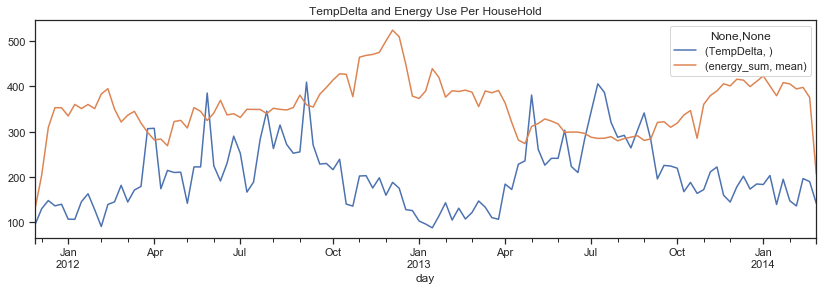

In [209]:
acorn_energy_day[['TempDelta', 'energy_sum']].resample('W').sum().plot(title = 'TempDelta and Energy Use Per HouseHold');

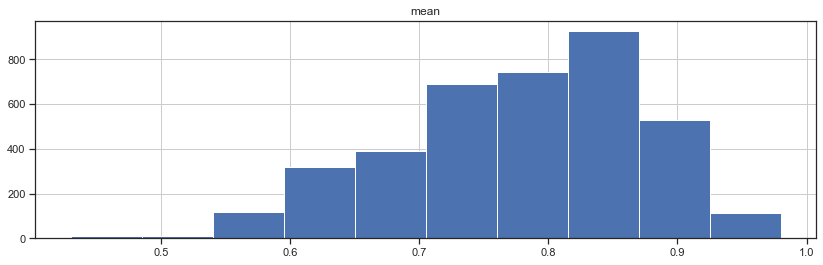

In [212]:
acorn_energy_day['humidity'].hist();

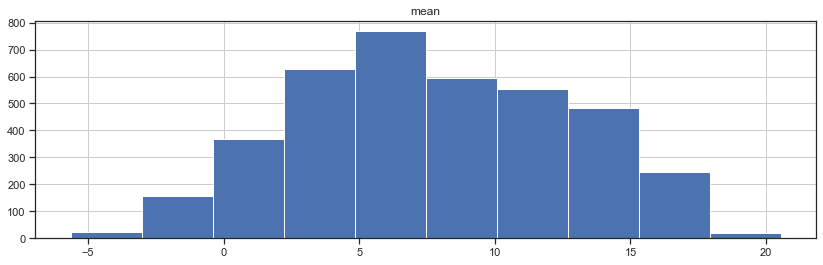

In [213]:
acorn_energy_day['temperatureMin'].hist();

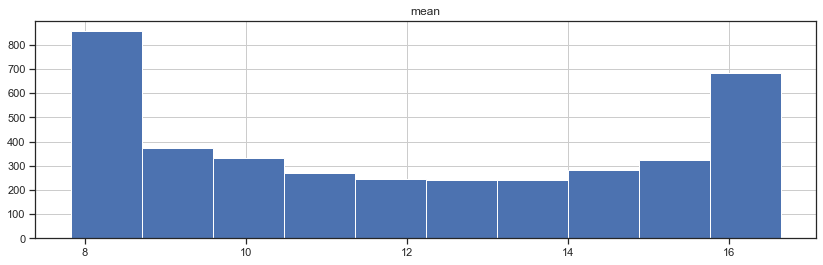

In [214]:
acorn_energy_day['day_length'].hist();

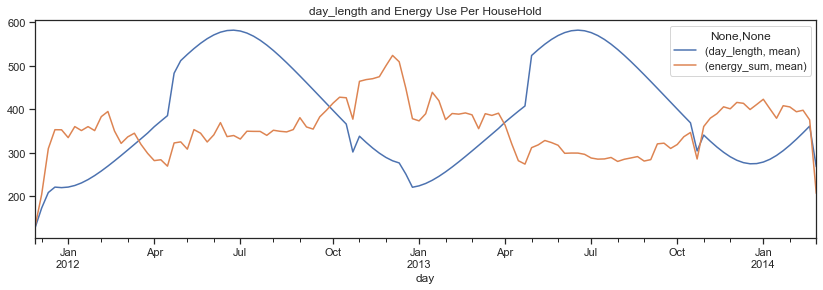

In [219]:
acorn_energy_day[['day_length', 'energy_sum']].resample('W').sum().plot(title = 'day_length and Energy Use Per HouseHold');

Adversity
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-214.454, BIC=-200.014, Fit time=0.133 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=-264.059, BIC=-244.806, Fit time=4.042 seconds
Near non-invertible roots for order (1, 1, 0)(1, 0, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-216.362, BIC=-204.329, Fit time=0.095 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=-227.221, BIC=-210.374, Fit time=2.836 seconds
Near non-invertible roots for order (0, 1, 0)(1, 0, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0,

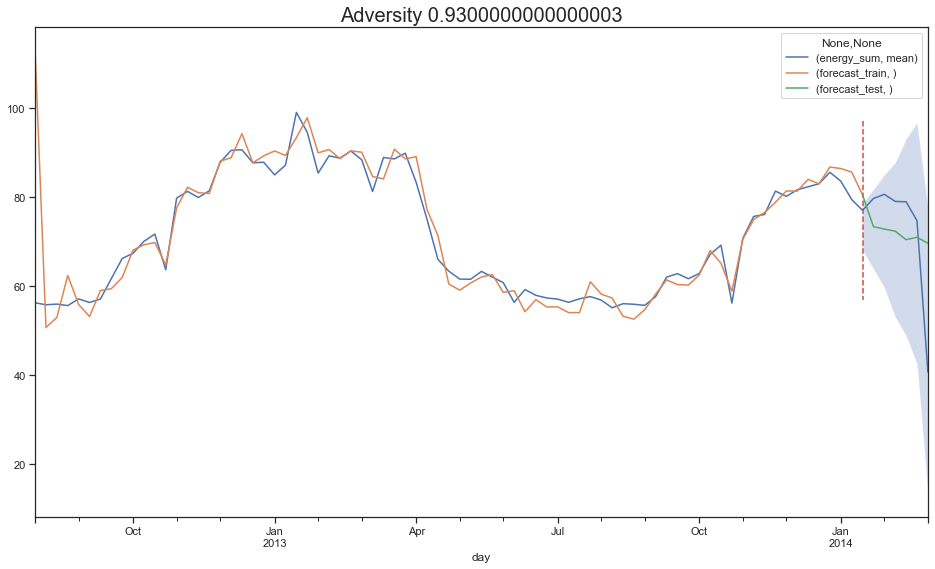

Mean Absolute Percentage Error:  0.16748324126944025
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   77
Model:               SARIMAX(4, 1, 0)   Log Likelihood                 140.010
Date:                Tue, 10 Dec 2019   AIC                           -260.021
Time:                        05:36:40   BIC                           -236.713
Sample:                    08-05-2012   HQIC                          -250.706
                         - 01-19-2014                                         
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               0.0015      0.004      0.335      0.737      -0.007       0.010
TempDelta              -0.0013      0.001     -2.55

In [203]:
#run on partial data_D0
model_dict0 = defaultdict(tuple)

print(acorn)
df = acorn_energy_day[acorn_energy_day.Acorn_grouped == 'Comfortable'].resample('W').sum().loc['2012-08':]
exog_ls = ['TempDelta','humidity','temperatureMin','day_length']
target = 'energy_sum'
# trainPer = 0.88
model_D0, mape_D0 = train_predict_D(df, exog_ls, target, seaD=0)
print(model_D0.summary())
model_dict0[acorn] = model_D0, mape_D0

Adversity
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-190.907, BIC=-174.232, Fit time=0.242 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=-210.139, BIC=-187.906, Fit time=5.450 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-21.044, BIC=-7.148, Fit time=0.165 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-220.180, BIC=-200.726, Fit time=0.310 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-216.801, BIC=-194.568, Fit time=0.420 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 52); AIC=-236.393, BIC=-214.160, Fit time=0.448 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 0, 52); 

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


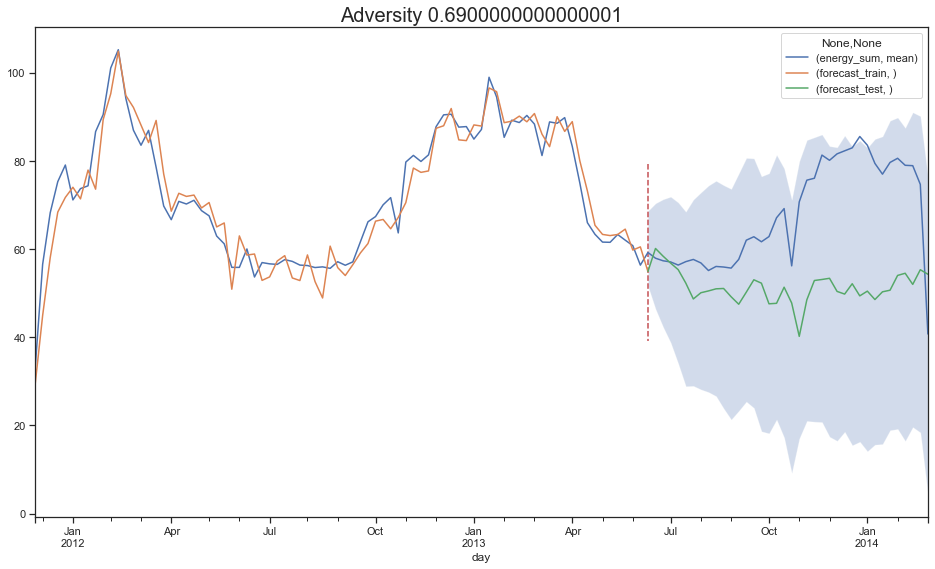

Mean Absolute Percentage Error:  0.23472699712403136
                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  110
Model:             SARIMAX(2, 0, 1)x(1, 0, 0, 52)   Log Likelihood                 132.008
Date:                            Tue, 10 Dec 2019   AIC                           -244.017
Time:                                    05:52:41   BIC                           -217.012
Sample:                                11-27-2011   HQIC                          -233.063
                                     - 12-29-2013                                         
Covariance Type:                              opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               1.0782      0.433  

In [215]:
#run on whole_D0
model_dict0 = defaultdict(tuple)
acorn = 'Comfortable'
print(acorn)
df = acorn_energy_day[acorn_energy_day.Acorn_grouped == 'Comfortable'].resample('W').sum()
exog_ls = ['TempDelta','humidity','temperatureMin','day_length']
target = 'energy_sum'
# trainPer = 0.88
model_D0, mape_D0 = train_predict_D(df, exog_ls, target, seaD=0)
print(model_D0.summary())
model_dict0[acorn] = model_D0, mape_D0

Adversity
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-182.780, BIC=-169.642, Fit time=1.607 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=-181.077, BIC=-163.560, Fit time=25.931 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-183.707, BIC=-172.759, Fit time=3.596 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=-180.834, BIC=-165.507, Fit time=11.270 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-182.994, BIC=-167.666, Fit time=2.739 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=-182.522, BIC=-167.194, Fit time=4.160 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 

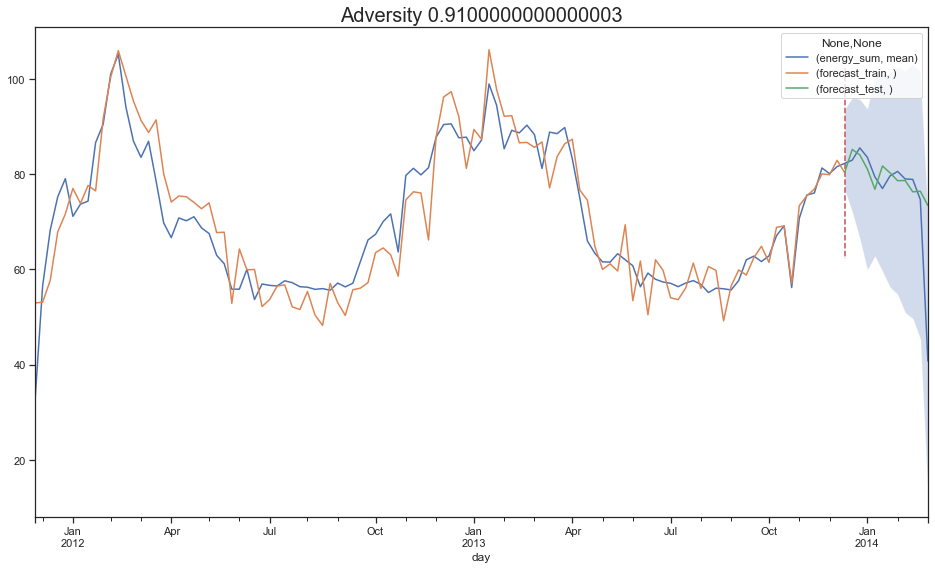

Mean Absolute Percentage Error:  0.09052856232160249
                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  110
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 52)   Log Likelihood                  81.555
Date:                            Tue, 10 Dec 2019   AIC                           -153.111
Time:                                    05:35:48   BIC                           -142.896
Sample:                                11-27-2011   HQIC                          -149.141
                                     - 12-29-2013                                         
Covariance Type:                              opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
TempDelta              -0.0013      0.001  

In [202]:
#check summary - whole data_D1
model_dict1 = defaultdict(tuple)

print(acorn)
df = acorn_energy_day[acorn_energy_day.Acorn_grouped == 'Comfortable'].resample('W').sum()
exog_ls = ['TempDelta','humidity','temperatureMin','day_length']
target = 'energy_sum'
# trainPer = 0.88
model_D1, mape_D1 = train_predict_D(df, exog_ls, target, seaD=1)
print(model_D1.summary())
model_dict1[acorn] = model_D1, mape_D1

## Playing w/Trends 

Comfortable
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-20.396, BIC=1.837, Fit time=0.088 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=-20.889, BIC=6.902, Fit time=1.648 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-20.396, BIC=1.837, Fit time=0.063 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-19.935, BIC=5.077, Fit time=0.075 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=-21.969, BIC=3.043, Fit time=1.344 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=

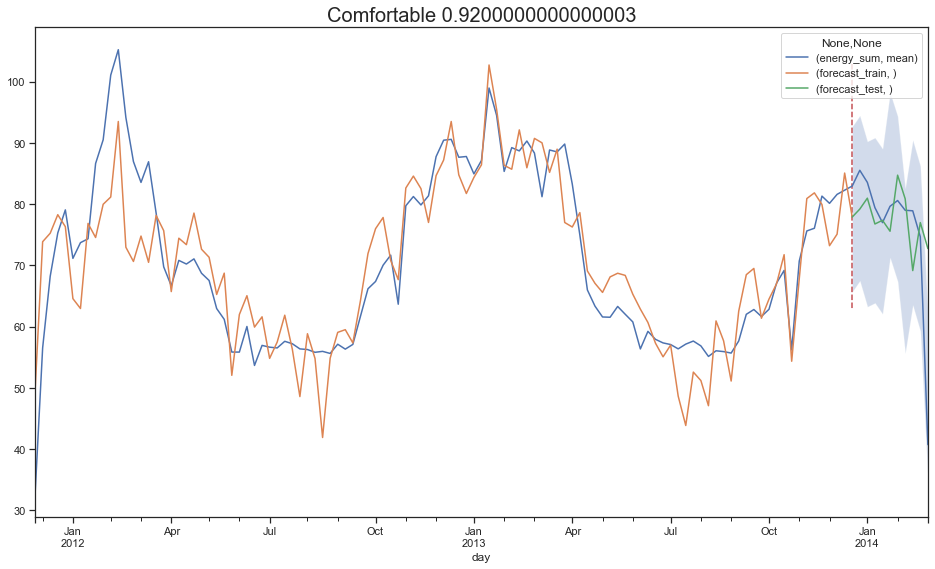

Mean Absolute Percentage Error:  0.11557974183355806
                            Statespace Model Results                            
Dep. Variable:                        y   No. Observations:                  110
Model:             SARIMAX(1, 0, 0, 52)   Log Likelihood                  20.727
Date:                  Tue, 10 Dec 2019   AIC                            -23.455
Time:                          06:03:55   BIC                              0.849
Sample:                      11-27-2011   HQIC                           -13.597
                           - 12-29-2013                                         
Covariance Type:                    opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               0.0106      0.261      0.041      0.967      -0.501       0.522
drift                  -0.0012     

In [218]:
#run on whole and play w/ trend setting
# from sklearn.preprocessing import StandardScaler

model_dict0 = defaultdict(tuple)
acorn = 'Comfortable'
print(acorn)
df = acorn_energy_day[acorn_energy_day.Acorn_grouped == 'Comfortable'].resample('W').sum()
exog_ls = ['TempDelta','humidity','temperatureMin','day_length']
target = 'energy_sum'

# sc = StandardScaler()
# sc.fit_transform(df[exog_ls])


model_D0, mape_D0 = train_predict_D_trend(df, exog_ls, target, seaD=0, trend = [1,1,1])
print(model_D0.summary())
model_dict0[acorn] = model_D0, mape_D0

Comfortable
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-22.351, BIC=-2.897, Fit time=0.076 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=-22.995, BIC=2.017, Fit time=1.494 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-22.351, BIC=-2.897, Fit time=0.056 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-22.118, BIC=0.115, Fit time=0.066 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=-24.210, BIC=-1.977, Fit time=1.153 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit ti

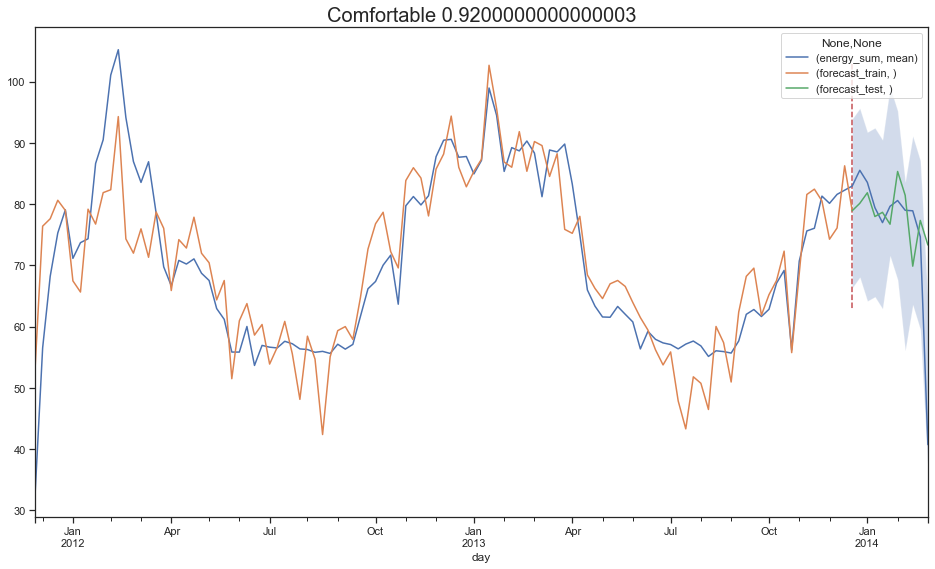

Mean Absolute Percentage Error:  0.11355087373865143
                            Statespace Model Results                            
Dep. Variable:                        y   No. Observations:                  110
Model:             SARIMAX(1, 0, 0, 52)   Log Likelihood                  20.794
Date:                  Tue, 10 Dec 2019   AIC                            -25.587
Time:                          06:12:33   BIC                             -3.983
Sample:                      11-27-2011   HQIC                           -16.825
                           - 12-29-2013                                         
Covariance Type:                    opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
drift                  -0.0008      0.003     -0.280      0.780      -0.007       0.005
trend.2              1.318e-05   2.

In [221]:
#run on whole and play w/ trend setting
# from sklearn.preprocessing import StandardScaler

model_dict0 = defaultdict(tuple)
acorn = 'Comfortable'
print(acorn)
df = acorn_energy_day[acorn_energy_day.Acorn_grouped == 'Comfortable'].resample('W').sum()
exog_ls = ['TempDelta','humidity','temperatureMin','day_length']
target = 'energy_sum'

# sc = StandardScaler()
# sc.fit_transform(df[exog_ls])


model_D0, mape_D0 = train_predict_D_trend(df, exog_ls, target, seaD=0, trend = [0,1,1])
print(model_D0.summary())
model_dict0[acorn] = model_D0, mape_D0

Comfortable
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-22.182, BIC=-5.507, Fit time=0.067 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=-23.517, BIC=-1.284, Fit time=1.343 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-22.182, BIC=-5.507, Fit time=0.050 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-22.302, BIC=-2.848, Fit time=0.059 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=-24.609, BIC=-5.155, Fit time=1.031 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit 

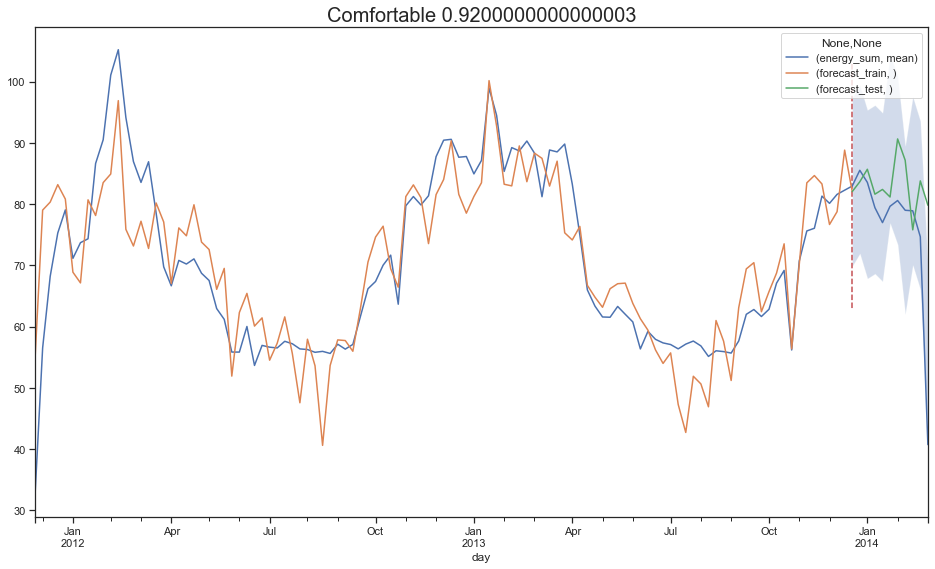

Mean Absolute Percentage Error:  0.13863793107309752
                            Statespace Model Results                            
Dep. Variable:                        y   No. Observations:                  110
Model:             SARIMAX(1, 0, 0, 52)   Log Likelihood                  20.518
Date:                  Tue, 10 Dec 2019   AIC                            -27.036
Time:                          06:17:28   BIC                             -8.133
Sample:                      11-27-2011   HQIC                           -19.369
                           - 12-29-2013                                         
Covariance Type:                    opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
trend.2              3.811e-06   5.04e-06      0.756      0.450   -6.07e-06    1.37e-05
TempDelta               0.0146     

In [222]:
#run on whole and play w/ trend setting
# from sklearn.preprocessing import StandardScaler

model_dict0 = defaultdict(tuple)
acorn = 'Comfortable'
print(acorn)
df = acorn_energy_day[acorn_energy_day.Acorn_grouped == 'Comfortable'].resample('W').sum()
exog_ls = ['TempDelta','humidity','temperatureMin','day_length']
target = 'energy_sum'

# sc = StandardScaler()
# sc.fit_transform(df[exog_ls])


model_D0, mape_D0 = train_predict_D_trend(df, exog_ls, target, seaD=0, trend = [0,0,1])
print(model_D0.summary())
model_dict0[acorn] = model_D0, mape_D0

Comfortable
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-26.321, BIC=-9.646, Fit time=0.135 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=-29.401, BIC=-7.168, Fit time=4.420 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-26.321, BIC=-9.646, Fit time=0.117 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-27.048, BIC=-7.594, Fit time=0.105 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=-29.840, BIC=-10.386, Fit time=3.011 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit

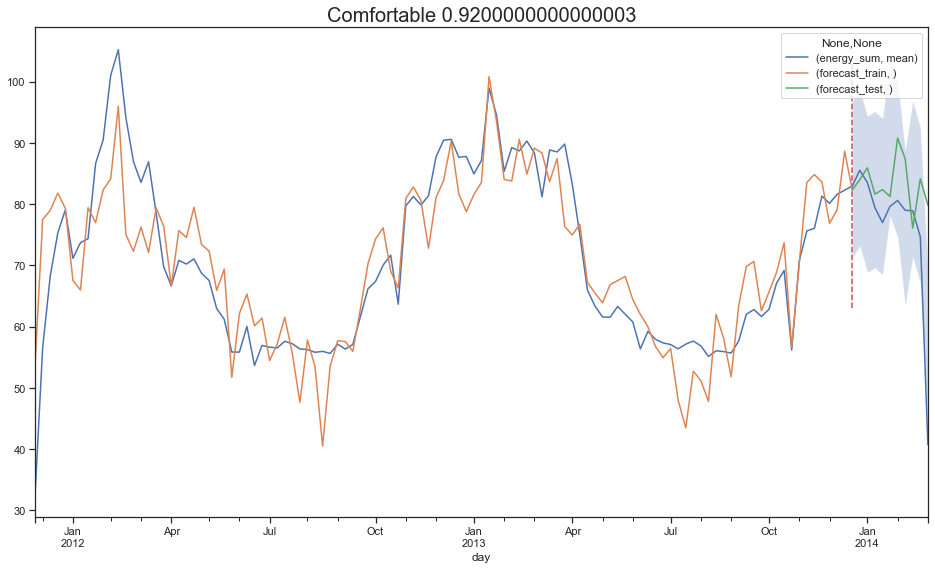

Mean Absolute Percentage Error:  0.1388855605840792
                            Statespace Model Results                            
Dep. Variable:                        y   No. Observations:                  110
Model:             SARIMAX(1, 0, 0, 52)   Log Likelihood                  22.127
Date:                  Tue, 10 Dec 2019   AIC                            -30.253
Time:                          06:18:53   BIC                            -11.350
Sample:                      11-27-2011   HQIC                           -22.586
                           - 12-29-2013                                         
Covariance Type:                    opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
drift                   0.0011      0.000      2.237      0.025       0.000       0.002
TempDelta               0.0143      

In [223]:
#run on whole and play w/ trend setting
# from sklearn.preprocessing import StandardScaler

model_dict0 = defaultdict(tuple)
acorn = 'Comfortable'
print(acorn)
df = acorn_energy_day[acorn_energy_day.Acorn_grouped == 'Comfortable'].resample('W').sum()
exog_ls = ['TempDelta','humidity','temperatureMin','day_length']
target = 'energy_sum'

# sc = StandardScaler()
# sc.fit_transform(df[exog_ls])


model_D0, mape_D0 = train_predict_D_trend(df, exog_ls, target, seaD=0, trend = 't')
print(model_D0.summary())
model_dict0[acorn] = model_D0, mape_D0

Comfortable
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-182.221, BIC=-169.083, Fit time=1.202 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=-180.295, BIC=-162.778, Fit time=6.638 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-182.221, BIC=-169.083, Fit time=1.178 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=-180.272, BIC=-164.944, Fit time=6.684 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-182.226, BIC=-166.898, Fit time=1.806 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan

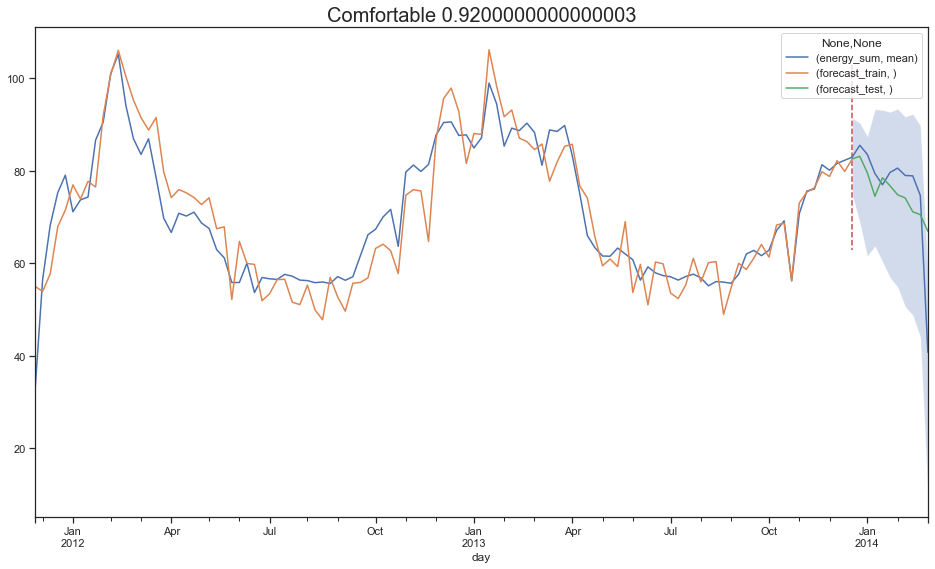

Mean Absolute Percentage Error:  0.10254402561083147
                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  110
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 52)   Log Likelihood                  83.087
Date:                            Tue, 10 Dec 2019   AIC                           -152.175
Time:                                    06:34:08   BIC                           -137.874
Sample:                                11-27-2011   HQIC                          -146.617
                                     - 12-29-2013                                         
Covariance Type:                              opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
drift               -7.797e-05      0.000  

In [224]:
#run on whole and play w/ trend setting
# from sklearn.preprocessing import StandardScaler

model_dict0 = defaultdict(tuple)
acorn = 'Comfortable'
print(acorn)
df = acorn_energy_day[acorn_energy_day.Acorn_grouped == 'Comfortable'].resample('W').sum()
exog_ls = ['TempDelta','humidity','temperatureMin','day_length']
target = 'energy_sum'

# sc = StandardScaler()
# sc.fit_transform(df[exog_ls])


model_D0, mape_D0 = train_predict_D_trend(df, exog_ls, target, seaD=1, trend = 't')
print(model_D0.summary())
model_dict0[acorn] = model_D0, mape_D0

## Final Run

Affluent
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-295.009, BIC=-278.385, Fit time=0.092 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=-299.287, BIC=-277.122, Fit time=7.535 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-295.009, BIC=-278.385, Fit time=0.082 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-296.447, BIC=-277.052, Fit time=0.303 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=-297.752, BIC=-278.357, Fit time=4.424 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=-303.855, BIC=-278.919, Fit time=10.650 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 52

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


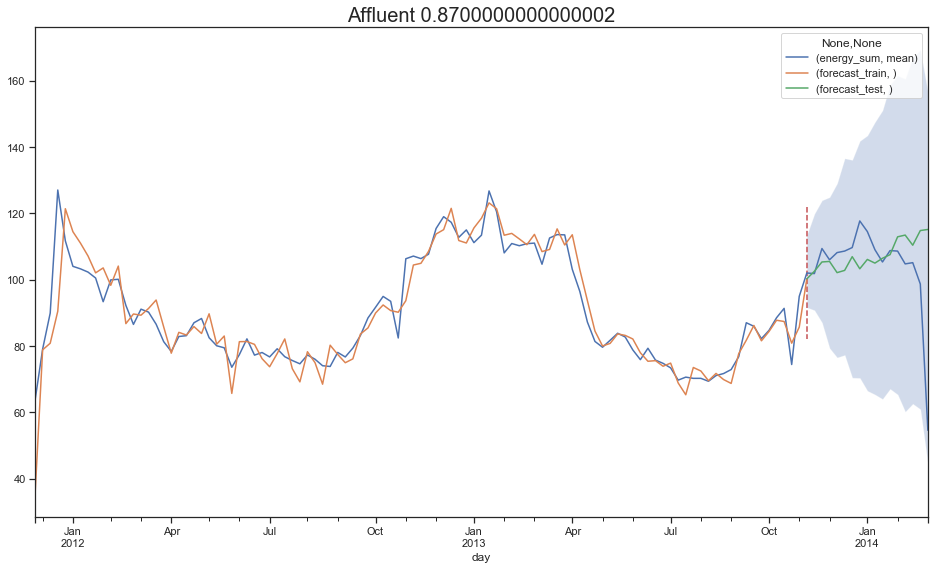

Mean Absolute Percentage Error:  0.11176741320515289
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-153.400, BIC=-140.262, Fit time=3.590 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=-150.560, BIC=-133.042, Fit time=15.421 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-153.400, BIC=-140.262, Fit time=4.290 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=-151.456, BIC=-136.128, Fit time=23.462 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-152.526, BIC=-137.199, Fit time=3.957 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=-154.367, BIC=-139.040, Fit time=6.195 seconds
Fit ARIMA

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


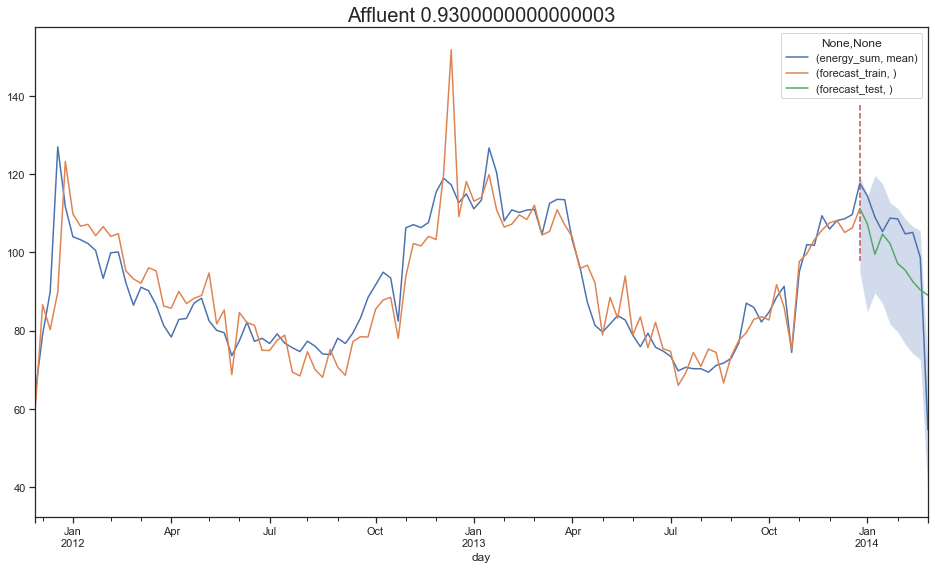

Mean Absolute Percentage Error:  0.1298504321060193
Comfortable
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-26.321, BIC=-9.646, Fit time=0.251 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=-29.401, BIC=-7.168, Fit time=8.283 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-26.321, BIC=-9.646, Fit time=0.236 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-27.048, BIC=-7.594, Fit time=0.206 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=-29.840, BIC=-10.386, Fit time=5.890 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0)

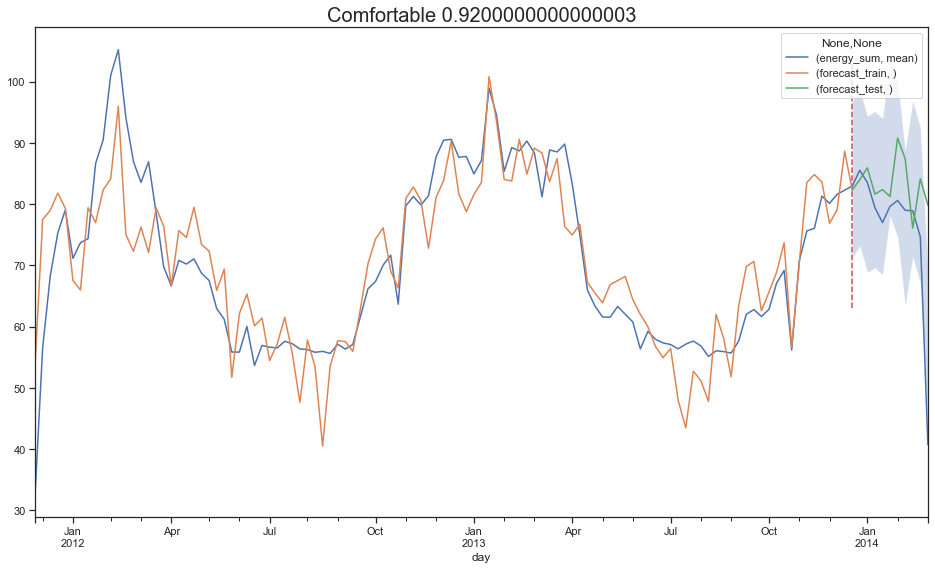

Mean Absolute Percentage Error:  0.1388855605840792
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-182.221, BIC=-169.083, Fit time=2.342 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=-180.295, BIC=-162.778, Fit time=16.669 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-182.221, BIC=-169.083, Fit time=2.406 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=-180.272, BIC=-164.944, Fit time=14.541 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-182.226, BIC=-166.898, Fit time=2.921 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1

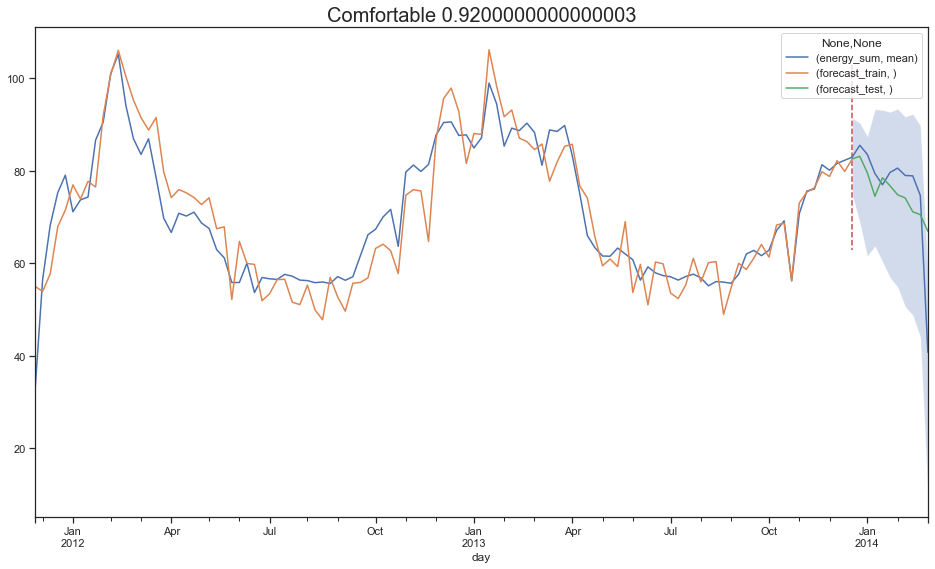

Mean Absolute Percentage Error:  0.10254402561083147
Adversity
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-16.677, BIC=-0.003, Fit time=0.265 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=-21.729, BIC=0.504, Fit time=4.074 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-16.677, BIC=-0.003, Fit time=0.262 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-22.212, BIC=-2.758, Fit time=0.508 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-196.178, BIC=-173.945, Fit time=0.723 seconds
Near non-invertible roots for order (2, 0, 0)(0, 0, 0, 52); setting score to inf (at least one inverse root too close to t

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


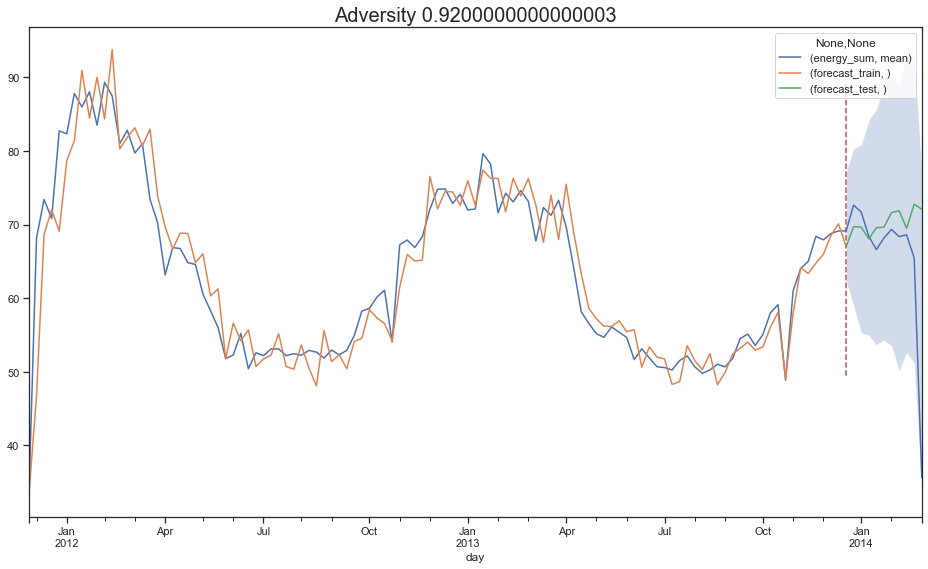

Mean Absolute Percentage Error:  0.1273374014610396
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-184.265, BIC=-171.127, Fit time=2.244 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=-186.435, BIC=-168.918, Fit time=18.850 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-184.265, BIC=-171.127, Fit time=2.489 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-188.399, BIC=-173.071, Fit time=4.197 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=-187.406, BIC=-169.889, Fit time=8.720 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=-187.104, BIC=-169.587, Fit time=6.782 seconds
Fit ARIMA: 

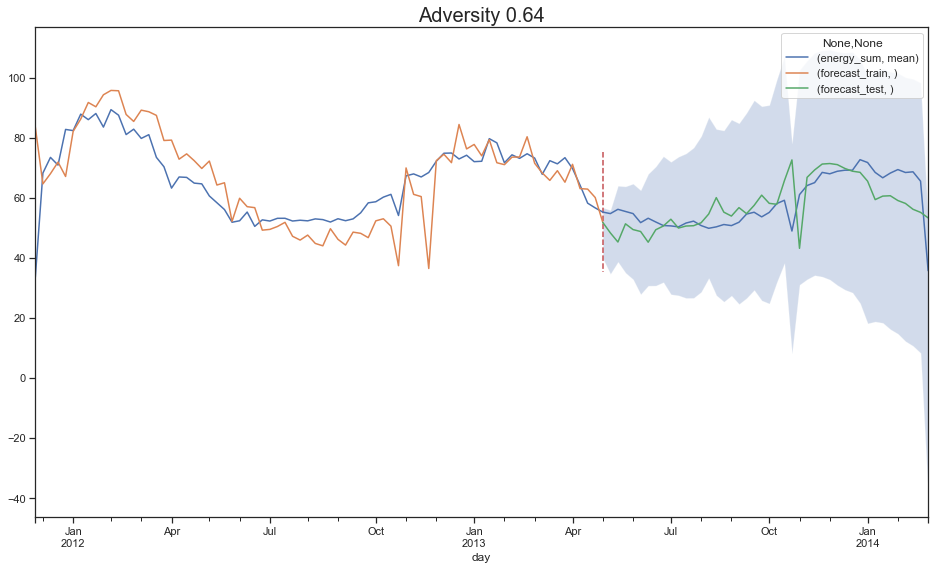

Mean Absolute Percentage Error:  0.10078555061506095


In [226]:
## Remodel, start from 2011-11

model_dict0 = defaultdict(tuple)
model_dict1 = defaultdict(tuple)
for acorn in Acorn_grouped_ls:
    print(acorn)
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].resample('W').sum().loc['2011-11':,]
    exog_ls = ['TempDelta','humidity','temperatureMin','day_length']
    target = 'energy_sum'
 
    model_D0, mape_D0 = train_predict_D_trend(df, exog_ls, target, seaD=0,trend='t')
    model_dict0[acorn] = model_D0, mape_D0
    print(model_D0.summary())
    
    model_D1, mape_D1 = train_predict_D_trend(df, exog_ls, target, seaD=1,trend='t')
    model_dict1[acorn] = model_D1, mape_D1
    print(model_D1.summary())

Affluent
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-236.837, BIC=-222.042, Fit time=0.542 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=-270.514, BIC=-250.787, Fit time=4.126 seconds
Near non-invertible roots for order (1, 1, 0)(1, 0, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-236.837, BIC=-222.042, Fit time=0.484 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=-252.348, BIC=-235.087, Fit time=2.958 seconds
Near non-invertible roots for order (0, 1, 0)(1, 0, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


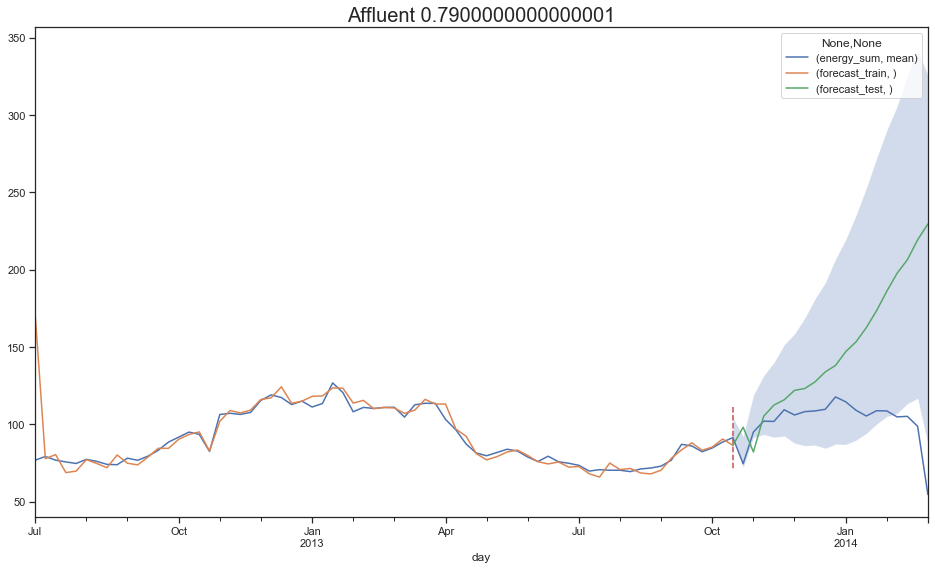

Mean Absolute Percentage Error:  0.5186251899501505
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   81
Model:               SARIMAX(3, 1, 0)   Log Likelihood                 151.133
Date:                Tue, 10 Dec 2019   AIC                           -284.266
Time:                        09:56:48   BIC                           -262.828
Sample:                    07-01-2012   HQIC                          -275.671
                         - 01-12-2014                                         
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
drift                7.269e-06      0.000      0.070      0.945      -0.000       0.000
TempDelta              -0.0012      0.000     -2.837

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/statespace/mlemodel.py:2877: RuntimeWarning: invalid value encountered in sqrt
  se_mean = np.sqrt(self.var_pred_mean)
/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/statespace/mlemodel.py:2877: RuntimeWarning: invalid value encountered in sqrt
  se_mean = np.sqrt(self.var_pred_mean)


/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


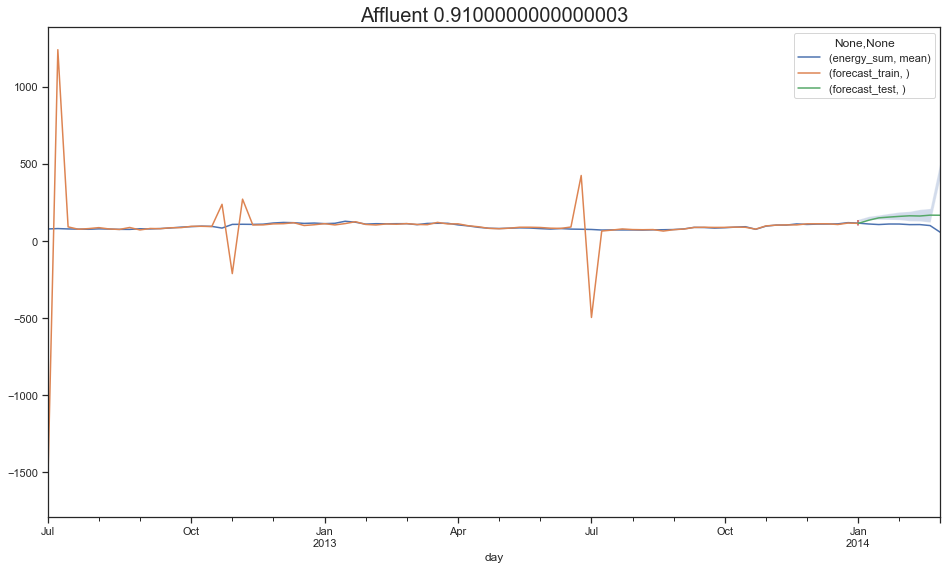

Mean Absolute Percentage Error:  0.5903455760776913
                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   81
Model:             SARIMAX(2, 2, 0)x(0, 1, 0, 52)   Log Likelihood                  50.052
Date:                            Tue, 10 Dec 2019   AIC                            -84.104
Time:                                    09:58:30   BIC                            -73.738
Sample:                                07-01-2012   HQIC                           -81.022
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
drift                8.206e-06      0.000   

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp
/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


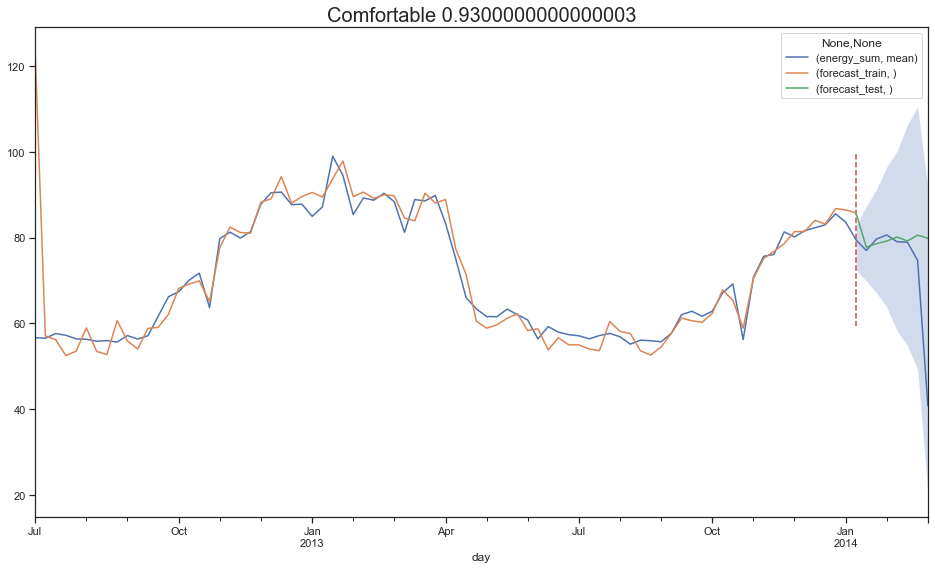

Mean Absolute Percentage Error:  0.14701351767510598
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   81
Model:               SARIMAX(3, 1, 1)   Log Likelihood                 152.318
Date:                Tue, 10 Dec 2019   AIC                           -284.635
Time:                        09:58:59   BIC                           -260.815
Sample:                    07-01-2012   HQIC                          -275.085
                         - 01-12-2014                                         
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
drift               -6.434e-06      0.000     -0.053      0.958      -0.000       0.000
TempDelta              -0.0014      0.000     -3.20

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/statespace/mlemodel.py:2877: RuntimeWarning: invalid value encountered in sqrt
  se_mean = np.sqrt(self.var_pred_mean)
/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


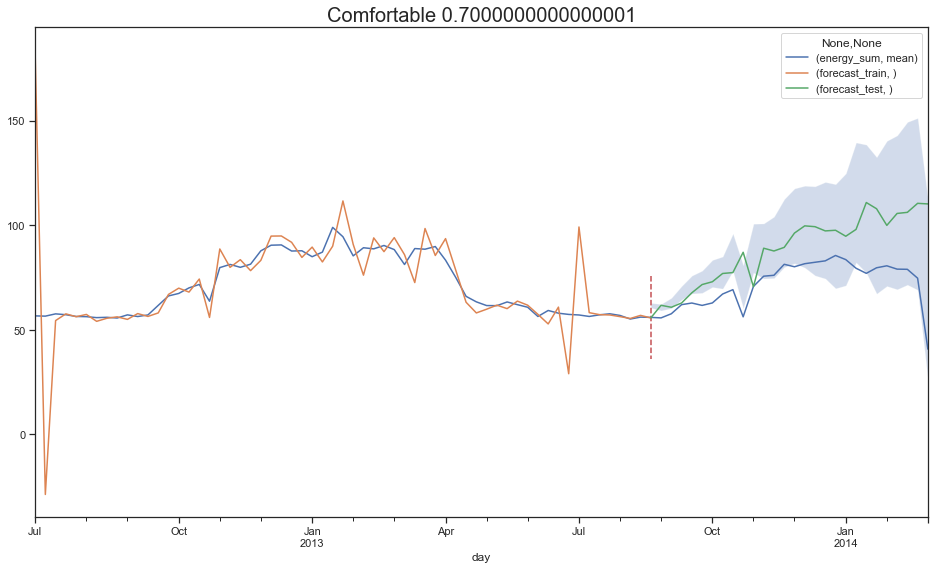

Mean Absolute Percentage Error:  0.2512855641149967
                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   81
Model:             SARIMAX(2, 2, 0)x(0, 1, 0, 52)   Log Likelihood                  53.512
Date:                            Tue, 10 Dec 2019   AIC                            -91.024
Time:                                    10:00:23   BIC                            -80.658
Sample:                                07-01-2012   HQIC                           -87.942
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
drift                1.883e-05      0.000   

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


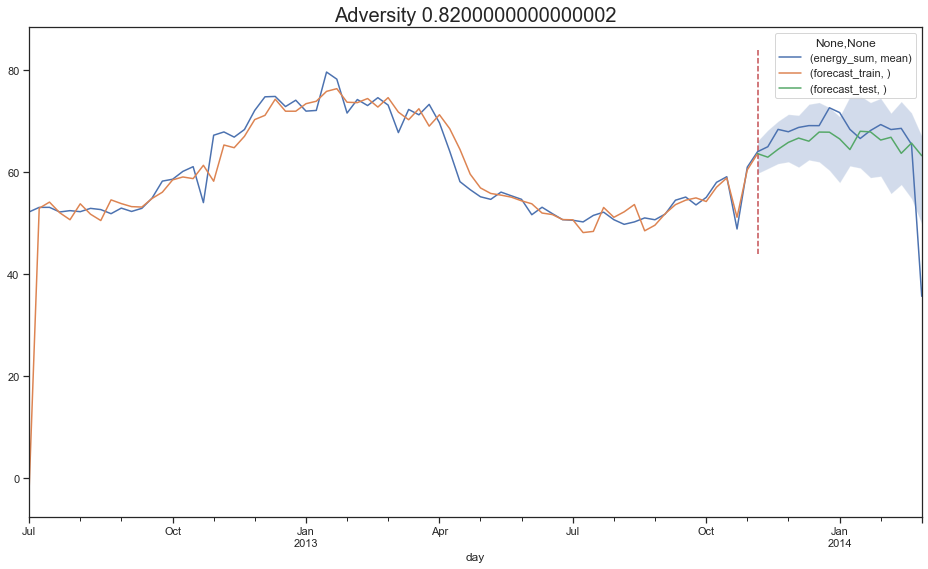

Mean Absolute Percentage Error:  0.07957307984611343
                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   81
Model:             SARIMAX(2, 1, 0)x(1, 0, 0, 52)   Log Likelihood                 150.090
Date:                            Tue, 10 Dec 2019   AIC                           -282.179
Time:                                    10:02:25   BIC                           -260.741
Sample:                                07-01-2012   HQIC                          -273.584
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
drift                1.776e-05   9.46e-05  

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/statespace/mlemodel.py:2877: RuntimeWarning: invalid value encountered in sqrt
  se_mean = np.sqrt(self.var_pred_mean)


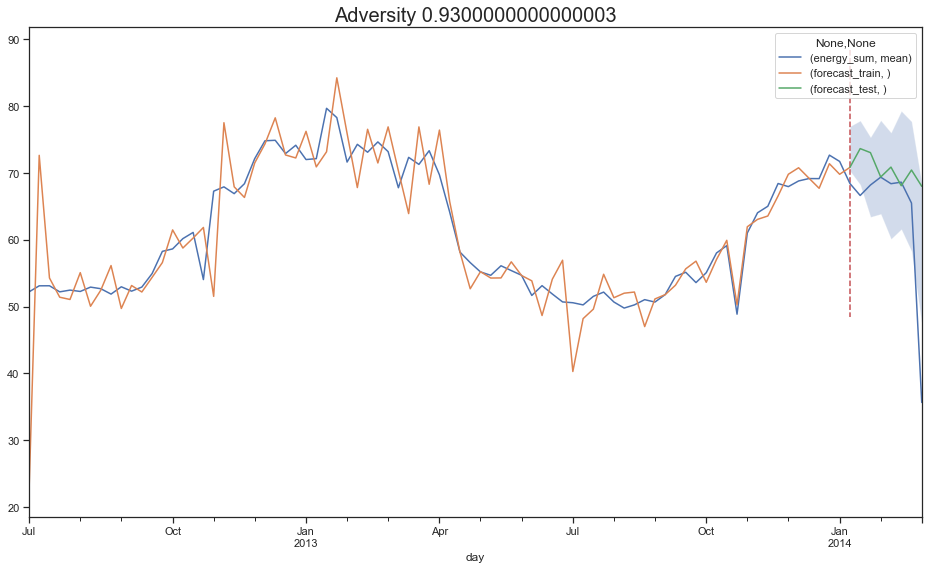

Mean Absolute Percentage Error:  0.15465855853846927
                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   81
Model:             SARIMAX(0, 2, 1)x(0, 1, 0, 52)   Log Likelihood                  55.954
Date:                            Tue, 10 Dec 2019   AIC                            -97.908
Time:                                    10:03:45   BIC                            -88.838
Sample:                                07-01-2012   HQIC                           -95.211
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
drift               -6.316e-06   4.31e-05  

In [227]:
## Remodel, start from 2012-07

model_dict0 = defaultdict(tuple)
model_dict1 = defaultdict(tuple)
for acorn in Acorn_grouped_ls:
    print(acorn)
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].resample('W').sum().loc['2012-07':,]
    exog_ls = ['TempDelta','humidity','temperatureMin','day_length']
    target = 'energy_sum'
 
    model_D0, mape_D0 = train_predict_D_trend(df, exog_ls, target, seaD=0,trend='t')
    model_dict0[acorn] = model_D0, mape_D0
    print(model_D0.summary())
    
    model_D1, mape_D1 = train_predict_D_trend(df, exog_ls, target, seaD=1,trend='t')
    model_dict1[acorn] = model_D1, mape_D1
    print(model_D1.summary())

## FINAL Weekly model
__Conclusion__: No trends, just fit half month prior, heavily depends on weather patter
>__Affluent:__ In general doesnt flacuate much, very predictable, weekly relation can track back 2 weeks prior  
>__Comfortabe:__ pattern (moving average) track back to 1 week prior, day_length contribute  
>__Adversity:__ Just depends on weather pattern, dont even care about annual seasonality, work better with shorter time peroid 

### Affluent

Affluent
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 52); AIC=-126.734, BIC=-117.627, Fit time=0.101 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 52); AIC=-145.940, BIC=-132.280, Fit time=1.106 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 52); AIC=-126.734, BIC=-117.627, Fit time=0.075 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 52); AIC=-147.797, BIC=-136.413, Fit time=0.082 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 0) seasonal_order=(0, 0, 0, 52); AIC=-155.231, BIC=-141.571, Fit time=0.135 seconds
Fit ARIMA: order=(2, 2, 0) seasonal_order=(1, 0, 0, 52); AIC=-157.734, BIC=-141.798, Fit time=1.853 seconds
Fit ARIMA: order=(2, 2, 0) seasonal_order=(2, 0, 0, 52)

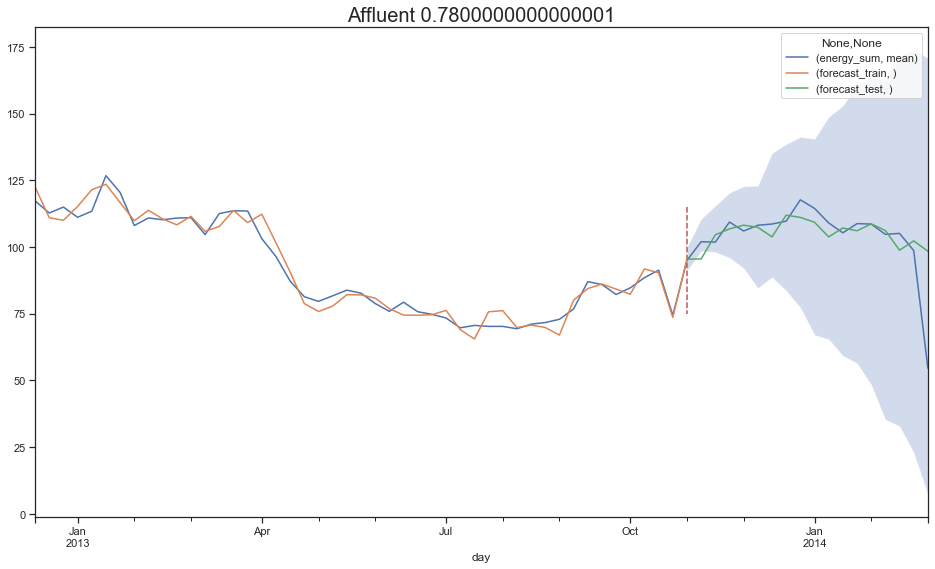

Mean Absolute Percentage Error:  0.07319536154194428
                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   68
Model:             SARIMAX(2, 2, 0)x(1, 0, 0, 52)   Log Likelihood                 106.359
Date:                            Tue, 10 Dec 2019   AIC                           -198.719
Time:                                    12:16:14   BIC                           -183.391
Sample:                                10-07-2012   HQIC                          -192.662
                                     - 01-19-2014                                         
Covariance Type:                              opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
drift               -4.972e-05   8.87e-05  

In [285]:
#Affluent
Acorn_grouped_ls = ['Affluent']
model_dict0 = defaultdict(tuple)
model_dict1 = defaultdict(tuple)
data_dict0 = defaultdict(list)
for acorn in Acorn_grouped_ls:
    print(acorn)
#     df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].loc['2013-12':'2014-02-24',]
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].resample('W').sum().loc['2012-10':,]
#     exog_ls = ['TempDelta','humidity','temperatureMin','day_length']
    exog_ls = ['humidity','temperatureMin']
    target = 'energy_sum'


    model_D0, mape_D0, yhat_D0= train_predict_D_trend_m(df, target, seaD=0, trend='t', m=52, exog_ls = exog_ls)
    model_dict0[acorn] = model_D0, mape_D0
    data_dict0[acorn]=yhat_D1
    print(model_D0.summary())

In [286]:
pickleFile(data_dict0, './Pickle/Weekly_aff_data.pickle')
pickleFile(model_dict0, './Pickle/Weekly_aff_model.pickle')

File is picked at below path: 
 ./Pickle/Weekly_aff_data.pickle
File is picked at below path: 
 ./Pickle/Weekly_aff_model.pickle


### Comfortable

Comfortable
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 52); AIC=-236.840, BIC=-225.456, Fit time=0.059 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 52); AIC=-251.588, BIC=-235.652, Fit time=1.694 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 52); AIC=-236.840, BIC=-225.456, Fit time=0.042 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 52); AIC=-248.017, BIC=-234.357, Fit time=0.107 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(2, 0, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(2, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 0, 52); AIC=-241.425, BIC=-

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


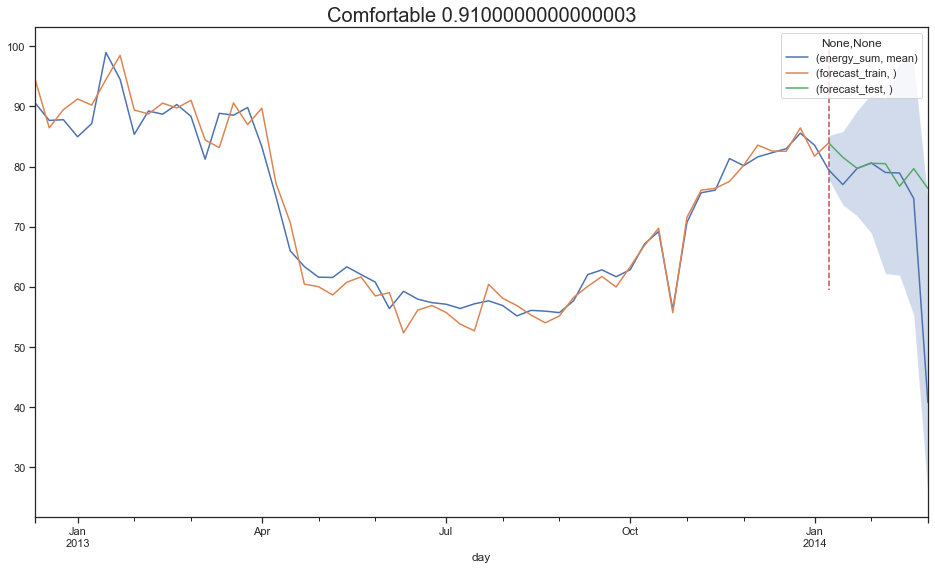

Mean Absolute Percentage Error:  0.13802778917329245
                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   68
Model:             SARIMAX(0, 2, 1)x(1, 0, 0, 52)   Log Likelihood                 126.589
Date:                            Tue, 10 Dec 2019   AIC                           -239.177
Time:                                    13:09:43   BIC                           -223.850
Sample:                                10-07-2012   HQIC                          -233.121
                                     - 01-19-2014                                         
Covariance Type:                              opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
drift               -2.562e-05    5.6e-05  

In [296]:
#Comfortable
Acorn_grouped_ls = ['Comfortable']
model_dict0 = defaultdict(tuple)
model_dict1 = defaultdict(tuple)
data_dict0 = defaultdict(list)
for acorn in Acorn_grouped_ls:
    print(acorn)
#     df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].loc['2013-12':'2014-02-24',]
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].resample('W').sum().loc['2012-10':,]
#     exog_ls = ['TempDelta','humidity','temperatureMin','day_length']
    exog_ls = ['humidity','temperatureMin','day_length',]
    target = 'energy_sum'


    model_D0, mape_D0, yhat_D0= train_predict_D_trend_m(df, target, seaD=0, trend='t', m=52, exog_ls = exog_ls)
    model_dict0[acorn] = model_D0, mape_D0
    data_dict0[acorn]=yhat_D1
    print(model_D0.summary())

In [290]:
pickleFile(data_dict0, './Pickle/Weekly_comf_data.pickle')
pickleFile(model_dict0, './Pickle/Weekly_comf_model.pickle')

File is picked at below path: 
 ./Pickle/Weekly_comf_data.pickle
File is picked at below path: 
 ./Pickle/Weekly_comf_model.pickle


## Adversity

Adversity
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-146.301, BIC=-137.604, Fit time=0.059 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=-144.203, BIC=-131.157, Fit time=1.784 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-146.301, BIC=-137.604, Fit time=0.043 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=-146.035, BIC=-135.163, Fit time=1.240 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=-144.678, BIC=-133.806, Fit time=0.076 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 52); AIC=-144.845, BIC=-133.973, Fit time=0.057 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 52

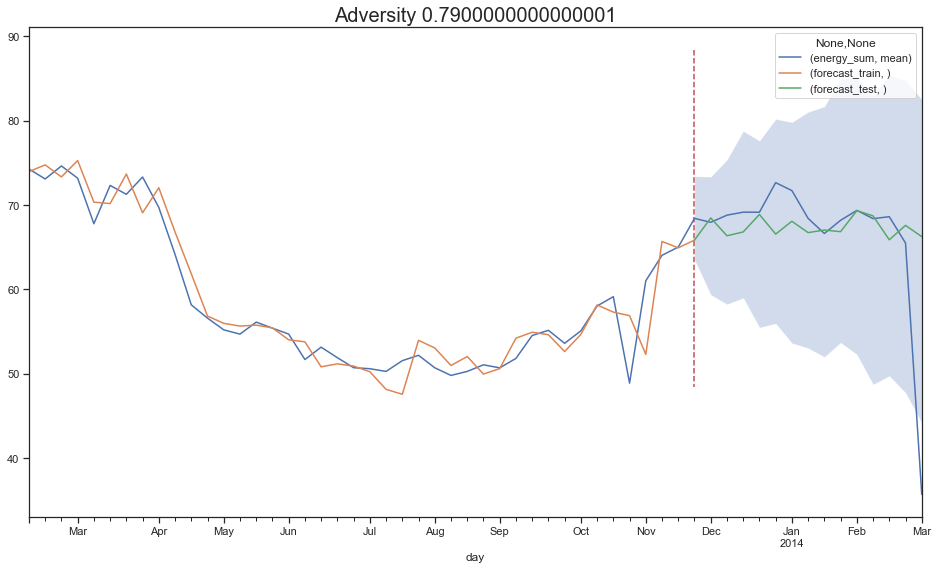

Mean Absolute Percentage Error:  0.08252437318684315
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   61
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 106.046
Date:                Tue, 10 Dec 2019   AIC                           -204.091
Time:                        13:22:18   BIC                           -195.714
Sample:                    12-02-2012   HQIC                          -200.815
                         - 01-26-2014                                         
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
drift                8.622e-06      0.000      0.060      0.952      -0.000       0.000
humidity_mean           0.0481      0.012      3.94

In [305]:
#Adversity
Acorn_grouped_ls = ['Adversity']
model_dict0 = defaultdict(tuple)
model_dict1 = defaultdict(tuple)
data_dict0 = defaultdict(list)
for acorn in Acorn_grouped_ls:
    print(acorn)
#     df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].loc['2013-12':'2014-02-24',]
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].resample('W').sum().loc['2012-12':,]
#     exog_ls = ['TempDelta','humidity','temperatureMin','day_length']
    exog_ls = ['humidity','temperatureMin']
    target = 'energy_sum'


    model_D0, mape_D0, yhat_D0= train_predict_D_trend_m(df, target, seaD=0, trend='t', m=52, exog_ls = exog_ls)
    model_dict0[acorn] = model_D0, mape_D0
    data_dict0[acorn]=yhat_D1
    print(model_D0.summary())

In [306]:
pickleFile(data_dict0, './Pickle/Weekly_adv_data.pickle')
pickleFile(model_dict0, './Pickle/Weekly_adv_model.pickle')

File is picked at below path: 
 ./Pickle/Weekly_adv_data.pickle
File is picked at below path: 
 ./Pickle/Weekly_adv_model.pickle


## Daily


 Affluent
ADF:  -2.747764657165027
p-value: 0.06613126766108983
trend variance: mean    0.647838
dtype: float64


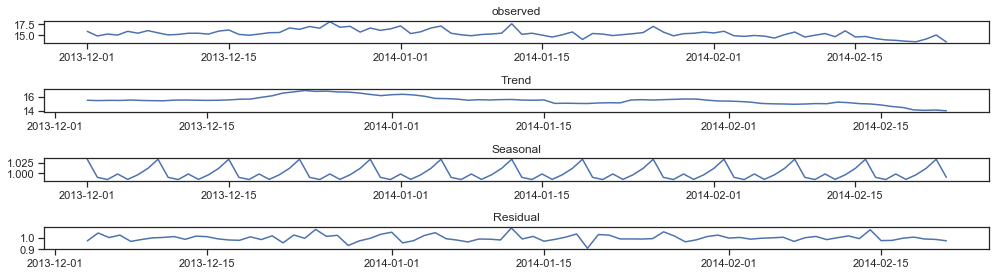


 Comfortable
ADF:  -0.2379327872368432
p-value: 0.9338464888706862
trend variance: mean    0.661553
dtype: float64


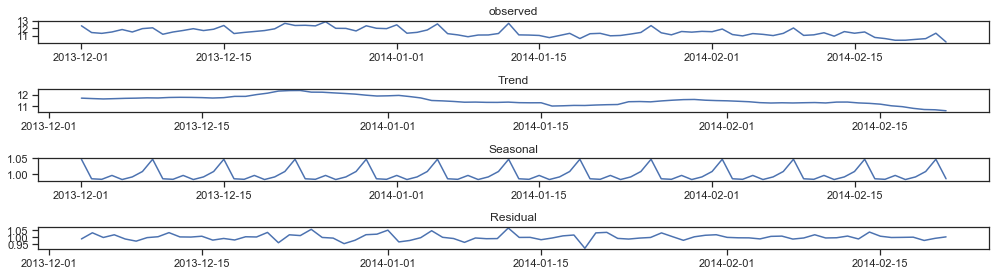


 Adversity
ADF:  -1.1669557552609124
p-value: 0.6876465993169707
trend variance: mean    0.559037
dtype: float64


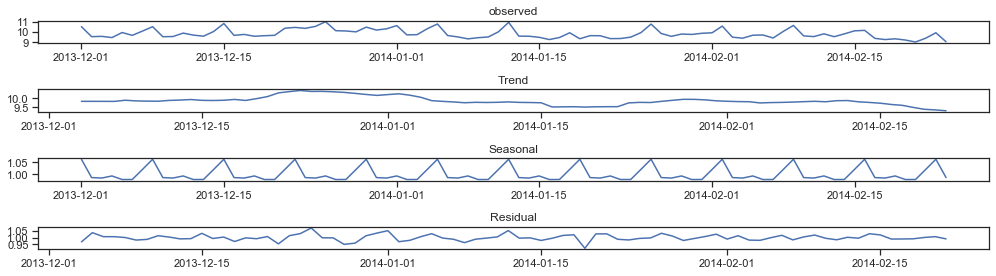

In [386]:
#Daily Decompose
for acorn in Acorn_grouped_ls:
    
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].loc['2013-12':'2014-02-24',].energy_sum
    print('\n',acorn)
    AdfTest(df)
    decompose(df, acorn)

Affluent
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 7); AIC=-234.809, BIC=-220.083, Fit time=0.089 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 7); AIC=-267.408, BIC=-247.774, Fit time=0.451 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 7); AIC=-283.717, BIC=-264.082, Fit time=0.437 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 7); AIC=-234.809, BIC=-220.083, Fit time=0.069 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 0, 7); AIC=-237.405, BIC=-220.224, Fit time=0.094 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 1, 7); AIC=-278.610, BIC=-256.521, Fit time=0.324 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 0, 7); AIC=-259.082, BIC=-239.448, Fit time=0.338 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 1, 7); AIC=-263.829, BIC=-246.648, Fit time=0.228 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 7); AIC=-270.333, BIC=-248.244, Fit time=0.147 seconds
Fit ARIMA: order=(0, 0, 2) s

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


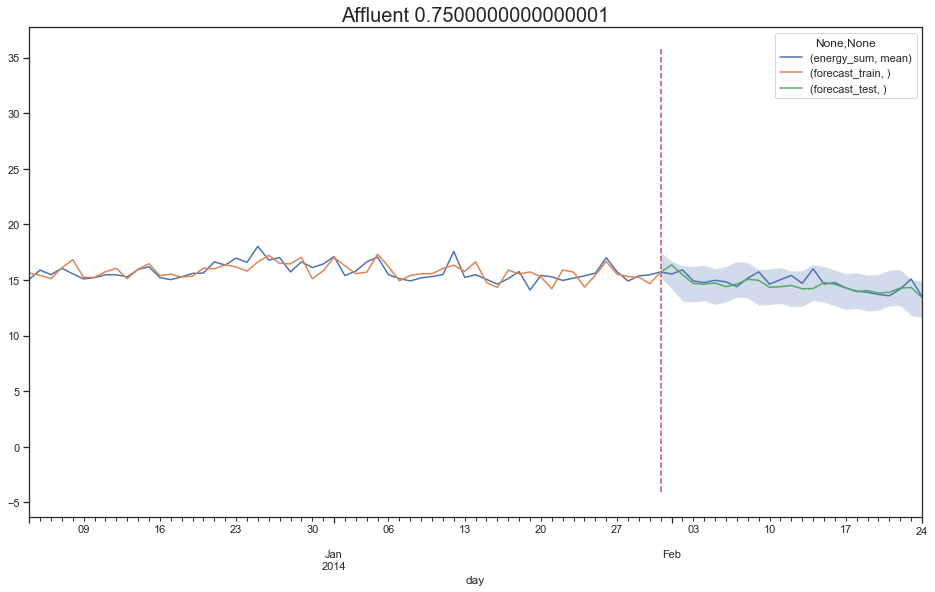

Mean Absolute Percentage Error:  0.024704475457671425
                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                   86
Model:             SARIMAX(0, 0, 2)x(0, 1, 1, 7)   Log Likelihood                 138.141
Date:                           Tue, 10 Dec 2019   AIC                           -258.282
Time:                                   11:02:43   BIC                           -236.957
Sample:                               11-24-2013   HQIC                          -249.738
                                    - 02-17-2014                                         
Covariance Type:                             opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
drift                3.756e-05      0.000      0.2

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


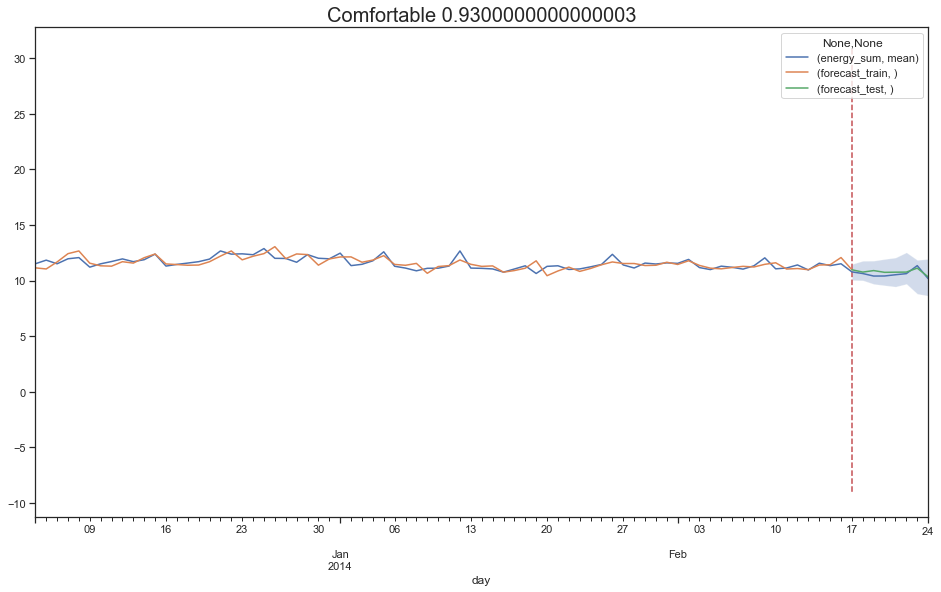

Mean Absolute Percentage Error:  0.022437003536055253
                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                   86
Model:             SARIMAX(1, 1, 0)x(0, 1, 1, 7)   Log Likelihood                 152.425
Date:                           Tue, 10 Dec 2019   AIC                           -288.850
Time:                                   11:02:56   BIC                           -269.997
Sample:                               11-24-2013   HQIC                          -281.303
                                    - 02-17-2014                                         
Covariance Type:                             opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
drift               -9.213e-06   6.31e-05     -0.1

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


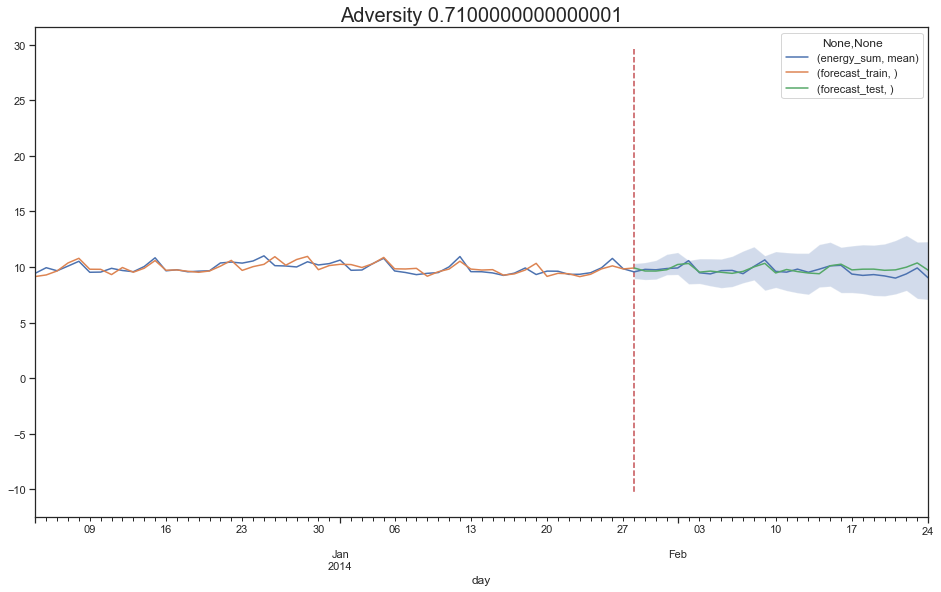

Mean Absolute Percentage Error:  0.030647737185833475
                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                   86
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood                 152.414
Date:                           Tue, 10 Dec 2019   AIC                           -288.828
Time:                                   11:03:09   BIC                           -269.975
Sample:                               11-24-2013   HQIC                          -281.281
                                    - 02-17-2014                                         
Covariance Type:                             opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
drift               -8.187e-06   3.69e-05     -0.2

In [246]:
## Remodel, start from 2014-01 >> change to daily *

model_dict0 = defaultdict(tuple)
model_dict1 = defaultdict(tuple)
for acorn in Acorn_grouped_ls:
    print(acorn)
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].loc['2013-11-24':'2014-02-24',]
    exog_ls = ['TempDelta','humidity','temperatureMin','day_length']
    target = 'energy_sum'
 
#     model_D0, mape_D0 = train_predict_D_trend_m(df, exog_ls, target, seaD=0,trend='t', m =7)
#     model_dict0[acorn] = model_D0, mape_D0
#     print(model_D0.summary())
    
    model_D1, mape_D1, yhat_D1 = train_predict_D_trend_m(df, exog_ls, target, seaD=1,trend='t', m =7)
    model_dict1[acorn] = model_D1, mape_D1
    print(model_D1.summary())

Affluent
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=-193.559, BIC=-184.132, Fit time=0.063 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=-234.304, BIC=-220.164, Fit time=0.233 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=-235.092, BIC=-220.952, Fit time=0.109 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=-193.559, BIC=-184.132, Fit time=0.042 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=-210.455, BIC=-198.672, Fit time=0.169 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=-235.191, BIC=-218.694, Fit time=0.136 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=-233.102, BIC=-218.961, Fit time=0.217 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=-235.196, BIC=-221.056, Fit time=0.163 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=-239.293, BIC=-227.509, Fit time=0.393 seconds
Fit ARIMA: order=(0, 1, 0) s

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


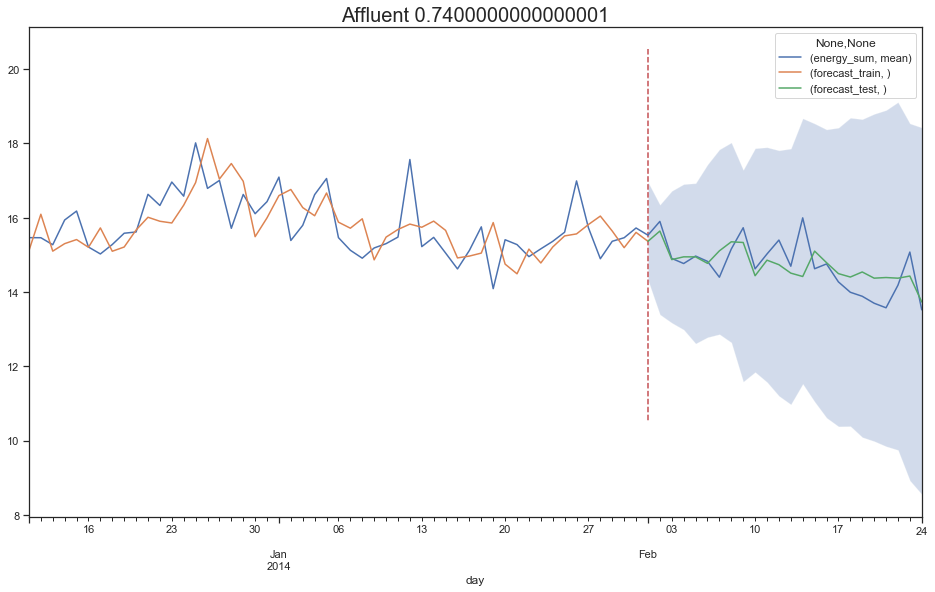

Mean Absolute Percentage Error:  0.02583249790989148
                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                   79
Model:             SARIMAX(1, 1, 0)x(0, 1, 1, 7)   Log Likelihood                 119.413
Date:                           Tue, 10 Dec 2019   AIC                           -226.826
Time:                                   11:06:38   BIC                           -213.250
Sample:                               12-01-2013   HQIC                          -221.427
                                    - 02-17-2014                                         
Covariance Type:                             opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
drift               -2.722e-05   3.94e-05     -0.69

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


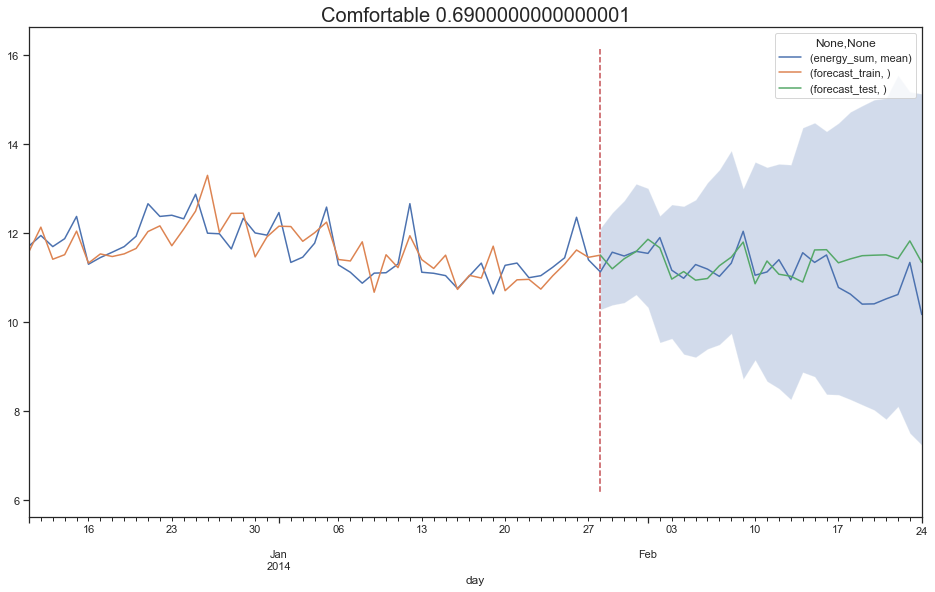

Mean Absolute Percentage Error:  0.038784051700196824
                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                   79
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 134.548
Date:                           Tue, 10 Dec 2019   AIC                           -255.095
Time:                                   11:06:53   BIC                           -239.256
Sample:                               12-01-2013   HQIC                          -248.797
                                    - 02-17-2014                                         
Covariance Type:                             opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
drift               -8.923e-06   3.35e-05     -0.2

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


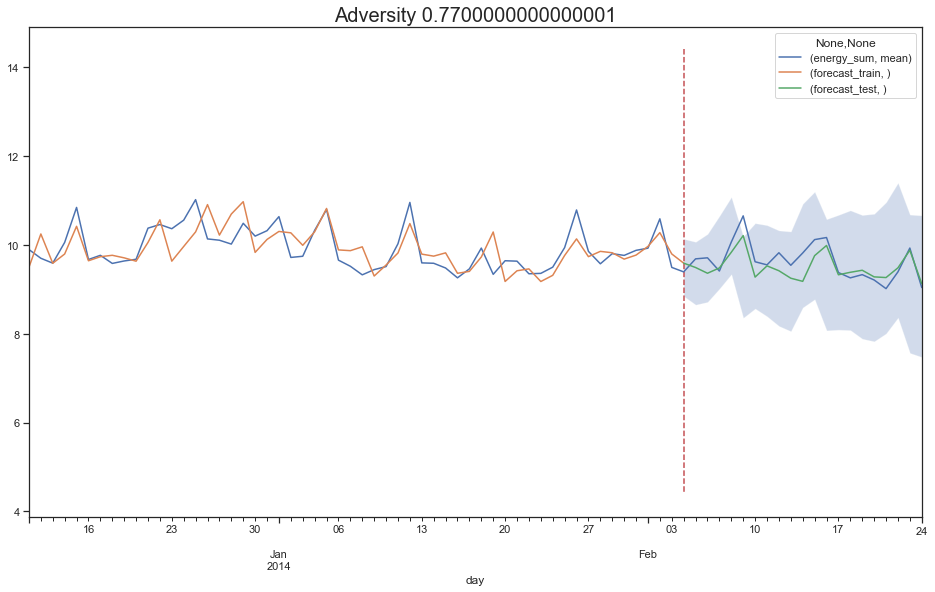

Mean Absolute Percentage Error:  0.022174586758785916
                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                   79
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood                 135.558
Date:                           Tue, 10 Dec 2019   AIC                           -259.116
Time:                                   11:07:04   BIC                           -245.540
Sample:                               12-01-2013   HQIC                          -253.717
                                    - 02-17-2014                                         
Covariance Type:                             opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
drift               -1.083e-05    2.7e-05     -0.4

In [248]:
# update exog
model_dict0 = defaultdict(tuple)
model_dict1 = defaultdict(tuple)
data_dict1 = defaultdict(list)
for acorn in Acorn_grouped_ls:
    print(acorn)
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].loc['2013-12':'2014-02-24',]
    exog_ls = ['humidity','temperatureMin']
    target = 'energy_sum'
 
#     model_D0, mape_D0 = train_predict_D_trend_m(df, exog_ls, target, seaD=0,trend='t', m =7)
#     model_dict0[acorn] = model_D0, mape_D0
#     print(model_D0.summary())
    
    model_D1, mape_D1, yhat_D1= train_predict_D_trend_m(df, exog_ls, target, seaD=1,trend='t', m =7)
    model_dict1[acorn] = model_D1, mape_D1
    data_dict1[acorn]=yhat_D1
    print(model_D1.summary())

In [249]:
Acorn_grouped_ls 

['Affluent', 'Comfortable', 'Adversity']

## FINAL DAILY
__Conclusion:__
>__AFFLUENT:__ Daily forecast wouldn't change with weather, pretty constant, so can related back to couple weeks prior

>__Comfortable:__ Daily forecast wouldnt change with weather, pretty constant but can only related to 1 week prior

>__Adversity:__ Daily forecast change with weather(rain/humidity), can only related to 1 week prior

### Adversity

Adversity
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=-251.570, BIC=-244.500, Fit time=0.053 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=-274.629, BIC=-262.846, Fit time=0.188 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=-297.602, BIC=-285.818, Fit time=0.304 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=-251.570, BIC=-244.500, Fit time=0.049 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=-266.777, BIC=-257.350, Fit time=0.104 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=-296.342, BIC=-282.202, Fit time=0.364 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=-278.616, BIC=-266.832, Fit time=0.152 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=-275.071, BIC=-265.644, Fit time=0.048 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=-294.172, BIC=-280.031, Fit time=0.190 seconds
Fit ARIMA: order=(0, 1, 2) 

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


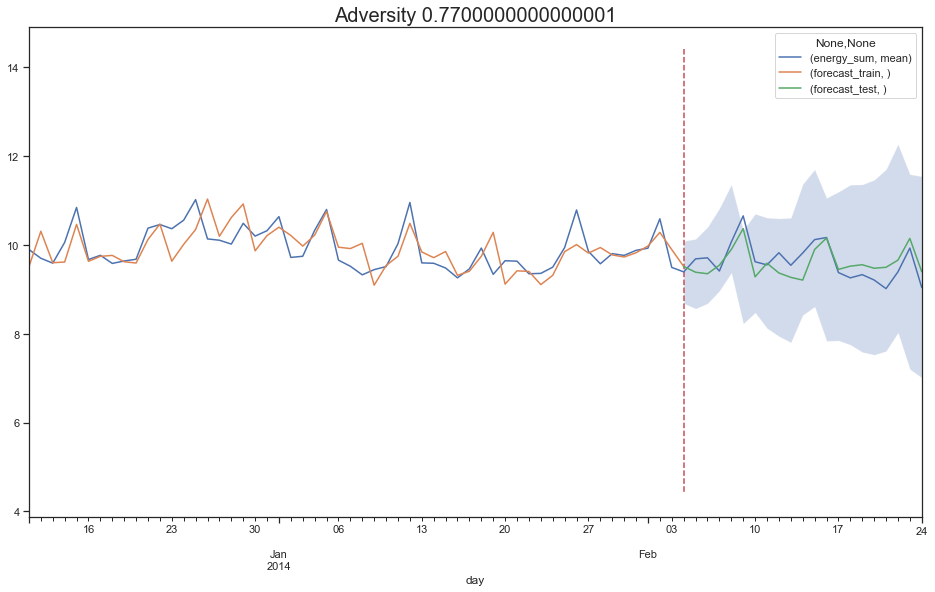

Mean Absolute Percentage Error:  0.027080843446951507
                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                   79
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood                 136.704
Date:                           Tue, 10 Dec 2019   AIC                           -263.407
Time:                                   11:54:28   BIC                           -252.094
Sample:                               12-01-2013   HQIC                          -258.908
                                    - 02-17-2014                                         
Covariance Type:                             opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
drift         -8.481e-06   2.23e-05     -0.381      0.703   -5

In [272]:
# update exog 
Acorn_grouped_ls = ['Adversity']
model_dict0 = defaultdict(tuple)
model_dict1 = defaultdict(tuple)
data_dict1 = defaultdict(list)
for acorn in Acorn_grouped_ls:
    print(acorn)
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].loc['2013-12':'2014-02-24',]
    exog_ls = ['humidity']
    target = 'energy_sum'
 
#     model_D0, mape_D0 = train_predict_D_trend_m(df, exog_ls, target, seaD=0,trend='t', m =7)
#     model_dict0[acorn] = model_D0, mape_D0
#     print(model_D0.summary())
    
    model_D1, mape_D1, yhat_D1= train_predict_D_trend_m(df, target, seaD=1, trend='t', m=7, exog_ls = exog_ls)
    model_dict1[acorn] = model_D1, mape_D1
    data_dict1[acorn]=yhat_D1
    print(model_D1.summary())

In [273]:
pickleFile(data_dict1, './Pickle/Daily_adv_data.pickle')
pickleFile(model_dict1, './Pickle/Daily_adv_model.pickle')

File is picked at below path: 
 ./Pickle/Daily_adv_data.pickle
File is picked at below path: 
 ./Pickle/Daily_adv_model.pickle


### Comfortable

Comfortable
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=-232.814, BIC=-228.100, Fit time=0.043 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=-269.399, BIC=-259.972, Fit time=0.112 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=-297.496, BIC=-288.069, Fit time=0.116 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=-232.814, BIC=-228.100, Fit time=0.029 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=-254.446, BIC=-247.376, Fit time=0.079 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=-288.670, BIC=-276.886, Fit time=0.241 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=-274.899, BIC=-263.115, Fit time=0.174 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=-275.547, BIC=-266.120, Fit time=0.120 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=-295.700, BIC=-281.560, Fit time=0.184 seconds
Near non-invertible roots

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


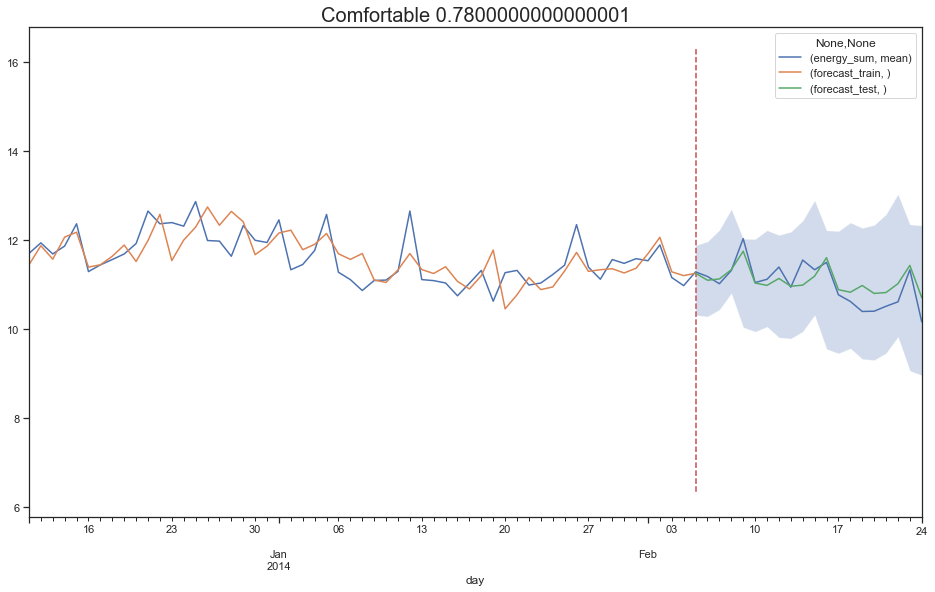

Mean Absolute Percentage Error:  0.020387768843103136
                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                   79
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood                 136.887
Date:                           Tue, 10 Dec 2019   AIC                           -265.774
Time:                                   12:00:34   BIC                           -256.724
Sample:                                        0   HQIC                          -262.175
                                            - 79                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift      -9.314e-06   1.77e-05     -0.526      0.599    -4.4e-05  

In [276]:
# comfortable
Acorn_grouped_ls = ['Comfortable']
model_dict0 = defaultdict(tuple)
model_dict1 = defaultdict(tuple)
data_dict1 = defaultdict(list)
for acorn in Acorn_grouped_ls:
    print(acorn)
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].loc['2013-12':'2014-02-24',]
#     exog_ls = ['humidity']
    target = 'energy_sum'
 
#     model_D0, mape_D0 = train_predict_D_trend_m(df, exog_ls, target, seaD=0,trend='t', m =7)
#     model_dict0[acorn] = model_D0, mape_D0
#     print(model_D0.summary())
    
    model_D1, mape_D1, yhat_D1= train_predict_D_trend_m(df, target, seaD=1, trend='t', m=7, exog_ls = False)
    model_dict1[acorn] = model_D1, mape_D1
    data_dict1[acorn]=yhat_D1
    print(model_D1.summary())

In [277]:
pickleFile(data_dict1, './Pickle/Daily_com_data.pickle')
pickleFile(model_dict1, './Pickle/Daily_com_model.pickle')

File is picked at below path: 
 ./Pickle/Daily_com_data.pickle
File is picked at below path: 
 ./Pickle/Daily_com_model.pickle


### Affluent

Affluent
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=-184.323, BIC=-179.610, Fit time=0.044 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=-233.156, BIC=-223.729, Fit time=0.172 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=-206.586, BIC=-197.159, Fit time=0.117 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=-184.323, BIC=-179.610, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=-200.379, BIC=-193.308, Fit time=0.029 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 7); AIC=-241.675, BIC=-229.892, Fit time=0.378 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(3, 1, 0, 7); AIC=-251.454, BIC=-237.314, Fit time=0.748 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(3, 1, 1, 7); AIC=-251.268, BIC=-234.771, Fit time=0.626 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 7); AIC=-249.482, BIC=-235.342, Fit time=0.209 seconds
Fit ARIMA: order=(0, 1, 0) s

/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/vsu/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


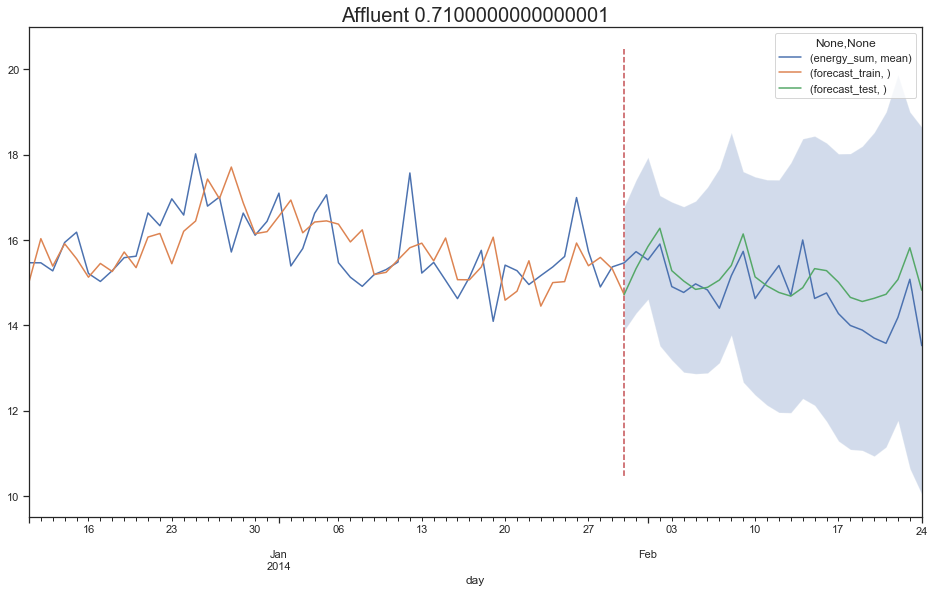

Mean Absolute Percentage Error:  0.0386311088849905
                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                   79
Model:             SARIMAX(0, 1, 1)x(3, 1, 0, 7)   Log Likelihood                 118.500
Date:                           Tue, 10 Dec 2019   AIC                           -225.000
Time:                                   11:41:18   BIC                           -211.424
Sample:                                        0   HQIC                          -219.601
                                            - 79                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift      -2.874e-05   4.75e-05     -0.605      0.545      -0.000    

In [266]:
#Affluent
Acorn_grouped_ls = ['Affluent']
model_dict0 = defaultdict(tuple)
model_dict1 = defaultdict(tuple)
data_dict1 = defaultdict(list)
for acorn in Acorn_grouped_ls:
    print(acorn)
    df = acorn_energy_day[acorn_energy_day.Acorn_grouped == acorn].loc['2013-12':'2014-02-24',]
#     exog_ls = ['humidity']
    target = 'energy_sum'


    model_D1, mape_D1, yhat_D1= train_predict_D_trend_m(df, target, seaD=1, trend='t', m=7, exog_ls = False)
    model_dict1[acorn] = model_D1, mape_D1
    data_dict1[acorn]=yhat_D1
    print(model_D1.summary())

In [267]:
pickleFile(data_dict1, './Pickle/Daily_affluent_data.pickle')
pickleFile(model_dict1, './Pickle/Daily_affluent_model.pickle')

File is picked at below path: 
 ./Pickle/Daily_affluent_data.pickle
File is picked at below path: 
 ./Pickle/Daily_affluent_model.pickle


## Adding up

In [335]:
#load pickle
aff_w = loadpickle('./Pickle/Weekly_aff_data.pickle')
comf_w = loadpickle('./Pickle/Weekly_comf_data.pickle')
adv_w = loadpickle('./Pickle/Weekly_adv_data.pickle')

aff_d = loadpickle('./Pickle/Daily_affluent_data.pickle')
comf_d = loadpickle('./Pickle/Daily_com_data.pickle')
adv_d = loadpickle('./Pickle/Daily_adv_data.pickle')

In [314]:
aff_w['Affluent']

day_length energy_median energy_mean energy_max energy_count  \
                  mean          mean        mean       mean         mean   
day                                                                        
2012-08-05  107.056389      1.260554    1.611844   5.884490   335.720811   
2012-08-12  104.330556      1.244723    1.586194   5.643824   335.688894   
2012-08-19  101.444444      1.210106    1.544894   5.409281   335.620649   
2012-08-26   98.443056      1.197293    1.539655   5.484334   335.680790   
2012-09-02   95.360833      1.243565    1.627407   5.966709   335.728226   
...                ...           ...         ...        ...          ...   
2014-02-02   63.394167      1.741530    2.267907   7.853411   335.353213   
2014-02-09   66.165278      1.666262    2.185825   7.673639   335.294500   
2014-02-16   69.115278      1.669246    2.192490   7.645081   335.527177   
2014-02-23   72.191667      1.539121    2.060848   7.393718   335.522997   
2014-03-02   53.495833      1.068190    1.377809   4.423851   192.867130   

           energy_std  energy_sum energy_min temperatureMax temperatureMin  \
                 mean        mean       mean           mean           mean   
day                                                                          
2012-08-05   1.162424   77.302315   0.560848         148.50          96.02   
2012-08-12   1.115553   76.015747   0.571469         163.75         100.85   
2012-08-19   1.057971   74.060986   0.584783         178.72         124.41   
2012-08-26   1.077706   73.837896   0.572892         148.81          98.38   
2012-09-02   1.198489   78.071391   0.559699         140.05          89.03   
...               ...         ...        ...            ...            ...   
2014-02-02   1.706456  108.610828   0.652697          56.32          26.90   
2014-02-09   1.654989  104.753565   0.637481          63.44          36.31   
2014-02-16   1.655462  105.122931   0.640497          64.39          25.16   
2014-02-23   1.577381   98.684405   0.619792          77.15          39.25   
2014-03-02   0.891117   54.596348   0.585017          54.61          26.31   

           dewPoint humidity uvIndex TempDelta forecast_test forecast_train  
               mean     mean    mean                                         
day                                                                          
2012-08-05    91.07     5.43    34.0     52.48           NaN   -1994.195805  
2012-08-12    94.43     5.10    33.0     62.90           NaN    1506.215976  
2012-08-19   107.28     4.92    31.0     54.31           NaN      74.211660  
2012-08-26    87.67     5.25    28.0     50.43           NaN      88.295038  
2012-09-02    80.81     5.31    23.0     51.02           NaN      69.822955  
...             ...      ...     ...       ...           ...            ...  
2014-02-02    20.90     5.82     7.0     29.42    167.763095            NaN  
2014-02-09    23.54     5.35     7.0     27.13    171.392741            NaN  
2014-02-16    14.96     5.29     8.0     39.23    171.092520            NaN  
2014-02-23    34.74     5.60     8.0     37.90    175.582756            NaN  
2014-03-02    20.02     3.85     7.0     28.30    174.976687            NaN  

[83 rows x 16 columns]

In [328]:
# counting household for different acorn_group
hhcount = dict()
hhcount['Affluent']= len(energy_weather[energy_weather.Acorn_grouped=='Affluent'].LCLid.unique())
hhcount['Comfortable']= len(energy_weather[energy_weather.Acorn_grouped=='Comfortable'].LCLid.unique())
hhcount['Adversity']= len(energy_weather[energy_weather.Acorn_grouped=='Adversity'].LCLid.unique())

In [331]:
hhcount['Affluent']

2192

In [346]:
#daily forecast after Feb

total_forecast_d = aff_d['Affluent'].forecast_test*hhcount['Affluent']+ \
    comf_d['Comfortable'].forecast_test*hhcount['Comfortable']+ \
    adv_d['Adversity'].forecast_test*hhcount['Adversity']

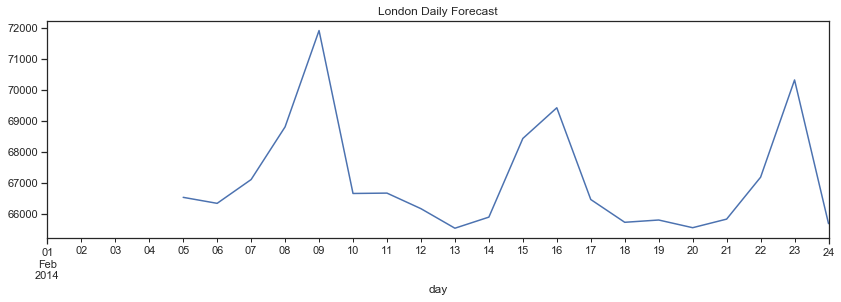

In [347]:

total_forecast_d.loc['2014-02':].plot(title = 'London Daily Forecast');

In [348]:
total_forecast_w = aff_w['Affluent'].forecast_test*hhcount['Affluent']+ \
    comf_w['Comfortable'].forecast_test*hhcount['Comfortable']+ \
    adv_w['Adversity'].forecast_test*hhcount['Adversity']

In [351]:
hhcount

{'Affluent': 2192, 'Comfortable': 1507, 'Adversity': 1816}